In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm
from wordcloud import WordCloud
import twint
import nest_asyncio

nest_asyncio.apply()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berns\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#gather tweets from the movie Inception
c = twint.Config()
c.Search = "Raizel"
c.Limit = 6000
c.Since = "2010-07-13" 
c.Until = "2011-07-13"
c.Pandas = True

# Uncommonet the following line to run
twint.run.Search(c)

90533577418223617 2011-07-11 17:31:01 -0400 <bella_raizel> I love you in a place where there's no space or time.
90503828847337472 2011-07-11 15:32:48 -0400 <hbalseiros> @anna_raizel kkkkkkkkkkkk né então kkkkkkkkkkk ..
90501239015620609 2011-07-11 15:22:31 -0400 <hbalseiros> @anna_raizel pod crer verdade isso aí...tem que saber gastar e saber ganhar rs o importante é ser feliz e já era! kk com ou sem mta grana
90500650579927040 2011-07-11 15:20:11 -0400 <hbalseiros> @anna_raizel Aí depois fala que ta passando necessidade etc. Saber gastar é mais importante... mas tem que fazer a grande virar.. kkk
90500486008020992 2011-07-11 15:19:31 -0400 <hbalseiros> @anna_raizel kkkkk é, aprendizado foi válido né!? kk pois é, tem gente que ganha uns 1000 reais por mês mas gasta mais do que ganha...
90499618357518337 2011-07-11 15:16:05 -0400 <hbalseiros> @anna_raizel Comprar um carro dahora depois de um tempo kkkkkk fala aí kkkkkkkkkkkkkkkk
90499480096481280 2011-07-11 15:15:32 -0400 <hbalseiros> 

87911252814344192 2011-07-04 11:50:50 -0400 <ShulLists> #PassaicJews  Re: Refuah Sheleima needed for Yecheil ben Mordechai (Raizel)  http://shullists.com/l.php?v=42876
87887729706283008 2011-07-04 10:17:22 -0400 <Cheilonfabiano> @anna_raizel hammm sei..q festa emm;;kkkk
87886354364628992 2011-07-04 10:11:54 -0400 <sweetyrhai> @rebalouise @marvinnoveda ano ka! Define pulubi?? --raizel mari alonzo topacio. :))
87587148336865280 2011-07-03 14:22:58 -0400 <cvassalo> @anna_raizel nda não, amor
87586309048242176 2011-07-03 14:19:38 -0400 <cvassalo> @anna_raizel .-.
87561442684960768 2011-07-03 12:40:49 -0400 <Rueles> @anna_raizel De nada ^^
87358188713803776 2011-07-02 23:13:09 -0400 <Rueles> @anna_raizel Boa noite guria, e a tua noite vai melhorar se vai fazer, sempre melhora...
87356390057836544 2011-07-02 23:06:01 -0400 <ZUMBIDANEVE> @anna_raizel @Nay_eM ekd meu email nay?
87352911826403328 2011-07-02 22:52:11 -0400 <ZUMBIDANEVE> @anna_raizel @Nay_eM vish D:
87352678216245249 2011-07-02 2

84335374477963264 2011-06-24 15:01:34 -0400 <chacongabriela7> que bello el dibujo de raizel
84274011240017920 2011-06-24 10:57:44 -0400 <bella_raizel> Look me in the eyes and the skeptic in me dies.
84242098609594368 2011-06-24 08:50:56 -0400 <maichardest> @leziar824 raizel. may pasok kayo bukas?
84145082290286592 2011-06-24 02:25:25 -0400 <magicliwanag> @ohhelloraizel thanks Raizel!! :) oh hello! Hehe
84125852505346049 2011-06-24 01:09:00 -0400 <TirensJan> Cadis Etrama De Raizel.
84119413233692672 2011-06-24 00:43:25 -0400 <wulanpratiwid> @luvlynaa @fryaan7 @mahanaishin  @melanielha @triewahyuni3 @rie_raizel  tapi pedes juga kok
84118477950029824 2011-06-24 00:39:42 -0400 <wulanpratiwid> @luvlynaa @fryaan7 @mahanaishin @melanielha @triewahyuni3 @rie_raizel  ana lidi-lidian yg di mas ikin
84115940597436418 2011-06-24 00:29:37 -0400 <wulanpratiwid> @fryaan7 @mahanaishin @luvlynaa @melanielha @triewahyuni3 @rie_raizel eh fryan mau jadi terasi haha
84115055259561984 2011-06-24 00:26:06 -0

80915589828313088 2011-06-15 04:32:34 -0400 <juliennefries_> Watching The Voice pilot episode for the Nth time!!! With @leiimendoza and raizel! Convincing them it's the best show noww!!
80868383616270336 2011-06-15 01:24:59 -0400 <KayBeCR> Noblesse just added chapter 189! Raizel, elegantly handsome and powerful! Pyong ~
80856760050651137 2011-06-15 00:38:48 -0400 <MontyMacalino> @ohhelloraizel Sorry Raizel di nako nakabalik ng Makati, nagedit kami ng bonggang bongga ni poch inabot ng 8am!!
80761159178924032 2011-06-14 18:18:55 -0400 <edinaff> @anna_raizel Altua: 1,56 , Peso: 51 kg
80758010317783041 2011-06-14 18:06:24 -0400 <edinaff> @cvassalo @anna_raizel Cesar eu falo assim mas, no fundo ela sabe q eu amo ela!
80757841006313473 2011-06-14 18:05:44 -0400 <cvassalo> @Edinaff @anna_raizel E amor de vcs duas hein! uhauhauh
80755778201460737 2011-06-14 17:57:32 -0400 <edinaff> A @anna_raizel ta aqui em casa! Eu nem gosto dela mas eu tenho q aturar! KOKOAS #mentira
80743681770012672 2011-0

76630155560353792 2011-06-03 08:43:47 -0400 <OhMyMirmo> CoronATion nyt na bukas ^^ GudLuck ' raizel '^^
76610889540829184 2011-06-03 07:27:14 -0400 <meilylubis> See! Dy makin mirip teteh! RT @AnggiSudirman: Baby Raizel mau sarapan dulu di The Nanny's Flavor Bliss Alam Sutera  http://yfrog.com/h8x8gptj
76600942606295040 2011-06-03 06:47:42 -0400 <meilylubis> Rayraaaaaayy!! RT @AnggiSudirman: Al Charrol sayang Baby Raizel :*  http://yfrog.com/ed1xijj
76593478850723840 2011-06-03 06:18:03 -0400 <antareslunata> Lucu bgt nggiiiiii...RT @AnggiSudirman: Al Charrol sayang Baby Raizel :*  http://yfrog.com/ed1xijj
76591431279579136 2011-06-03 06:09:54 -0400 <AnggiSudirman> Al Charrol sayang Baby Raizel :*  http://yfrog.com/ed1xijj
76539270365593600 2011-06-03 02:42:38 -0400 <nilesc> @lazyeye Libre sine from Raizel? Woohoo! :D Yup I'm back na. Might go back to HK for Paramore w Monty though. Tara!
76349797400981505 2011-06-02 14:09:44 -0400 <bella_raizel> Reading "The Virgin Suicides" while liste

72320158508662785 2011-05-22 11:17:24 -0400 <edinaff> Morreu !RT @anna_raizel: @Edinaff cade a @Nay_eM ?
72319110595358720 2011-05-22 11:13:14 -0400 <edinaff> @anna_raizel Siiim estou!
72311378626609152 2011-05-22 10:42:30 -0400 <bella_raizel> Electricity breakdown. No laptop, no telly and no phone once the battery dies. No telly = no game. Reading Kafka instead.
72190495077568512 2011-05-22 02:42:09 -0400 <bella_raizel> I wonder if it's just the weather or... I guess it's just the weather. Gloomy Sunday. :/
72116055899774976 2011-05-21 21:46:22 -0400 <cvassalo> @anna_raizel manda essas pessoas passarem na avenida enquanto o so lobo nao vem
72115632128278528 2011-05-21 21:44:41 -0400 <cvassalo> @anna_raizel Quem disse que eu to cobrando? uahuhauhauahuah
72114460227149825 2011-05-21 21:40:01 -0400 <cvassalo> @anna_raizel Não mesmo. Mas não se preocupe, ja to acostumado a ficar forever alone por la! uhauhauhauha
72114286968836096 2011-05-21 21:39:20 -0400 <edinaff> HAHAHAH isso ai garoto

69962698313568256 2011-05-15 23:09:41 -0400 <NewsNmore> Japan: In 2 hours the judge will announce the final verdict for Yakov Yosef Ben Raizel. Listen 2 a interview with Asken in Japan on Kol mvsr
69962245861425153 2011-05-15 23:07:53 -0400 <thekoppelfamily> In 2 hours will  judge in Japan announce  final 4 habucher Yakov Yosef Ben Raizel. please say   Tehilim  that its shuld go with hatzlocha
69962241449013248 2011-05-15 23:07:52 -0400 <Moshegobba> In 2 hours will D judge in Japan announce D final 4 habucher Yakov Yosef Ben Raizel. please say 5 kaptilech Tehilim he should have Hatzluche
69962155293818880 2011-05-15 23:07:32 -0400 <KolMavaser> Japan: In 2 hours the judge will announce the final verdict for Yakov Yosef Ben Raizel. Listen 2 a interview with Asken in Japan on 1-1-4
69960978862845953 2011-05-15 23:02:51 -0400 <TheNewsWatch> In 2 hours will D judge in Japan announce D final 4 habucher Yakov Yosef Ben Raizel. please say 5 kaptilech Tehilim he should have Hatzluche
6996012213

67984841374834688 2011-05-10 12:10:23 -0400 <cvassalo> @anna_raizel Mas eh uai! Minas e Rio estão colados um no outro! :P
67984385860833280 2011-05-10 12:08:35 -0400 <cvassalo> @anna_raizel Pois eh! Se eu não for ai, voce vem aqui uai!
67983945240817664 2011-05-10 12:06:50 -0400 <cvassalo> @anna_raizel Boa pergunta viu!? uhauhauhuahuh
67983066651570176 2011-05-10 12:03:20 -0400 <cvassalo> @anna_raizel Concordo, vc ainda nem me conhece
67982685452238849 2011-05-10 12:01:49 -0400 <cvassalo> @anna_raizel cuidado para não morrer hein! uhauhauhuahuah
67980104411779072 2011-05-10 11:51:34 -0400 <edinaff> @anna_raizel SOAKOADOADADK
67935612057030656 2011-05-10 08:54:46 -0400 <Litagrufi> RT: @raizeljrc (raizel cantillan) Daming gusto manood ng concert ni Justin Bieber.
67874971103404032 2011-05-10 04:53:48 -0400 <chinitakimz> @shamiel06 sige ate :) ni manang raizel nata?
67866366157393921 2011-05-10 04:19:37 -0400 <zxcvbnmcl> @thesockparody Hi Raizel!
67866366115459073 2011-05-10 04:19:37 -040

66876118703153152 2011-05-07 10:44:43 -0400 <ZUMBIDANEVE> @Nay_eM fala ae nay a @anna_raizel nao é linda e eu sou feieo?
66876107827318785 2011-05-07 10:44:41 -0400 <cvassalo> @anna_raizel tadinha da @Nay_eM
66875500672462848 2011-05-07 10:42:16 -0400 <cvassalo> @anna_raizel ajuda a @Nay_eM arrumar a gaveta
66875407743451139 2011-05-07 10:41:54 -0400 <ZUMBIDANEVE> @anna_raizel linda linda linda linda linda linda linda linda linda linda linda linda linda linda linda linda linda linda linda linda s2
66875334586400769 2011-05-07 10:41:36 -0400 <ZUMBIDANEVE> @anna_raizel qualquer um sabe que voç é linda sim e eu nao vou discutir nao kkkkkkkkkkk
66875058022395904 2011-05-07 10:40:30 -0400 <bella_raizel> MCFC vs. Everton today! Gonna watch it on TV in about an hour. Stocked! Go @MCFC!!!!!!!!!!!!!!!!
66874632967430144 2011-05-07 10:38:49 -0400 <ZUMBIDANEVE> @anna_raizel oxi é sim KKKKKK voç que é linda &lt;3 ou é cega ou é educada demais &gt;.&lt;
66874394525437953 2011-05-07 10:37:52 -0400 <

65537732348358656 2011-05-03 18:06:27 -0400 <edinaff> sadjasjdisad eu te tirando? Capaz!RT @anna_raizel: @Edinaff sério que ta me tirando mesmo? AUIUAHEIUAIUH eu to bem ruivinha, e voce? :p
65537242751447040 2011-05-03 18:04:30 -0400 <cvassalo> @anna_raizel Tenho uma prof assim, hoje nem vou na aula dela por causa disso também
65536870267887616 2011-05-03 18:03:02 -0400 <edinaff> @anna_raizel Oii loira avassaladora' Como esta? :)
65536561978159104 2011-05-03 18:01:48 -0400 <cvassalo> @anna_raizel @Nay_eM esse é o prob! Prof inteligente que não sabe passar a materia :p
65535950062764032 2011-05-03 17:59:22 -0400 <bella_raizel> Sleepyhead.
65535281264205824 2011-05-03 17:56:43 -0400 <cvassalo> @Nay_eM @anna_raizel eh complicado neh!?
65456095770066945 2011-05-03 12:42:04 -0400 <bella_raizel> Tomorrow? Tomorrow. Tomorrow!
65430791580155907 2011-05-03 11:01:31 -0400 <bella_raizel> I feel like I'm taking crazy pills. Srsly, u guys. :b
65429591233282048 2011-05-03 10:56:44 -0400 <bella_raize

62539642955767809 2011-04-25 11:33:07 -0400 <bella_raizel> Super stocked for tonight's game. Go, @MCFC!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
62539371911462912 2011-04-25 11:32:02 -0400 <bella_raizel> Another one of my twitter accounts. :)
62536515548479488 2011-04-25 11:20:41 -0400 <fausontengco> @ohhelloraizel awwww thanks raizel ♥ cge cge will text u ☺ kamusta nman si neil patrick harris s beastly? ☺
62473799412625408 2011-04-25 07:11:29 -0400 <milanyana> Dumaguete with Raizel tomorrow. :D
62303842280292352 2011-04-24 19:56:08 -0400 <sloth204> Walkin round again with @jecelynpaculan @larrisaseerapio kyanna and raizel♥☺
62302826411474945 2011-04-24 19:52:06 -0400 <jecelynpaculan> Walking with @jamiequirante @larrisaseerapio kyanna and my little sister Raizel Guinto
62287701285666817 2011-04-24 18:51:59 -0400 <sloth204> Walking around with @jecelynpaculan kyanna and raizel hahahaahahahhaa ditched @larrisaseerapio
62185408993304576 2011-04-24 12:05:31 -0400 <raizel_> ヤマザキ春のパン祭り再開 ｷﾀ━(ﾟ∀ﾟ)━!

57911968580907008 2011-04-12 17:04:23 -0400 <WATERMAYLON> @carangadango it'd be better if we just write it out. btw do u know if raizel's on? fb or something
57804761675730945 2011-04-12 09:58:23 -0400 <macncess> @FloresDiane Diba ung raizel . kapatid ba ni john un ? :)
57620639242133504 2011-04-11 21:46:45 -0400 <yuli_bi2r> Kak yiyi pulang ke jakarta dulu y raizel!! I'm gonna miss u my cousin :*  http://yfrog.com/hsizdoesj
57310558483005440 2011-04-11 01:14:36 -0400 <zxcvbnmcl> @thesockparody Raizel! Hi!! =))
57084238733910017 2011-04-10 10:15:17 -0400 <zxcvbnmcl> @thesockparody Hay nako Raizel! =))
56862894712827904 2011-04-09 19:35:45 -0400 <raizel_> スイースイープリキュア♪( ´ ▽ ` )ﾉ
56764619364122625 2011-04-09 13:05:14 -0400 <Tiiitsyl> Today I met 4 angels called Naomi, Richie, Raizel and Hide.. Like it.. :)
56693042303860738 2011-04-09 08:20:49 -0400 <fakhriihsan> auah, baca komik aja. Si Raizel dan kawan2 doang yang bisa ngehibur malem minggu
56570768787648512 2011-04-09 00:14:56 -0400 <Mo

48664011931254784 2011-03-18 04:36:19 -0400 <emmanism> @gizelleapril @raizel_ann Ako 5 dismissal ko!! magaayos na ako gamit now na!
48660224806096896 2011-03-18 04:21:16 -0400 <emmanism> @gizelleapril @raizel_ann  uwian na!!! :D stop working!
48634330888675328 2011-03-18 02:38:22 -0400 <emmanism> @marlonabadia @raizel_ann @gizelleapril buntis kayo??
48478516907487233 2011-03-17 16:19:13 -0400 <curt_blow1> RT @Aerie_jay #ificouldiwouldbringback my big cousin Raizel and my granddaDdy.
48440627234484224 2011-03-17 13:48:40 -0400 <Himawan_H> RT @GbrielGeorgiana: Goodnight my Raizel &lt;3
48391356934139904 2011-03-17 10:32:53 -0400 <YWN> TONIGHT – Lakewood Asifa For Bochrim In Japan: The trials of the boys jailed in Japan, Yaakov Yosef ben Raizel a...  http://bit.ly/eAux1q
48334194107092992 2011-03-17 06:45:44 -0400 <raizel_> “@y_nagasawa:  夜間の停電は本当に暇ですよ（笑）
48200905530675201 2011-03-16 21:56:06 -0400 <RogerAlfredoP> asi se llama la perra de raizel xdd RT@shaocontigo
48019693012926464 2011-0

41114547511103488 2011-02-25 07:37:26 -0400 <milanyana> @BEAtoot yesz bei. Wala d glng si raizel. Si jona wala ga reply!! :)))
41037854046027776 2011-02-25 02:32:41 -0400 <fausontengco> @ohhelloraizel raizel, san ko send yung pictures m nung shoot? ☺
40799888774144000 2011-02-24 10:47:06 -0400 <UncleJoeyy> @RaiGreco RAIZEL!!!!!!! WHATUP!!! #FollowTheFreko
40734809902809088 2011-02-24 06:28:30 -0400 <triewahyuni3> @mahanaishin @luvlynaa @rei_raizel @melanieLha RT @Tentangguee: Ingin berterima kasih ke siapa hari ini ? Sila… (cont)  http://deck.ly/~vIEpP
40699364703735809 2011-02-24 04:07:39 -0400 <fausontengco> @ohhelloraizel yup! nasa kin ☺ sige send ko syo hehe uy raizel flaressssss! haha
40664584540917760 2011-02-24 01:49:27 -0400 <triewahyuni3> bersihin gigi bareng @mahanaishin @luvlynaa n @rei_raizel (@ Pusat Kesehatan Masyarakat (PKM) UI)  http://4sq.com/eOv5CP
40608012489981952 2011-02-23 22:04:39 -0400 <wulanpratiwid> ga ada gw :( "@triewahyuni3: with geng ''SAMBEL'' @mahanaishi

27608741398446080 2011-01-19 01:10:11 -0400 <AnggiSudirman> @aiiuudee iyaaaa.. Ini eyang kung-nya Raizel aja mau pulang dari Bandung krn mau nengokin baby di RS.. Hehehe..
27602954156511232 2011-01-19 00:47:11 -0400 <AnggiSudirman> Raizel.. Sehari aja ya di RS.. Besok pulang ya.. Ami Loves U..  http://yfrog.com/h4zv2cjj
27547559132143616 2011-01-18 21:07:04 -0400 <olapoetiray82> @TESSAnggia baby Raizel boleh ga ya jadi menantu gue ntar? Wkwkwkwk #beautifulbabies
27403732400476160 2011-01-18 11:35:33 -0400 <STUNNINGEL> @sweetyrhai RAIZEL MARI TOPACIO a.k.a GF :) HAPPPPY BIRTHDAY! I love you! &gt;:D&lt; Hug! Enjoy your day! Take care okay? &lt;3 Muah!
27294775719759874 2011-01-18 04:22:36 -0400 <pietnya_ponco> Nengok si baby Raizel u/ yg ke 2xnya..  http://myloc.me/gH5nH
27252369691516928 2011-01-18 01:34:05 -0400 <olapoetiray82> Xixixi :pRT @TESSAnggia: Baby raizel minum susunya kalap sampe ngos2an, hihihhi, lucu bangeettt, trus abis napas, lanjuuutt :p olapoetiray82
27132621133717504 2

3387894391635968 2010-11-13 05:05:11 -0400 <NindyaMaretha> Yah kk aku blm tau ceritanya kan kaaaaaaaaa :(RT @dizkys: Raizel (?) Hahahahaha ... Iyaaa lupa raizel RT @nindew: Hah?apa itu apaan ka?
3387546260217856 2010-11-13 05:03:48 -0400 <dizkys> Raizel (?) Hahahahaha ... Iyaaa lupa raizel RT @nindew: Hah?apa itu apaan ka?-_-RT @dizkys: Apa itu (?) RT @nindew: ...  http://tmi.me/38VBe
3108276929560577 2010-11-12 10:34:05 -0400 <chocolatebraces> @miiic sbe ko na lumipat na si raizel eh.dti dentsu indio sya. shettttt bitter ako forever smga agencies na naga-out of the country!!! @@
3077145467293697 2010-11-12 08:30:23 -0400 <Puterikusuma> @nadsnadsky ih kaka aku bete bggggggggggggggggt sama bekas tim raizel mereka ga nyante bgt ngmngnya. !!!!!!!
3076509694697472 2010-11-12 08:27:51 -0400 <Puterikusuma> @dizkys nntn yuuuu ka? ahahaha ka udah jangan sebuuuuuut mereka raizel lagi!!!!!!!!!
3071828721401857 2010-11-12 08:09:15 -0400 <anastasiasaa> RT @GinaaAulia: Sabar kak☺☺ nanti cantiknya i

27735548770 2010-10-18 09:44:52 -0400 <dizkys> @puterikusuma. Besok raizel pulang sekolah di koni yaaa bareng legals junior :)   http://myloc.me/dcp8N
27735526024 2010-10-18 09:44:36 -0400 <Puterikusuma> ka besok emg di koni? Kata karen di sklh?RT @dizkys: Okay besok legals junior dan raizel at KONI !! After school ♡
27734365867 2010-10-18 09:30:59 -0400 <dizkys> Okay besok legals junior dan raizel at KONI !! After school ♡  http://myloc.me/dcmAX
27666163744 2010-10-17 15:43:44 -0400 <ycara94lkc4> Victoria_Lucis_Di_Raizel , в общем занимаешся тем, до чего руки раньше не доходили) фиолетовые фолосы еще кого-то так шокируют? не сла...
27607350500 2010-10-17 00:39:12 -0400 <whimsicality_> @thesockparody Hii Raizel :)
27601003001 2010-10-16 23:12:36 -0400 <zxcvbnmcl> @thesockparody Yo, raizel
27430062504 2010-10-15 07:00:27 -0400 <Puterikusuma> RETWEET @dizkys: #cheersong kesha tick tock RAIZEL   http://myloc.me/dagoR
27429441174 2010-10-15 06:49:32 -0400 <Puterikusuma> hari ini gue ga ket

23083869014 2010-09-05 15:46:09 -0400 <MontyMacalino> RT @ohhelloraizel: Solb na solb sa redwhores!  Salamat! Saya Ng shoot @MontyMacalino » salamat raizel! :) sobraaaaaaaaa
23067221864 2010-09-05 11:29:24 -0400 <Raizel_XIII> yaoi is my guilty pleasure without the guilty. lol.
22839238542 2010-09-02 19:28:03 -0400 <LuzNunez89> tenia como dos años sin cruzar el murito....ya me sentia como una prepa!!....jajaja..suerte k raizel no dejo k me atropellara ningun carro!
22779363952 2010-09-02 03:25:25 -0400 <Dionnypalma125> A DORMIR.... lindos 18 de mi prima Raizel, la quiero mucho!!!
22686203695 2010-09-01 02:54:32 -0400 <jcummi> Ga boleh kl yg itu :DRT @VirgoJazzy: Aku mau kutu raizel n kandiah :p RT @super_mago: Jiah.Kutunya @jcummi lari-larian!Berisik. *garuk*
22685629900 2010-09-01 02:42:04 -0400 <VirgoJazzy> Aku mau kutu raizel n kandiah :p RT @super_mago: Jiah.Kutunya @jcummi lari-larian!Berisik. *garuk*
22450778176 2010-08-29 12:35:40 -0400 <fausontengco> @ohhelloraizel thanks raizel

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [4]:
#convert data into a dataframe
df_1 = twint.storage.panda.Tweets_df
df_1.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,90533577418223617,90533577418223617,1.310420e+12,2011-07-11 17:31:01,-0400,,I love you in a place where there's no space o...,en,[],[],...,,,,,,[],,,,
1,90503828847337472,90501547124985856,1.310413e+12,2011-07-11 15:32:48,-0400,,@anna_raizel kkkkkkkkkkkk né então kkkkkkkkkkk ..,pt,[],[],...,,,,,,[],,,,
2,90501239015620609,90500859636621312,1.310412e+12,2011-07-11 15:22:31,-0400,,@anna_raizel pod crer verdade isso aí...tem qu...,pt,[],[],...,,,,,,[],,,,
3,90500650579927040,90500323558432769,1.310412e+12,2011-07-11 15:20:11,-0400,,@anna_raizel Aí depois fala que ta passando ne...,pt,[],[],...,,,,,,[],,,,
4,90500486008020992,90500323558432769,1.310412e+12,2011-07-11 15:19:31,-0400,,"@anna_raizel kkkkk é, aprendizado foi válido n...",pt,[],[],...,,,,,,[],,,,


In [2]:

c = twint.Config()

c.Username = "razzle_mydazzle"
# c.Custom["tweet"] = ["id"]
# c.Custom["user"] = ["bio"]
c.Limit = 10
c.Pandas = True
# c.Store_csv = True
# c.Output = "none"

twint.run.Search(c)

1386343761970663426 2021-04-25 11:38:04 -0400 <razzle_mydazzle> Normally SNL makes the jokes but I see twitter is making SNL the joke
1385957947742769155 2021-04-24 10:04:59 -0400 <razzle_mydazzle> aannndddd it is time to ✂️ fat
1385949726684635142 2021-04-24 09:32:19 -0400 <razzle_mydazzle> I dont want to get out of bed because it's in my morning routine to weigh myself and I don't want to do it
1381650319004819456 2021-04-12 12:48:00 -0400 <razzle_mydazzle> I'm the happiest. Stand up comedians are the happiest insecures! Thanks Adam Grant!  https://t.co/6D45VRIcVI
1378142600721543170 2021-04-02 20:29:35 -0400 <razzle_mydazzle> 🤣😂🤣
1376576561638477829 2021-03-29 12:46:42 -0400 <razzle_mydazzle> extra deodorant for virtual interviews ... dont want to smell bad
1375484884374978567 2021-03-26 12:28:46 -0400 <razzle_mydazzle> really enjoyed episode 1 of the demi levato series
1374786156538257413 2021-03-24 14:12:16 -0400 <razzle_mydazzle> windows open #petrichor
1373431593302392835 2021-0

In [5]:
#gather tweets from the movie Miss Congeniality
c = twint.Config()
c.Search = "Miss Congeniality"
c.Limit = 20000
c.Since = "2000-12-14" #released December 14, 2000
c.Until = "2021-04-26"
c.Pandas = True

# Uncommonet the following line to run
twint.run.Search(c)

1386105668042731524 2021-04-24 19:51:58 -0400 <CallmeHas> La verdadera Miss Congeniality
1386104223499231235 2021-04-24 19:46:14 -0400 <Bamiee_> Surfaces from where? Abi you should say you went to dig it out of your archives. Dpmo
1386103823672872963 2021-04-24 19:44:38 -0400 <macrohardhala> ano ba yan away away pa kayo sa results ng drag race eh kung ako na lang kaya yung naging miss congeniality 🤬🤬🤬🤬
1386103642621612038 2021-04-24 19:43:55 -0400 <cesnchf> a miss congeniality do bbb21
1386102327656992770 2021-04-24 19:38:42 -0400 <bovksmart> avaliando em ingles pois sou chique My ★★★★★ review of Miss Congeniality on Letterboxd  https://t.co/nhrFR0BU7o
1386101848004653059 2021-04-24 19:36:47 -0400 <CongenialityOf> @MayoOnPizza 🥺🥺🥺
1386101171853701126 2021-04-24 19:34:06 -0400 <Adaltonico> olivia merda fracassada máquina de xerox e sem miss congeniality
1386101135337934850 2021-04-24 19:33:57 -0400 <Unlucky_Guy29> @lamenosdraga es que por qué no entienden que MISS CONGENIALITY es difere

1386048499406495753 2021-04-24 16:04:48 -0400 <ReadYouForFree> @rpdrukfans @RuPaulsDragRace I know she didn't win the award on her season....but they should officially name Miss Congeniality the Chi Chi Devayne Congeniality Award.
1386048459623464963 2021-04-24 16:04:38 -0400 <mamadrag_mx> Welcome @MissLaLaRi to the MISS CONGENIALITY circle @RuPaulsDragRace #Misscongeniality #rupaulsdragracefinale #season13  https://t.co/pFu1e7zaJZ
1386048380648968194 2021-04-24 16:04:20 -0400 <HaidyHesham30> كمية spoilers !!!
1386047946274213888 2021-04-24 16:02:36 -0400 <OCathletics1819> Congratulations to 3 OC athletes on their new titles:  Isabella Ireland, Miss Helotes 2021 🌽 @OCTennisUKnow  Teaghan Speier, Princess 2021 🌽 @ocvgsoccer  Scarlet Graf, Miss Congeniality 2021 🌽 @ocpanthertrack  What an amazing experience! 💙💛🎾⚽️👟  https://t.co/ypyuwywqaM
1386046390497943567 2021-04-24 15:56:25 -0400 <mikthings> @MizCoulee pois é, mas o pior de tudo foi gente dizendo q a tamisha merecia miss congenialit

1385983420539473921 2021-04-24 11:46:12 -0400 <charlene_woolle> @MissLaLaRi Congratulations 🎉 on winning Miss Congeniality! You made us (Atlanta) proud! We ❤️ You! ❤️💋🎉🥰💕
1385983153475657728 2021-04-24 11:45:08 -0400 <fionaellis_> @keithsuhshe all great but should have been rosè/gottmik, and tamisha for miss congeniality 🤷🏼‍♀️
1385982940396544003 2021-04-24 11:44:17 -0400 <marcualwanders> Sabi siguro ni Olivia. Tangina kung alam ko lang na hindi ko magiging Miss Congeniality dapat nagmaldita na lng pala ako. 😂
1385982661282439171 2021-04-24 11:43:11 -0400 <kiwdiw> q mierda d miss congeniality es esta
1385982531158355969 2021-04-24 11:42:40 -0400 <PsycaneLovesYou> Symone - America's Next Drag Superstar  Kandy Muse - First Runner-Up  LaLa Ri - Miss Congeniality   It all just feels so completely correct
1385982510300008449 2021-04-24 11:42:35 -0400 <periferiachic> pelo amor de deus imagina o senso de carisma que uma pessoa deve ter pra querer q a olivia lux ganhasse miss congeniality no l

1385950883620458498 2021-04-24 09:36:55 -0400 <Edu_ESM> @dragliciouz A única coisa que gostei foi a LaLa Ri como Miss Congeniality e os looks das finalistas. Torcia por Symone e Rosé, mas os lipsyncs foram tão decepcionantes, que por um momento cheguei à achar que a Kandy foi melhor e merecia vencer.
1385950827857125378 2021-04-24 09:36:41 -0400 <badgalmartini> Also, so happy that Lala won Miss Congeniality and that it wasn’t Olivia lol #DragRace
1385950384850624519 2021-04-24 09:34:56 -0400 <undertalelou> muy buena la miss congeniality
1385950266734747651 2021-04-24 09:34:27 -0400 <AtinaDreams> Mistaken identity – framed Miss Congeniality 2018 UNAE Anita Sapkota . Freed and accepted .  https://t.co/S9yKPQbGdW
1385950012836696072 2021-04-24 09:33:27 -0400 <ianjereth> i still think that peppermint should’ve won miss congeniality for season 9
1385949216921505797 2021-04-24 09:30:17 -0400 <stateraa_> @shadoblivion Kandy was better than Rosé  je voulais Olivia ou Tamisha pour miss congenia

1385916492135477252 2021-04-24 07:20:15 -0400 <ThatDaveBednar> @BrittaniWarrick No Miss Congeniality prize for her that day! 😂
1385915997912133634 2021-04-24 07:18:17 -0400 <kilsupreme> Olivia Lux when her smile didn't win Miss Congeniality: #dragrace #rpdr  https://t.co/ErYxV37lrP
1385915837475966977 2021-04-24 07:17:39 -0400 <haikudetat> @the_symonee You deserved it just for the HAIR you served this season alone! You are magnetic on stage and your heart shines through! So happy for you and our Miss Congeniality! 🤗
1385915808270913540 2021-04-24 07:17:32 -0400 <JS_RamirezMD> @wise_jaylon @OMIEP0P @kilsupreme @MissLaLaRi @RuPaulsDragRace Olivia said all season that she was going to be Miss congeniality. But Lala being miss congeniality seems correct. Maybe Olivia next time won’t find the need to force a sweet personality and let her diva attitude run free unapologetically. She might win!
1385915735797649410 2021-04-24 07:17:15 -0400 <burnbliind> im sorry but denali or utica for miss co

1385887781289959424 2021-04-24 05:26:10 -0400 <luisquintela_> Y la broma de que Olviai Lux no ganase Miss Congeniality???? Me gusta mucho Lala Ri pero ese titulo llevaba el nombre de Olivia, es que lo encarna a la perfección wow #DragRaceFinale
1385887761467576323 2021-04-24 05:26:05 -0400 <FranPStark> Vaya robo!! La miss congeniality es @denalifox  !! #DragRace
1385887235606597633 2021-04-24 05:24:00 -0400 <mofolicite> Everyone at the vacation house is sleeping so the only logical next step is to eat this old corn while I watch miss congeniality 2 armed&amp;fabulous  https://t.co/g1yb7O6RHT
1385887094103416834 2021-04-24 05:23:26 -0400 <cesarnacion_> sa miss congeniality though????? LALA RI? she was 4th out, I thought olivia would won that.
1385886853384052736 2021-04-24 05:22:29 -0400 <artpopthenight> LaLaRi comme Miss Congeniality sits with me, ma puce a une énergie géniale!!!
1385886787558682625 2021-04-24 05:22:13 -0400 <MaferMafs> Miss congeniality no fue Denali... esta es la tem

1385858384885387264 2021-04-24 03:29:21 -0400 <GraceMcCallum1> lala winning miss congeniality 🥺🥰
1385855918592638977 2021-04-24 03:19:33 -0400 <xbarross> lala ri como miss congeniality = tudo p mim tava em choque da olivia lux ganhar slc
1385855841304186880 2021-04-24 03:19:15 -0400 <Thot_Pocket> It was at this moment that Lala Ri won Miss Congeniality ##RuPaulsDragRace #DragRaceFinale  https://t.co/wI4XYDZj7U
1385855584688279553 2021-04-24 03:18:13 -0400 <aidenr290> OMG I'M ABOUT TO CRY LALA IS MISS CONGENIALITY
1385854892368142337 2021-04-24 03:15:28 -0400 <coughsyurp> mi sono spoilerata lala ri miss congeniality??? anche meno
1385853662463995905 2021-04-24 03:10:35 -0400 <carsonkfan2> ALSO ME AND MY MOM CHEERED SO LOUDLY WE WOKE UP MY DAD WHEN LALA GOT MISS CONGENIALITY
1385853465142902789 2021-04-24 03:09:48 -0400 <catfacemeowy> @YuhuaHamasaki @BootlegOpinions I know ur show is about opinions, but it is a FACT that you had the best looks of the night tonight! I can’t believe you al

1385822224033198086 2021-04-24 01:05:40 -0400 <andre_vesper> O maior reveal dessa final foi a miss congeniality.
1385822136988839939 2021-04-24 01:05:19 -0400 <Gabozho> La miss congeniality ni le hablaba a su drag mother like.......... ok, work
1385821779474714624 2021-04-24 01:03:54 -0400 <thesingincub> Wow I'm so glad @MissLaLaRi is our MISS CONGENIALITY!!! She's deserves so damn much!
1385821400800239616 2021-04-24 01:02:23 -0400 <maekkkella> Id be bappy if either Denali or Olivia is the Miss Congeniality 😅 #RuPaulsDragRace #rupaulsdragracefinale
1385821359859699714 2021-04-24 01:02:14 -0400 <BogdanZlatibor> Pay attention, negative fans!  DragRace ❤️  MissCongeniality  https://t.co/cAgbkZy9An
1385821094167420930 2021-04-24 01:01:10 -0400 <JanFromJersey> @CurlyGirlEli Lala as Miss Congeniality was voted on by her season 14 sisters. They’re the best to judge that category.
1385820849383514112 2021-04-24 01:00:12 -0400 <anotherninez> กดไลค์หลังจบเกมใน wr มันควรมีบันทึกสถิติหรืออะไรไว้ป

1385803386533126144 2021-04-23 23:50:48 -0400 <hauterhode> God i cant stand people. u do realize miss congeniality is based on the other contestants votes? gtfo with this negativity
1385803294472237058 2021-04-23 23:50:27 -0400 <writervicyates> 3. Herstory was made tonight. 1st a Black Miss Congeniality Winner crowned a Black Miss Congeniality   #DragRaceFinale #DragRace13 #DragRace  https://t.co/yil9Or3qAP
1385803254164979714 2021-04-23 23:50:17 -0400 <SpudGhost> @RuPaulsDragRace @MissLaLaRi It was not a fan favorite, the queens voted for Miss Congeniality, they think Lala Ri is the most congenial and we should respect that decision  But honestly, she deserves it, I would've picked Lala too
1385802592379314179 2021-04-23 23:47:39 -0400 <Milkcheesecake> I’m so happy @MissLaLaRi is miss congeniality, she’s so amazing #DragRaceFinale #dragrace
1385802567339347971 2021-04-23 23:47:33 -0400 <fabuluch> victoire méritée  kahmora encore là plus belle  utica meilleur look encore Pq elle est pa

1385784348343869442 2021-04-23 22:35:09 -0400 <fraxtyun> im a denali stan but pls denali stans stop saying denali's robbed on the miss congeniality title.
1385784188830248960 2021-04-23 22:34:31 -0400 <NaufalAntezem> At least Season 7 crowned the correct winner and also the correct miss congeniality. Lol  Season 13 is a mess. A hot mess !  #rupaulsdragraceseason13
1385784168467083267 2021-04-23 22:34:27 -0400 <peterpao> Depois que tiraram o João, o meu pódio ficou com Gil, Camilla e Juliette (mas eu gosto o tempo todo só do Gil)  Fiuk é a miss congeniality (reclamando 24 horas por dia entre um maço de Marlboro e outro)
1385784102641717248 2021-04-23 22:34:11 -0400 <daavidramos25_> La ganadora de ‘Miss congeniality’? Menudo mess
1385783968260313089 2021-04-23 22:33:39 -0400 <bububuhler> They crowned the right miss congeniality ! #dragrace
1385783928556982272 2021-04-23 22:33:29 -0400 <ronniesmithjrrr> @Tender_oni Why didn’t she win Miss Congeniality 😫?
1385783926942208002 2021-04-23 22:

1385775250097557504 2021-04-23 21:59:00 -0400 <HaidyHesham30> مستفزين أوي !
1385775229973274631 2021-04-23 21:58:55 -0400 <javiera_paz_p> @RouJustin @aburtohdz @NotLaGrupa @MissLaLaRi Es que Denali tb tuvo dramas, Denali por lejos es fan favorite, es cosa de ver las visualizaciones de sus videos en youtube. Pero miss congeniality, creo que al final Lala Ri debe ser ls única que no tuvo dramas con otras queens😕
1385775134825451525 2021-04-23 21:58:33 -0400 <albaynue> Ô Rupaula ainda dá tempo de criar o prêmio fan favorite pros fãs de certas queens não ficarem choramingando que a fave não levou o miss congeniality 😂 #DragRace  https://t.co/GTZsduG9LA
1385775073899028481 2021-04-23 21:58:18 -0400 <JocelynMFlynn> @XOrlandoXXX @RuPaulsDragRace @MissLaLaRi I think most people are just more shocked than mad about it. No one thought lala was a nominee for miss congeniality, but she deserves it clearly, she won.
1385775056576516097 2021-04-23 21:58:14 -0400 <heyitsmealani> Condrags @MissLaLaRi 

1385769589355786243 2021-04-23 21:36:31 -0400 <ReinaHimekaChan> And I wanna see who voted who for Miss congeniality! #DragRace #DragRaceFinale
1385769532971749378 2021-04-23 21:36:17 -0400 <Neptune_Leo22> LA LA RI  MISS CONGENIALITY PURRRRR #DragRace  https://t.co/gcdBKhKRxI
1385769517478027264 2021-04-23 21:36:13 -0400 <bubblehealy> @moodxbby prawda, mogła dostać chociaż miss congeniality
1385769447122739200 2021-04-23 21:35:57 -0400 <PetyrCostello> Congrats to the newly crowned queen of s13 of @RuPaulsDragRace . And to the new reigning miss congeniality.
1385769434929840129 2021-04-23 21:35:54 -0400 <SGGuyzMikey> Love the winner. Love the top 4. Love miss congeniality. Now I can cancel sl*ngtv. 🤣
1385769428562948097 2021-04-23 21:35:52 -0400 <tysonx2c> Black Winner/Miss Congeniality whewwwww my people are just SUPERIOR #RPDR
1385769423462612998 2021-04-23 21:35:51 -0400 <Mercatona> @queperezaagain Doble shashay y coronan a Lala por miss congeniality
1385769402457526275 2021-04-23 21:

1385766864803049476 2021-04-23 21:25:41 -0400 <RayferTuBebe> Mami es que ni la Miss Congeniality que quería ganó, que cagada este #DragRaceFinale
1385766852924739586 2021-04-23 21:25:38 -0400 <es_ella_moon> La vdd q bueno q la que solo fue a intentar ganar miss Congeniality no lo ganó #DragRace #DragRaceFinale
1385766851075006469 2021-04-23 21:25:38 -0400 <theycallmeMr_G> Let me go look at Drag Race’s trending page. I know the racists are losing it right now. A black Miss Congeniality AND there’s going to be a winner of color? I know they losing it right now. #DragRace  https://t.co/E8ApTAyX4S
1385766844984868871 2021-04-23 21:25:36 -0400 <Mr_Papero> Por qué tan presionadas por Lala  Es Miss Congeniality, no Fan Favorite   #DragRace
1385766829310857216 2021-04-23 21:25:33 -0400 <dan_ceinthedark> deram o miss congeniality pra * pra gente lembrar dela?
1385766825431117833 2021-04-23 21:25:32 -0400 <youngscrappyhun> Lala Ri winning miss congeniality it’s the only thing that has made sense

1385766422760984578 2021-04-23 21:23:56 -0400 <arely_gzz> Netaaaa? Lala Ri es la miss congeniality de la temporadaaa?? Y la diosita Denali? Y mi icónica Utica? #DragRace  https://t.co/omaYTLdqdy
1385766420169076736 2021-04-23 21:23:55 -0400 <sinclairizm> La la Ri winning Miss Congeniality &gt;  everything is right with the world. #DragRace
1385766419950972932 2021-04-23 21:23:55 -0400 <BornThisDanilo> Gente, são as próprias queens que votam na miss congeniality. Não sei porque vocês ficam bravos kkkkk
1385766415706251266 2021-04-23 21:23:54 -0400 <theonlytuca> @marcelorodjr fora que no roast ela zoou as miss congeniality pq ela não tava ali pra ganhar esse título e sim o principal.  no final, não foi pro top 4 e não ganhou nem isso.
1385766413722439682 2021-04-23 21:23:53 -0400 <coochiewagon> lala ri miss congeniality and she didn’t have to force the whole season like some other contestants  https://t.co/PDIu10VNSG
1385766413638545414 2021-04-23 21:23:53 -0400 <wtfdiego> É isso galera 

1385766075258769410 2021-04-23 21:22:33 -0400 <shedeIrey> pra mim a miss congeniality deveria ser a rosé tbm pois ela realmente foi uma, mas já que quem não tá na final não concorre eu tava torcendo pra lala ri
1385766074197622786 2021-04-23 21:22:33 -0400 <bemy2seokkie> ver a Heidi me animo pero me desanimo que no fuera Denali miss congeniality
1385766071542718464 2021-04-23 21:22:32 -0400 <RaeEnvy> LaLa Ri winning Miss Congeniality #DragRace  https://t.co/k1ezaNpIBv
1385766069357457424 2021-04-23 21:22:31 -0400 <lehosken> a nova miss congeniality ❤️  https://t.co/AhRp2AcLDR
1385766057881874439 2021-04-23 21:22:29 -0400 <xsirgeeoh> @MissLaLaRi congrats Miss congeniality!!!! Yesssss for the Lala Ri experience 👑👏🏽
1385766055365185538 2021-04-23 21:22:28 -0400 <Iindaquaria> Lala miss congeniality I know that’s right ✨
1385766053150666759 2021-04-23 21:22:28 -0400 <Dani_mendoza05> @MissLaLaRi being Miss Congeniality makes sense with my fantasy 🙌🏼
1385766052043399173 2021-04-23 21:22:27 -0

1385765821742555140 2021-04-23 21:21:32 -0400 <iSoyJamon> ESA SEÑORA NO ES MI MISS CONGENIALITY
1385765820165509127 2021-04-23 21:21:32 -0400 <JujubaStar16> Lala Ri única Miss Congeniality possível #DragRace
1385765819863511040 2021-04-23 21:21:32 -0400 <WilSHuntington> Who had LaLa Ri? Who had LaLa Ri as Miss Congeniality?!?!
1385765818508656640 2021-04-23 21:21:32 -0400 <Jaqen0288> ¿WTF IS THIS? ¿LALA RI MISS CONGENIALITY? 💀
1385765807557251082 2021-04-23 21:21:29 -0400 <Ayyyye_J> Olivia Lux didn’t win Miss Congeniality because her niceness got annoying #DragRace
1385765803480526854 2021-04-23 21:21:28 -0400 <Momneedsalatte> I love La la ri and im glad and she won miss congeniality so don’t take my tweet about being surprised wrong
1385765797092593668 2021-04-23 21:21:26 -0400 <Alteenager_Sad> Aaaaahhh Lala Ri ganhou poha respeita a Miss Congeniality, mereceu muito na minha opinião, legal e pisadeira que muitas#DragRace  https://t.co/2DFLyB0UMy
1385765790687825922 2021-04-23 21:21:25

1385765577516404738 2021-04-23 21:20:34 -0400 <mauveeena> 2nd season IN A ROW with a black winner and black miss congeniality lets go
1385765577109786627 2021-04-23 21:20:34 -0400 <brunorcrdo> Denali roubada até do miss congeniality, que ódio desse programa velho #DragRace
1385765574538502149 2021-04-23 21:20:33 -0400 <joshkaczmarek> Okay, this whole season was not fair to Denali... not even Miss Congeniality???
1385765570084315139 2021-04-23 21:20:32 -0400 <BRUNOLAFEMME> lalari miss congeniality não me surpreenderia kandy muse ganhar
1385765570008715271 2021-04-23 21:20:32 -0400 <JonasBabycakes> Acho que nunca uma queen que saiu tão no começo ganhou o miss congeniality #DragRace
1385765569497124865 2021-04-23 21:20:32 -0400 <eljovendante> como gana Lala ri miss congeniality si estuvo 3 capitulos creo holaaaa @RuPaulsDragRace ?????
1385765568960032774 2021-04-23 21:20:32 -0400 <mexicanizadito> QUEDE CON LA MISS CONGENIALITY
1385765568515616772 2021-04-23 21:20:32 -0400 <OmahyraMurad> L

1385765450508902400 2021-04-23 21:20:04 -0400 <tpwkorg> How did Olivia Luxe or Utica not win Miss Congeniality Season 13. This whole finale is a mess. I’m sobbing rn.
1385765450022367233 2021-04-23 21:20:04 -0400 <vauseanatomy> PUTA QUE PARIU NEM PRA ACERTAR O MISS CONGENIALITY NAO AGUENTO MAIS
1385765449976139782 2021-04-23 21:20:04 -0400 <donkermxg> Literal Lala uso el peor traje de la historia y le dan el miss congeniality????? que chucha
1385765449946877954 2021-04-23 21:20:04 -0400 <pedrofrtas> A big ganhou o miss congeniality
1385765449334501380 2021-04-23 21:20:04 -0400 <junniorprofilo> Lala Ri miss congeniality. Sério? #DragRace  https://t.co/0CkLbPgBte
1385765449040744453 2021-04-23 21:20:03 -0400 <lopusjao> eu amo que o título de miss congeniality e quase um convite confirmado para o all stars
1385765447228960769 2021-04-23 21:20:03 -0400 <KayanaMaree> @MissLaLaRi definitely earned Miss Congeniality #DragRace
1385765446767497217 2021-04-23 21:20:03 -0400 <just_anselmo> @vespa

1385765366165561344 2021-04-23 21:19:44 -0400 <bulhoxs> Lala Ri miss congeniality  https://t.co/j89VjKO3gj
1385765364936577024 2021-04-23 21:19:43 -0400 <Mlockhart23> omg the miss congeniality made it a little better
1385765363900731397 2021-04-23 21:19:43 -0400 <andyfpaes> conseguiram errar até no miss congeniality, meu deus...
1385765360591425540 2021-04-23 21:19:42 -0400 <MartiGCummings> Miss Congeniality @MissLaLaRi congratulations Queen!
1385765359417020424 2021-04-23 21:19:42 -0400 <satinjoon> AHHH LALA RI MISS CONGENIALITY PERIOD
1385765359253340166 2021-04-23 21:19:42 -0400 <moodynali> LALA FUCKING RI MISS CONGENIALITY
1385765358506758155 2021-04-23 21:19:42 -0400 <mxnuz_> A FAVELA VENCEU LALARI MISS CONGENIALITY
1385765358435450880 2021-04-23 21:19:42 -0400 <dicloniusnyuu> Lala Ri Miss Congeniality daonde saiu isso? Hauahauha #DragRace wtff
1385765356048764933 2021-04-23 21:19:41 -0400 <alxn_gemidos> La verdad no me molesta que Lala Ri sea la Miss Congeniality
1385765355709243

1385765264223047688 2021-04-23 21:19:19 -0400 <_Peyton22> @MissLaLaRi is a perfect Miss Congeniality! #DragRace
1385765264218857472 2021-04-23 21:19:19 -0400 <kaerysyuki> EH ISSO AÍ LA LA RI MISS CONGENIALITY  QUEM NÃO GOSTOU, NÃO TO NEM AÍ  #DragRace
1385765263987994624 2021-04-23 21:19:19 -0400 <pizazzyninja> WOAH!!! LALARI WON MISS CONGENIALITY!!!!   I really thought it's Olivia??? #dragrace
1385765262012600323 2021-04-23 21:19:19 -0400 <eddgardx> Felicidades @maalwave por ganar miss congeniality
1385765259265380356 2021-04-23 21:19:18 -0400 <essenceofalaska> LALA RI MY MISS CONGENIALITY OH MY GOD YESSSS
1385765259248640001 2021-04-23 21:19:18 -0400 <lerdonardho> lalari ganhou o miss congeniality MERECIDO  https://t.co/Q30dEjOvou
1385765258560786433 2021-04-23 21:19:18 -0400 <ShaeDollFace> LALA RI 😍 this lewk! Go ‘head Miss Congeniality
1385765258216853515 2021-04-23 21:19:18 -0400 <lapawers> YAAAAAAS LALARI siendo miss congeniality makes totally sense
1385765257310875655 2021-04-23

1385765051248742401 2021-04-23 21:18:29 -0400 <goodeplace> LALA RI MISS CONGENIALITY SO TRUE #DragRace
1385765047142690817 2021-04-23 21:18:28 -0400 <Harley_3_0> Give @MissLaLaRi miss congeniality please #DragRace
1385765046307934212 2021-04-23 21:18:27 -0400 <gaylittlekibum> LA LA RI MISS CONGENIALITY EXACTLY
1385765043170684931 2021-04-23 21:18:27 -0400 <goddamnmanchilb> miss congeniality é da denali e sem mas!! #DragRace
1385765037344759813 2021-04-23 21:18:25 -0400 <AbigailSullens> As lala should win miss congeniality
1385765036870848514 2021-04-23 21:18:25 -0400 <isthereaureum> LALA MISS CONGENIALITY SO TRUE EXACTLY
1385765033590800388 2021-04-23 21:18:24 -0400 <lesbiancrystaI> LALA MISS CONGENIALITY THIS IS SO DESERVED
1385765033557245962 2021-04-23 21:18:24 -0400 <MikeyTBH> Omg Lala Ri as Miss Congeniality!? I’m here for it! #DragRace
1385765032546344966 2021-04-23 21:18:24 -0400 <RascheStorm> miss congeniality olivia lux  https://t.co/7kW6ks4oHh
1385765031787343879 2021-04-23 2

1385764448762204163 2021-04-23 21:16:05 -0400 <calebdion_> anyways LALA RI FOR MISS CONGENIALITY
1385764417267142656 2021-04-23 21:15:57 -0400 <TheatricallyGay> LaLa Ri miss congeniality Double crowning Not likely but let a bitch dream
1385764415086206977 2021-04-23 21:15:57 -0400 <kissywillow> I forgot about miss congeniality,,, pls not oliv*a
1385764396635500545 2021-04-23 21:15:53 -0400 <jeraticaa> hope my lala wins miss congeniality
1385764395444174851 2021-04-23 21:15:52 -0400 <tydimaano> who’s y’all’s miss congeniality tho
1385764386715885569 2021-04-23 21:15:50 -0400 <kunzanon> Miss Congeniality pra mim é Tamisha e se ganhar outra foi roubo q #DragRace
1385764382957883397 2021-04-23 21:15:49 -0400 <MonsterCrocs> rupaul eu te odeio, somente a Denali miss congeniality pode salvar essa final
1385764325621645312 2021-04-23 21:15:36 -0400 <_LexxGetDirty> Lala for miss congeniality 👏🏾👏🏾
1385764266641301507 2021-04-23 21:15:22 -0400 <adoreqry> WE'RE MOMENTS AWAY FROM HEIDI CROWNING LAL

1385749750285324292 2021-04-23 20:17:41 -0400 <clare_ester> Honestly the biggest mystery this season is who will be Miss Congeniality. I’ve seen a ton of names tossed around. #DragRace
1385749750083768322 2021-04-23 20:17:41 -0400 <dummy_moore> idc who wins the crown I just need Lala Ri as Miss Congeniality!!
1385749745361166343 2021-04-23 20:17:39 -0400 <belovampslut> se a bafuda da olivia ganhar miss congeniality eu vou ficar mtt puta  https://t.co/NW3izoSXPm
1385749741934366720 2021-04-23 20:17:39 -0400 <NicolasFLC> Yo creo que ya es hora de que tengan un miss congeniality y aparte un fan favorite, siono?
1385749736574042119 2021-04-23 20:17:37 -0400 <unhappylatina> Na moral pior participante da história do Rupaul Olivia Lux se ela ganhar miss Congeniality eu vou odiar #rupaulsdragraceseason13
1385749715367743488 2021-04-23 20:17:32 -0400 <AndeSanches> Quem vocês acham que leva o Miss Congeniality?
1385749671595986947 2021-04-23 20:17:22 -0400 <thisisnotbrianm> Ok #Dragrace fans who

1385693283456888833 2021-04-23 16:33:18 -0400 <alivefordenali> manifesting @denalifox winning miss congeniality!!!!!!!!!!!🥺🥺🥺
1385691226662445061 2021-04-23 16:25:07 -0400 <rosequartz_xo> @denalifox I hope you know that I will cry if you get miss congeniality and I will cry if rosé wins, but if both of these things come true I WILL SOBBBBBB
1385690940329709570 2021-04-23 16:23:59 -0400 <zombientontos> miss congeniality might just be the greatest movie of this century
1385687535414915077 2021-04-23 16:10:27 -0400 <Jay_Jantasy> I’m here to take a moment and say whoever wins deserves the crown! The 4 worked their butts off for this and whoever wins let’s be happy and support them! Please do not send any hate to anyone tonight! That goes the same who ever wins miss congeniality! Happy finale day!♥️
1385686017961758722 2021-04-23 16:04:26 -0400 <Iindaquaria> in my perfect world the top 4 share the crown, Lala wins miss congeniality and Jaida replaces Rupaul
1385685308939902977 2021-04-23 16

1385569199003635712 2021-04-23 08:20:14 -0400 <DesignaWEN> This weather tho, stay safe @designawenfurnishedapartments 🏠 #blessedweekend 🙏💛 @ Kileleshwa, Nairobi Area, Kenya  https://t.co/E3EO2Bp73b
1385566305638502413 2021-04-23 08:08:44 -0400 <Montiliciouss> Peppermint should have been Season 9's Miss Congeniality.
1385565607828066308 2021-04-23 08:05:58 -0400 <__BryanNotBrian> @elmoswooorld @arieshunter12 Miss Congeniality si Aries. Tas babalik for All Stars hahajsjshs
1385564542101463043 2021-04-23 08:01:44 -0400 <lee_fontaine> Who should be the New Miss congeniality of @RuPaulsDragRace #SEASON13 ?
1385562695651495943 2021-04-23 07:54:23 -0400 <livlu_x> @TheOliviaLux = miss congeniality end of discussion
1385561264731181057 2021-04-23 07:48:42 -0400 <CJtheSmitty> Hi @NetflixUK @PrimeVideo can you add Miss Congeniality on for Sunday please? I shouldn’t have to explain why it’s important you do.
1385556147151724545 2021-04-23 07:28:22 -0400 <_AlexAmazing_> Soy la Miss Congeniality de 

1385404082131636228 2021-04-22 21:24:07 -0400 <_vernilly_> @MissLaLaRi You have miss congeniality in the bag 😉
1385388449033773058 2021-04-22 20:22:00 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1385384244873244673 2021-04-22 20:05:17 -0400 <HaidyHesham30> الله بجد 😂❤
1385383975640784901 2021-04-22 20:04:13 -0400 <DaBossL8di> I already don’t wanna go to wrk tomorrow
1385383731398168577 2021-04-22 20:03:15 -0400 <Bamiee_> @monabyvirtue Lmaooooooo. They marry people they’re not attracted to ohh
1385383136117215234 2021-04-22 20:00:53 -0400 <ioannismc> Mi Ranking de "Miss Congeniality" de temporadas de #DragRace 💖✨:  12. Valentina 11. Nina West 10. Ivy Winters 9. Latrice Royale 8. La Cucu 7. Nina Flowers 6. Monét x Change 5. Yara Sofia 4. Heidi N' Closet 3. Pandora Boxx 2. Bendela

1385045423056883712 2021-04-21 21:38:56 -0400 <imanixdavis> kandy muse for miss congeniality
1385041729099911168 2021-04-21 21:24:15 -0400 <gucchilife1> I use this face scrub for a few days and now my skin is baby smooth 💖🦲
1385039692450701313 2021-04-21 21:16:10 -0400 <CongenialityOf> @MayoOnPizza Ok m8 (there better?)
1385039400116047872 2021-04-21 21:15:00 -0400 <CongenialityOf> @MayoOnPizza That’s a yes, shoo shoo child
1385038740792434688 2021-04-21 21:12:23 -0400 <CongenialityOf> @MayoOnPizza 😂😂😂   it’s true though, don’t you have uni work to do?
1385038391398608896 2021-04-21 21:10:59 -0400 <cmdrsue> @Clay_57 It's sort of like "Miss Congeniality, but make it superheroes."
1385037846877147136 2021-04-21 21:08:50 -0400 <OtterlySays> @HungryScribbler While You Were Sleeping The Net Miss Congeniality
1385036111509168131 2021-04-21 21:01:56 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; 

1384830797870424066 2021-04-21 07:26:05 -0400 <readyaiders> Swabrah Baris - Miss Autism Congeniality Kenya 2021  https://t.co/4FShaxP4Yz
1384828522196242434 2021-04-21 07:17:03 -0400 <DaBossL8di> @KaiserYeaDatsMe Ha
1384825877695971328 2021-04-21 07:06:32 -0400 <DaBossL8di> @KaiserYeaDatsMe Go where earlier ?
1384820092454653955 2021-04-21 06:43:33 -0400 <taIkingtummy> @zajerel TAMA :( miss congeniality era died so fast bdbddnd
1384819055262146560 2021-04-21 06:39:26 -0400 <DaBossL8di> Something about wrkn today isn’t sitting well with me 😖
1384816787062206466 2021-04-21 06:30:25 -0400 <DaBossL8di> If something is meant to be, it will
1384816322782109698 2021-04-21 06:28:34 -0400 <DaBossL8di> I want sum old bay wings
1384813971459432448 2021-04-21 06:19:14 -0400 <DaBossL8di> “ U don’t know what love is if you’re too good to call a million times “
1384813787056943104 2021-04-21 06:18:30 -0400 <DaBossL8di> My girl said, “I finally got u out my bed but can’t get u out my head”
13848130798

1384392543161380868 2021-04-20 02:24:37 -0400 <_MyNameIsNash_>  https://t.co/dqvLbNqg6A  Go vote for miss congeniality. And remember don't vote for fan favorite.
1384392130894909440 2021-04-20 02:22:59 -0400 <malaurlick> @parisandior 10 things I hate about you, clueless, legally blonde, miss congeniality
1384385678650183683 2021-04-20 01:57:21 -0400 <Kook2020Ji> Miss Congeniality   ARMY VOTE ON iHEART    #BTSARMY #BestFanArmy #iHeartAwards
1384380846900142080 2021-04-20 01:38:09 -0400 <TuckerHauff> @MissLaLaRi who do u think will win miss congeniality ?
1384377687569883136 2021-04-20 01:25:35 -0400 <DomVHarris> “It’s a knowledgeable interview!.!” . Not miss No congeniality trying to defend them being unprepared!
1384375987824218113 2021-04-20 01:18:50 -0400 <OhUwantMoe> @dollarbinbran It’s the perfect date. Not too warm, not too cold! Watch The movie Miss Congeniality with Sandra Bullock
1384362922059595778 2021-04-20 00:26:55 -0400 <josiahvantonio> Rosé for Miss Congeniality. Charot.


1384116299027030021 2021-04-19 08:06:55 -0400 <DaBossL8di> I love cartoons
1384114900478218241 2021-04-19 08:01:22 -0400 <DaBossL8di> @Dame_No_Dash Well ok then
1384114077597716491 2021-04-19 07:58:06 -0400 <dyrahaiyi> Miss congeniality 😍😍😍😍😍😍😍
1384113588399316992 2021-04-19 07:56:09 -0400 <DaBossL8di> I really cnt wait to get off
1384113499974955013 2021-04-19 07:55:48 -0400 <DaBossL8di> @Dame_No_Dash If she don’t think it then no1 else will. Let her b great
1384112332050108429 2021-04-19 07:51:10 -0400 <DaBossL8di> Y’all really selling anything now I see
1384112225934217228 2021-04-19 07:50:44 -0400 <DaBossL8di> @iamtoxicfresh 🤣🤣
1384111428894793731 2021-04-19 07:47:34 -0400 <DaBossL8di> still can’t believe we ddnt get those 1s
1384111217086586883 2021-04-19 07:46:44 -0400 <DaBossL8di> @Its_Jess_Hair @iamtoxicfresh 😴😴😴😴
1384110251234914308 2021-04-19 07:42:54 -0400 <hoedevie> @princepeasIey she really was running for the miss congeniality title not for the crown💀
1384109411606482951 

1383891408969363456 2021-04-18 17:13:18 -0400 <lovuhobi> y heidi miss congeniality DESERVED la mejor de la temporada le amo
1383886889510260740 2021-04-18 16:55:20 -0400 <TheatricallyGay> Jaidynn Diore Fierce, and Chi Chi Devayne should have been Miss congeniality in their seasons idgaf
1383885927534055425 2021-04-18 16:51:31 -0400 <mrwhyke> If you’ve ever seen Miss. Congeniality, starring my queen Sandra Bullock, you’ll understand this skincare routine.   If not, then go watch/rewatch Miss. Congeniality.  https://t.co/wHQZ2hvu9g
1383883285260955650 2021-04-18 16:41:01 -0400 <glhrmev> Odiei os spoilers puta que pariu. Mas pelo menos a ****** será a miss congeniality da season #Dragrace  https://t.co/QCIjb58U1w
1383880799007633414 2021-04-18 16:31:08 -0400 <Moondancer1626> Josie &amp; The Pussycats, Legally Blonde, Miss Congeniality triple feature!
1383880249503469576 2021-04-18 16:28:57 -0400 <folklrsfilm> miss congeniality (2000)  dir. donald petrie  https://t.co/F7hwE9bWDm
1383876077

1383562364671332355 2021-04-17 19:25:47 -0400 <renandezvous> is it fan favorite or is it miss congeniality? if it’s fan favorite then i guess she deserves it well congratulations everyone let’s make a round of applause for the fan favorite WORK FAN FAVORITE
1383559734557495296 2021-04-17 19:15:20 -0400 <cartoonsevodka> @DragDollCo @kittygurlgetur @aquariaofficial i dont think she deserved miss congeniality but she didn't deserved to be attacked there like this, she already went through that lipsync i mean she deserved something
1383558653362335748 2021-04-17 19:11:02 -0400 <1PRSCO> genie by girls generation reminds me of miss congeniality for some reason /pos
1383554434450411522 2021-04-17 18:54:17 -0400 <Diechiii1> @TakashiEventide @FrenchFrijoles @MarvoloRiddle29 @stvpidluv The vixen winning miss congeniality 🤣🤣🤣🤣🤣🤣🤣🤣 that made me chuckle
1383553904596582406 2021-04-17 18:52:10 -0400 <Lisa_Fav> @manoagapion Yes. Also, I JUST found out about “miss congeniality 2” last month. And OYE. 

1383437161731543042 2021-04-17 11:08:17 -0400 <KeyAnneAh> also lala ri for #misscongeniality  💋
1383435968250740747 2021-04-17 11:03:32 -0400 <kpfallon> I really leaned in to the Miss Congeniality tweets last night.
1383435735810732037 2021-04-17 11:02:37 -0400 <syndinx> amei a Lala ontem  acho q ela tem mais cara de miss congeniality doq a Denali..........
1383432233466302468 2021-04-17 10:48:42 -0400 <sleepinonametro> @karlliljeblad1 @areescue3 @lmjevex @JoePassmore @stvpidluv yes but one of the factors of miss congeniality is the drag queen who was kind to everyone; and they were pointing out that valentina wasn’t it but just a fan fav. and they were right.
1383424318340694019 2021-04-17 10:17:14 -0400 <JANESMlTHS> watching miss congeniality with my favorite girls
1383420367406911488 2021-04-17 10:01:32 -0400 <kmberIy> wait they didnt even crown miss congeniality what d ass is this boy
1383419944973438982 2021-04-17 09:59:52 -0400 <Ardywyn> @TheOliviaLux Are you being crowned Miss C

1383280891124862989 2021-04-17 00:47:19 -0400 <saturnvelour> @addystrology Nothing happened. There’s no miss congeniality. They didn’t actually really talk at all
1383280441684234244 2021-04-17 00:45:32 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1383279812274319361 2021-04-17 00:43:01 -0400 <TajPHL> Chances of                    Song from the getting a blood        Miss Congeniality  clot from J&amp;J                      soundtrack                             🤝                  One in a million
1383279672109109249 2021-04-17 00:42:28 -0400 <Jasu0928> Love this scene. Valentina really did not deserve the title, tho. She's a shady ass queen! If peppermint wasn't in the top 4, she would've been miss congeniality imo! 😂😂
1383279051029114884 2021-04-17 00:40:00 -0400 <TakashiEvent

1383240918438871047 2021-04-16 22:08:28 -0400 <richard__ravest> cómo así que Miss Congeniality de @VH1 que lo ponen justo después de la reunión de #RuPaulsDragRace no tiene nada de relación con el show de la Rumomia? 😟 quedé pelón
1383240891192659969 2021-04-16 22:08:22 -0400 <StephanPaul92> I don’t remember miss congeniality starting off this intense...
1383240667225235469 2021-04-16 22:07:29 -0400 <EricaT513> 2 hours and they didn’t crown a Miss Congeniality, and then they have the audacity to play ‘Miss Congeniality’ afterwards? Y’all really testing me with this ish drag race.
1383240639698006023 2021-04-16 22:07:22 -0400 <sean_soleyn> So no miss congeniality??? #RuPaulsDragRace
1383240390497562624 2021-04-16 22:06:23 -0400 <jsalignarly> No wait please don’t tell me Miss Congeniality (2000) counts as cop propaganda :/
1383240349800226820 2021-04-16 22:06:13 -0400 <giannaabaaby> it said miss congeniality was next and my DUMBASS thought it was like an extra clip of them crowing congen

1383220171624513543 2021-04-16 20:46:02 -0400 <kassieopeiadrag> @moonlexci She is the only Miss Congeniality Of season 13 I recognize
1383220042754527238 2021-04-16 20:45:31 -0400 <jontaoht> I can see LaLa winning Miss Congeniality.  https://t.co/7xgXEgdEQP
1383220012089954308 2021-04-16 20:45:24 -0400 <Lil_mere01> I love Lala😩 Miss Congeniality  #DragRace
1383220008386318338 2021-04-16 20:45:23 -0400 <TheatricallyGay> THERES MY MISS CONGENIALITY YALL #DragRace
1383219938496712706 2021-04-16 20:45:06 -0400 <justanotherkar> Lala Ri for MISS CONGENIALITY 🤰#dragrace  https://t.co/2y6feBFF9l
1383219828748554240 2021-04-16 20:44:40 -0400 <amediumplace> Lala Ri for Miss Congeniality makes completely sense with my Jantasy  #DragRace
1383219654877847566 2021-04-16 20:43:59 -0400 <crybabywalker9> @MissLaLaRi for Miss Congeniality!! She's the best.  #TeamKandy #TeamSymone #TeamBaldHeadedBrigade
1383219630710292481 2021-04-16 20:43:53 -0400 <TaciWashington> @RuPaulsDragRace LaLa RI for miss conge

1383103496388501510 2021-04-16 13:02:25 -0400 <Y59y08M28J> @BRAINYLADYYYYY 😂 😂 😂  Miss Congeniality
1383091730287763456 2021-04-16 12:15:39 -0400 <PodcastBromance> "Smilers wear a crown, losers wear a frown." Miss Congeniality, this Monday!  SPOTIFY:  https://t.co/freFzyhbzG APPLE:  https://t.co/r8XDvvgOT6  https://t.co/0LXAWi0oKz
1383089492987301890 2021-04-16 12:06:46 -0400 <GumbeauxStJames> Y’all remember season 9 when Valentina won Miss Congeniality and Aja called bullshit!!!   That yoonyun was WILDDDDD!!! Legendaric tbh.
1383088239574138880 2021-04-16 12:01:47 -0400 <whoreforcatie> @GreysABC greys abc becoming miss congeniality to make  the world better and peaceful 👌 gracie hart must be so proud😭😭😭😭😭
1383088023210921987 2021-04-16 12:00:55 -0400 <GumbeauxStJames> Ok so who’s gonna be Miss Congeniality?   Olivia Luxe? ... Denali? .. Tamisha Iman?
1383086932498989058 2021-04-16 11:56:35 -0400 <rewindcoulee> if olivia doesnt win miss congeniality istg
1383086727246573576 2021-04-16 

1382764786107121664 2021-04-15 14:36:30 -0400 <_lexxinthecity_> I had to call this sick line for work the lady say she seen me at this work event and she said “who is thattt pretty girl” and they said it was Alexia 🥰🥰🥰 she sad she didn’t get to meet me. Miss congeniality I’d say 💁🏾‍♀️
1382759630116433920 2021-04-15 14:16:00 -0400 <thomasw540> It's tough as congenital asshole and a Movement Conservative while running for Miss Congeniality as part of Jim Jordan's Chippendale Men of the House Freedom Caucus to disguise his essential assholism.
1382755015803097088 2021-04-15 13:57:40 -0400 <CixAndVicZander> Sapphic MISS CONGENIALITY
1382751206938976257 2021-04-15 13:42:32 -0400 <pandita_astral> @shokie__ Miss congeniality por su amistad con Tamisha, ejemplo de templanza y saber estar 🤣🤣🤣🤣🤣🤣🤣
1382749652211093505 2021-04-15 13:36:21 -0400 <carlisegal> Sapphic MISS CONGENIALITY  When a stubborn princess is attacked and needs a secret bodyguard, Tate—a 16yo rocker refusing to join the family s

1382302160226963457 2021-04-14 07:58:11 -0400 <insomniac_FF> @moviemenfes Miss Congeniality  https://t.co/4udIYG5vJg
1382300945544007684 2021-04-14 07:53:21 -0400 <DeborahThrogm11> @CMT Love Miss Congeniality movies.
1382295769630134278 2021-04-14 07:32:47 -0400 <marilag_ali> Miss Congeniality comin thru
1382291631089520643 2021-04-14 07:16:21 -0400 <coffeepenia> Every time they talk about the risk of CVT being “one in a million” I hear the pageant song from “Miss Congeniality.”  https://t.co/YgGhHgZBpU
1382277477184139266 2021-04-14 06:20:06 -0400 <reesems_> I'M SO STOKED TO START MAY W MISS CONGENIALITY 😭💗💗💗 AAAAAAAA  https://t.co/JZzDO75QCZ
1382266828685246465 2021-04-14 05:37:47 -0400 <EvaRovin> @screenjunkies Just watched a ton of movies— Birthday binge— and you don’t have trailers for ANY of them. 😢I’d consider it a personal birthday gift if you did ANY of these. #MissCongeniality #MrsDoubtfire #TheWeddingSinger #BringItOn  https://t.co/WH0kyZNg79
1382246978948583426 2021-04-14 0

1381718175507742721 2021-04-12 17:17:38 -0400 <pheobejonesdg> @discomentary Olivia lux is Miss congeniality bye
1381714727387156483 2021-04-12 17:03:56 -0400 <joshuarona> @lrl014 @EBU_HQ Yeah, i really don't get how the idea had not been floated around the Powers That Be in the last 5 years. It's like when Miss World announces the Miss Congeniality &amp; Miss Photogenic awards before getting to the runners up &amp; winner reveal
1381712568385949697 2021-04-12 16:55:21 -0400 <tymtymtymmy> Olivia Lux will win miss congeniality
1381711551346905092 2021-04-12 16:51:19 -0400 <holeystars> @hitRECordJoe 10 things I hate about you, Jaws, she’s the man, billy Madison, miss congeniality, now and then, the parent trap (LILO version) this list could go on forever. Lol.
1381710399565926417 2021-04-12 16:46:44 -0400 <unicornimri> @najwamoremio Nothing wrong with that lol. Hope floats and miss congeniality are my classic go to movies
1381705570365804544 2021-04-12 16:27:33 -0400 <lorenamor__> Manifes

1381321940720291847 2021-04-11 15:03:09 -0400 <rad3murray> @Justwilliam66 @jenben71 @florencerounda2 @mojorisin94 @Lowiseowl @AkamKevin @DrewLawDesign No ,I hope I didn't start the ball rolling by the falling off the bed and miss congeniality gif ,didn't intend to push it too far ,I'm more concerned about my behaviour ,what everyone else does is up to them , I started it so the buck stops why me ,just thinking of her feelings..
1381321684456644608 2021-04-11 15:02:07 -0400 <vibeebenneboo> Miss Congeniality is a top tier movie , that’s all for now
1381319940150591495 2021-04-11 14:55:12 -0400 <Kim34843419> @MillieCEdwards @drjyin @AmyAttaway3 @NicoleB_MD Miss Congeniality. 👍
1381313824838479875 2021-04-11 14:30:54 -0400 <UNHhhhTrixie> love blu but rewatching the s1 finale def made me feel like @ChipShopBird should have been miss congeniality. She was so stoked to be top 3 she didn’t even care whether or not she got the crown. Love you Baga 💜
1381298722403942402 2021-04-11 13:30:53 -0400

1380972438285082627 2021-04-10 15:54:21 -0400 <zai_zey> Lmao no shade but people only want denali to be miss congeniality because they feel like she was “ robbed “ . When i think of miss congeniality only two queens this season come to mind ... Lala Ri and Olivia Lux .
1380971109110190081 2021-04-10 15:49:04 -0400 <brownexceIlence> I feel like putting miss congeniality on and organising my closet
1380970851282063365 2021-04-10 15:48:02 -0400 <NJoyingFamily> Today, my daughter and I interviewed the showrunner of 'Country Comfort,' Caryn P. Lucas. She is also known for her work writing 'Miss Congeniality' and writing/producing 'The Nanny.'    https://t.co/8xpHl51vC7  #CountryComfort #CountryComfortNetflix
1380967870616764417 2021-04-10 15:36:12 -0400 <1Martial> ..exactly &amp; specifically "the top form" of the Nurse's Uniform, as high as it gets, Class lol, by finding "Miss Congeniality 2: Armed And Fabulous" and at mark 1:08:40, &amp; just the absolutely exemplary, dedicated, learn-ed,

1380695408092061697 2021-04-09 21:33:32 -0400 <tearyouapwrt> queria rosé winner e denali miss congeniality  https://t.co/cROG8IiY6f
1380691595499044864 2021-04-09 21:18:23 -0400 <PrinceN27> Orita pasa like Gigi y no la ponen miss congeniality
1380682666610147328 2021-04-09 20:42:54 -0400 <stephmaxw> Apparently Heather Burns because three VERY separate people have told me I remind them of Miss Rhode Island from the 2000 hit film Miss Congeniality  https://t.co/0IWGycEkox
1380677345837654023 2021-04-09 20:21:45 -0400 <reidoburrito95> Miss Congeniality and the Heartbreak Prince
1380677193899126784 2021-04-09 20:21:09 -0400 <seancchang> Gottmik for Miss Congeniality!!! #DragRace
1380677043189334018 2021-04-09 20:20:33 -0400 <NormanGoldenll> Miss Congeniality (2021)
1380675675724640257 2021-04-09 20:15:07 -0400 <afflautus> @SKYSlNGER kells you know miss rhode island from miss congeniality
1380675496829145096 2021-04-09 20:14:24 -0400 <AnahiAlava> @javiera_paz_p Omgggg Ivyyyy tenía unos runw

1380357684487196676 2021-04-08 23:11:32 -0400 <Cestory516> Another great scene!  Miss Congeniality (2000) Dance Rehearsal Scene "Abba - Dancing Queen"  https://t.co/nOU9CaMRjf via @YouTube
1380357521949528064 2021-04-08 23:10:53 -0400 <clarabcmacedo> miss congeniality pfvr
1380352481474064385 2021-04-08 22:50:51 -0400 <julianrossoni> @caiofall miss congeniality
1380350981599195139 2021-04-08 22:44:54 -0400 <themiya_atsumu> @4kaashiii__ Self-proclaimed Miss Congeniality 🤩🤚
1380349233597984772 2021-04-08 22:37:57 -0400 <blood0rphan> Whom is going to be miss congeniality...i feel like they all treat each other so kindly.
1380348862725038091 2021-04-08 22:36:29 -0400 <bethepiart> Did you hear the Miss Congeniality song too when you say this??   “You're one in a million You're once in a lifetime You made me discover one of the stars above us....” 😂😂😂  https://t.co/nRzP3z6BBr
1380345629151477762 2021-04-08 22:23:38 -0400 <mkkstt> provando com todas as palavras q é a miss congeniality
1380340

1379985232900788228 2021-04-07 22:31:33 -0400 <cenorbictorluna> @alanaldana @JCHMaza nadie dijo pero los de cochinita no serían ni top 5, miss congeniality? yes maybe pero ni de pedo llegaría más lejos k los de carnitas o mixiote
1379971457757937664 2021-04-07 21:36:48 -0400 <elperipatetico_> @phekaphika Regularmente si. No te quiero spoilear, pero aún no es la final. Antes de la final siempre hacen un episodio “Reunión” donde todas las eliminadas se juntan a rajar y eligen a la Miss Congeniality
1379971410282577921 2021-04-07 21:36:37 -0400 <DanisDragRace> @slythparadox, lembrada por ter caído no low 4 vezes na s1 mas sido salva do lipsync 3 vezes apenas para perder na primeira vez, é a única miss congeniality do programa, junto a @lovenlive812c - que, coincidentemente, também foi a queen a estar mais vezes no bottom em sua season!
1379969825787744256 2021-04-07 21:30:19 -0400 <talkslikejune1> @two2idols @juryymanagement i see “obsession” and i immediately think of miss congeniality i

1379586780161310725 2021-04-06 20:08:14 -0400 <youareinmyblood> Pandora es miss congeniality como debe de ser
1379586152974401538 2021-04-06 20:05:44 -0400 <putssgiu> se a ****** realmente levar o miss congeniality vai ter uma galera espumando tanto meu deus vai ser incrivel poder ver isso  https://t.co/YAU4tDvUns
1379585392878481409 2021-04-06 20:02:43 -0400 <tifffy18> MISS CONGENIALITY 2021✨✨ #misshouston  https://t.co/Ah3pfcK6h5
1379583705463857153 2021-04-06 19:56:01 -0400 <heygos> I need like a full montage makeover like in Princess Diaries or Miss Congeniality
1379583075198373888 2021-04-06 19:53:31 -0400 <DuWayneGreene> @hotelcontessa Miss Congeniality
1379582682976423939 2021-04-06 19:51:57 -0400 <dragshadx> é real a informação que eu li de miss congeniality?
1379577830166691842 2021-04-06 19:32:40 -0400 <sir___isaac> So we giving Utica Queen Miss Congeniality right?
1379576074468753412 2021-04-06 19:25:42 -0400 <urfavhoe_> 64. miss congeniality (2000)  https://t.co/8ztWEYjR50


1379322560861495303 2021-04-06 02:38:19 -0400 <Morrguee> @TheKandyMuse @denalifox Spoken like a true miss congeniality 🖤
1379322053027827715 2021-04-06 02:36:18 -0400 <swagfairyhoe> @sza she’s the man, legally blonde, wedding planner, how to lose a guy in 10 days, failure to launch, bride wars, miss congeniality, the proposal, two weeks notice, bedazzled, coyote ugly, she’s all that, somethings gotta give, just go with it, sex in the city 1&amp;2
1379320450166087681 2021-04-06 02:29:56 -0400 <cheshire_gem> @clcbrandrep Miss congeniality  SEUNGYEON DANCING QUEEN 장승연 씨엘씨  #장승연 #Chang_Seungyeon #CLC #씨엘씨 @CUBECLC
1379316025024385033 2021-04-06 02:12:21 -0400 <AmoreCelestiale> @sza Okay this is my time to shine lol Not another teen movie, miss congeniality, dude where’s my car, scary movie, Charlie’s angels, Friday, forgetting Sarah Marshall, hot fuzz,hot chicks, Bruce almighty, white chicks, beauty shop, chasing papi, the ugly truth, the sweetest thing
1379313746577854465 2021-04-06 02:03

1379012608737546240 2021-04-05 06:06:41 -0400 <JamesOakley23> @mrbraddybrad They do have a miss congeniality technically 😌 the queen's vote after the series is done 🥰
1379009099397013506 2021-04-05 05:52:44 -0400 <mrbraddybrad> Now @dragraceukbbc hear me out! I miss not having the miss congeniality concept in uk drag race. Why don’t you adopt a ‘People’s Princess’ award with a tiara? 😉 For season 1 it would have to go to @Divinadecampo or @BluHydrangea_  and season 2 @TiaKofi or @biminibabes  😘
1379003920668844032 2021-04-05 05:32:09 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1379003539234557958 2021-04-05 05:30:39 -0400 <RandiIrwin> @FistyScent Honestly, I was trying to mock the song from Miss Congeniality: “She’s beauty and she’s grace, she’s miss United States” so I went wi

1378723735763628038 2021-04-04 10:58:48 -0400 <krpratt1972> @MysterySolvent Miss Congeniality.
1378723661658664968 2021-04-04 10:58:31 -0400 <cateslollipop> and now i'm rewatching miss congeniality 2 cuz yeah once I start I can't stop
1378715272614440960 2021-04-04 10:25:10 -0400 <LordDetaur> I wonder how they’re gonna pick a Miss. Congeniality for drag race season 13 when none of them were particularly nice
1378712464657907713 2021-04-04 10:14:01 -0400 <pop_drag> Reunion ✨ 🏆   Miss Congeniality- @sourrgaga
1378710362082570246 2021-04-04 10:05:40 -0400 <Louyhaan> @_kk4bEtnGbAy4n Giatay hahahaahahahaahahaahahahahahaha miss congeniality
1378703742409801730 2021-04-04 09:39:21 -0400 <tiffanyplazza> lala ri unica miss congeniality possivel na minha opinião
1378700351176511496 2021-04-04 09:25:53 -0400 <whoreforcatie> oh shoot-- i have tasks due at 11:59pm today. anw i watched miss congeniality 1 and 2 and speed 1 and 2
1378698702198603783 2021-04-04 09:19:20 -0400 <thexcj> @hey_listenman @

1378370412405526532 2021-04-03 11:34:49 -0400 <agustdcutie> ale mam nadzieję na miss congeniality
1378369398440869888 2021-04-03 11:30:48 -0400 <rodringss> DENALI E OLIVIA P MISS CONGENIALITY! IT'S A TIEEEE
1378369354333573121 2021-04-03 11:30:37 -0400 <silenesoliveira> @ItsGracieHart two weeks notice, miss congeniality and the blind side omg i am SO jealous of uuuu but same i want the proposal on it so bad😭
1378369175211622404 2021-04-03 11:29:54 -0400 <19friday> @shannonrwatts Why did I suddenly hear the Miss Congeniality line in my head: “Enjoy running the Miss San Antonio Women’s Correctional Facility pageant”? One can hope. Although I’ll take her losing to @KerryDonovanCO or other worthy candidate in 2022 (at a minimum).
1378367214949109768 2021-04-03 11:22:07 -0400 <EuroVaro> @BlanquezAdrian Sobre todo a que las eliminaciones se ven venir en cada episodio (salvo Tina, a lo mejor). Utica ya sobraba, la de hoy era obvia por Miss Congeniality... También se veía que reinas como Lala 

1378167318774157312 2021-04-02 22:07:48 -0400 <AllySchipma> WHY DOES THIS SLAP SO HARD   Bosson - One In A Million (From "Miss Congeniality") (HD 1080p)  https://t.co/a2jnfbY5LN via @YouTube
1378167035935518721 2021-04-02 22:06:41 -0400 <ViniciUsnaoOs> @emburnoutado Querendo o prêmio de miss congeniality a todo custo
1378166102241406979 2021-04-02 22:02:58 -0400 <Rox_Al_Ghul_89> 😢 Olivia is just a sweet &amp; kind hearted queen. I think she deserves the Miss Congeniality sash! #Untucked #DragRace #RuPaulsDragRace
1378165196041170948 2021-04-02 21:59:22 -0400 <BarbaraLarkin12> @RuPaulsDragRace I see Symone winning Season 13 and Olivia as Miss Congeniality.
1378163906129096707 2021-04-02 21:54:14 -0400 <kweentimothyi> i really hope Tamisha wins Miss Congeniality 🥺
1378163332310573060 2021-04-02 21:51:58 -0400 <willowroses> Olivia for Miss Congeniality
1378162972141359105 2021-04-02 21:50:32 -0400 <StepUMah> I don't want to brag, but I just clinched the victory in my RuPaul's Drag Race fa

1378118353601114114 2021-04-02 18:53:14 -0400 <pabloperona__> Me da que hoy se va Olivia (maybe gana Miss Congeniality) y sinceramente nunca creía que Kandy iba a llegar a la final... #DragRace
1378117533228744710 2021-04-02 18:49:58 -0400 <trainwrecktam> @FilmstoFilms_ Thor ragnarok, blackkklansman, miss congeniality, the Farewell
1378116948907679750 2021-04-02 18:47:39 -0400 <pearlslouvre> mati’s drag race season four:  who should win miss congeniality?
1378116649891454979 2021-04-02 18:46:28 -0400 <brothersibling> they're playing miss congeniality in the planned parenthood waiting room bc they know what boys like
1378116485172838402 2021-04-02 18:45:48 -0400 <haodle> — miss congeniality dr. donald petrie 2000  https://t.co/gUcsmTAeB2
1378109824584548354 2021-04-02 18:19:20 -0400 <minitulipa> Se Sarah tivesse em Rupaul's Drag Race ela teria ganhado o título de Miss Congeniality. Kkkkkkkkkkk. Certeza. A mulher exala carisma naturalmente. @ssarahandrade  #BBB21 #Sarah  #Girah #Gil
1378

1377694993427558400 2021-04-01 14:50:57 -0400 <naesaenggak> Btob miss congeniality
1377694499330134023 2021-04-01 14:48:59 -0400 <MsMetaxasERHS> If we had a Miss Congeniality (kind, helpful) at The Ranch, she would be it! 💙Thank you for participating in Teen Read Week, Ms. Martinez! @MsMartinezERHS  https://t.co/Yg7pjEImPq
1377694190289698819 2021-04-01 14:47:45 -0400 <tomlinsgustin> legally blonde y miss congeniality hicieron más por el feminismo que cualquiera de las películas insoportablemente woke que salieron en los últimos años 🙏🏽
1377690846963757056 2021-04-01 14:34:28 -0400 <brod_ms> @denalifox for Miss Congeniality. So much so, I need someone to photoshop her in Sandra Bullock's place in the Miss Congeniality movie poster. #denali #denaliwasrobbed #DragRace
1377689663033503744 2021-04-01 14:29:46 -0400 <tomfilipe3> 156. Miss Congeniality 2: Armed and Fabulous (2005) Dir. John Pasquin  https://t.co/EFvfQ6NGVA
1377689041433292804 2021-04-01 14:27:18 -0400 <timmyK_425> @muadiddy 

1377429511973658624 2021-03-31 21:16:01 -0400 <enews> Beauty and grace defined by Miss Congeniality. 🤍 #EmpowHER.  (📷: Getty)  https://t.co/PF7uohZmXY
1377428372481974273 2021-03-31 21:11:30 -0400 <emmahinch13> not to be a bad feminist but &lt;/3 the "i'm not like other girls" trope in 10 things i hate about you and miss congeniality hits harder than most female empowerment films today
1377426816818802689 2021-03-31 21:05:19 -0400 <psprague83> @kbonks27 I really love Sandra Bullock so While You Were Sleeping, The Proposal, Miss Congeniality
1377425220617662468 2021-03-31 20:58:58 -0400 <dilfpine> miss sandra bullock was all "i'm not like other girls" in miss congeniality and she was right for it
1377424649995362306 2021-03-31 20:56:42 -0400 <ohmygottaste> FODASE O MISS CONGENIALITY ESSA EDIÇÃO DEVIA TER O MISS FODONA A COROA IA PRA TAMISHA DIRETO
1377423445886070786 2021-03-31 20:51:55 -0400 <shegomakemegoo> I love miss congeniality sooo much
1377418079592837121 2021-03-31 20:30:36 -04

1377161236249333762 2021-03-31 03:29:59 -0400 <InezTheNerd> Top 3 chick flicks   1. Miss Congeniality  2. Legally Blonde  3. 13 Going on 30   I don’t like a lot of chick flicks so this was easy  https://t.co/rZENABK8Ud
1377161120234893317 2021-03-31 03:29:32 -0400 <faridametcho> 1.Thirteen going on Thirty 2. Legally Blonde 3. Miss Congeniality 4. How to lose a guy in ten days.
1377160008580788228 2021-03-31 03:25:07 -0400 <coletsluvr> @bini_awesome @crl_bgyo @PPOPlngSakalam @binicolet_ @BINI_ph @bini_colet @bini_aiah @bini_sheena @bini_stacey miss congeniality!!!
1377152142234947591 2021-03-31 02:53:51 -0400 <KeiSScene> Miss Agente Especial/Miss Congeniality es un peliculón digáis lo que digáis xD
1377150903786954763 2021-03-31 02:48:56 -0400 <obriensfilmz> @hoIIandfilms OMG I LOVE MISS CONGENIALITY SM but try  https://t.co/q7ixfh9evn
1377150809230561282 2021-03-31 02:48:33 -0400 <Lizzy_________> Miss Congeniality was my introduction to Sandra Bullock when I was a kid and I've been a f

1377032810331000837 2021-03-30 18:59:40 -0400 <violetboulash> BIMINIS DRAG RACE SEASON 3! 🏁  WINNER - @Pepsi_noodle 🥇  RUNNER UP - @rosestvles 🥈  FINALE - @madsfantasy &amp; @anyh0leisagoal 🥉  MISS CONGENIALITY - @covlees 🏆  THANKYOU FOR PARTICIPATING.   ALL STARS SOON FR! 👀  (tr, cast and final spins below)
1377031209688166407 2021-03-30 18:53:19 -0400 <OnceandfutureQF> @DocAtCDI The secret's in the sauce/FGT  In time, you’ll die, &amp; I’ll come to your funeral in a red dress!/Moonstruck Clearly, that's not working/Miss Congeniality 2 I'm not an actor. I'm a movie star/My Favorite Year Where is my super suit?/The Incredibles I've done questionable things./BR
1377028755055501314 2021-03-30 18:43:33 -0400 <anamahi_> Where can I watch Miss Congeniality??
1377028162412941316 2021-03-30 18:41:12 -0400 <KathyStickel> @FreezyWriter “Miss Congeniality.” Candice Bergen &amp; William Shatner are scorchingly funny satirizing the beyond-satire pageant scene.
1377027700620156932 2021-03-30 18:39:

1376713189321142277 2021-03-29 21:49:37 -0400 <ChefInTheNude> My night consists of chocolate cake, miss congeniality and crying till my eyes are swollen shut. How’s your night going? Anybody got photos of cute baby animals or dank memes?  https://t.co/PJRMOvkDGk
1376713059230572550 2021-03-29 21:49:06 -0400 <spellgabrielle> miss congeniality ko daw luh hahahahaha kaloka this is new to me kay naanad ko nga ginahambalan ko hipuson kag mahuluyaon 😃👍 character development or people just stopped putting me in a box?
1376712237449089025 2021-03-29 21:45:50 -0400 <luizeducf> E outra, o desafio era queimar as Miss Congeniality, quase n tinha piada pra elas, focaram mto mais nos jurados. A única que arrasou completamente foi a Rosé
1376707057655689220 2021-03-29 21:25:15 -0400 <moderkives> legally blonde and miss congeniality are AMAZING but legally blonde 2 and miss congeniality 2 are trash, conclusion, stop the sequels
1376703696554369025 2021-03-29 21:11:53 -0400 <___TONY> @brownbabe_0 What 

1376375724047626240 2021-03-28 23:28:39 -0400 <chillGuySmiling> @hallenforth Ug miss Congeniality pud..hahaha
1376375304063741953 2021-03-28 23:26:58 -0400 <kauexribeiro> miss congeniality é da vitória youtube com certeza  MVP da temporada
1376374683059113990 2021-03-28 23:24:30 -0400 <asianb0b0girl> @iannemckaye ellie &gt;&gt;&gt;&gt; olivia, mas may personality naman siya tsaka at least di siya fake positivity vibes kesa dito kay miss delusional wanna be miss congeniality 💀💀
1376373407680507907 2021-03-28 23:19:26 -0400 <Henriquerme> Valentina, Oq aconteceu com sua sobrancelha??? E meu deus, eu amo a HeidiN, EU TE AMO! Agora vcs forçarem a Olívia sendo miss congeniality dessa temp, aí n da!! Ela n tá no nível das outras, n tá! A miss congeniality da Temp é da Tamisha, n tem pra ngm, é da mamãe!
1376372013883748355 2021-03-28 23:13:54 -0400 <RealGemini21> @PhuckYou_ Yes Bimini deserves it but At least she won Miss Congeniality. I was rooting for Tia Btw she was awesome.
13763718290954

1376113256591454211 2021-03-28 06:05:41 -0400 <KeithJo12996004> @QueenUtica @LoniLove @michellevisage @NinaWest I don’t buy the whole nice miss congeniality act with Utica -Her true self has come through like the way she jumped on stage when winning one of the lyp synchs an the way she gloated  over sending Tina home . She’s a wolf in sheep’s clothing- this is just you being u - not cute
1376109202855194624 2021-03-28 05:49:35 -0400 <geyloso> @aoibffs periodd imagine si rosé ang mananalo then si denali ung miss congeniality
1376089678797971457 2021-03-28 04:32:00 -0400 <xlhssnmnwr> @Adibleesimmons Olivia will probably win Miss Congeniality but I lowkey want Mik to snatch that crown
1376089121354084352 2021-03-28 04:29:47 -0400 <eatartdaily> @dsannelli7 @igotitigotitigo Utica was the scapegoat of the season and she did not deserve it because nobody does. So what if she could not be mean. I hope she at least wins Miss Congeniality
1376087653964152833 2021-03-28 04:23:57 -0400 <Adibleesim

1375889548635373571 2021-03-27 15:16:45 -0400 <pitifulcowboy> i’m predicting it now: symone or rosé are gonna win this season, denali or utica for miss congeniality
1375888579927347208 2021-03-27 15:12:54 -0400 <bhaerterr> olivia miss congeniality  kkkkkkkkkkkkkkkkkkkkkkkk
1375884225719713792 2021-03-27 14:55:36 -0400 <mattysmalls> Valentina holding a Miss Congeniality title is the biggest gag in the entire history of Drag Race.
1375883308748316675 2021-03-27 14:51:58 -0400 <NYTonyyy> @MrTreyTony I can definitely see gotmik taking the crown and symone being miss congeniality
1375883095623098370 2021-03-27 14:51:07 -0400 <janellechanly> @misslalaritoyou @QueenUtica @LoniLove @michellevisage @NinaWest I mean she was called out previously for acting totally different on and off camera, idk why fans pretended that never happened. Hope Olivia wins miss congeniality.
1375870777841553411 2021-03-27 14:02:10 -0400 <liisarowee> rewatching miss congeniality 2 &amp;.....gracie hart my beloved  ht

1375749214500651017 2021-03-27 05:59:07 -0400 <tahliasdragrace> My mum was happy to see Valentina again but I told her katya was gonna be on because miss congeniality and now she’s sad
1375745380344860672 2021-03-27 05:43:53 -0400 <maricopis> @TrilloMartillo En ello estoy pero no sé si soy lo suficientemente miss congeniality para hablar con alguien que tiene a Bulgaria 12a
1375743597643845632 2021-03-27 05:36:48 -0400 <darleneofdcrowd> Utica vs. Olivia Lux for Miss Congeniality gyud ni guro.  Unya si Mama Tamisha dayon mudaog. 🤣 Charoute!
1375743047909081091 2021-03-27 05:34:37 -0400 <nevillebujang> Well, at least she went home beautifully and a win. I'm rooting for her for Miss Congeniality 🙌 #RuPaulsDragRace #rupaulsdragraceseason13 #Utica
1375741734634672130 2021-03-27 05:29:24 -0400 <idqxv> Olivia really declared herself as this season’s Miss Congeniality right from the get-go, huh? Ew.
1375740042958802946 2021-03-27 05:22:40 -0400 <hallowilli> Olivia en este episodio terminó de c

1375618767473029126 2021-03-26 21:20:46 -0400 <SeanPrevil> Then the Miss Congenialities get to say some words. Heidi returns us to her Untucked moment, Miss French Vanilla Fan Favourite Fantasy returns the Miss Congeniality title and Nina just is hilar #DragRace
1375618700699521024 2021-03-26 21:20:30 -0400 <omgheylemon> its either gonna be lala/olivia for miss congeniality, who knows maybe even kandy
1375618502019678210 2021-03-26 21:19:43 -0400 <pheobejonesdg> Yeah olivia lux should be miss congeniality #dragrace
1375618019821510657 2021-03-26 21:17:48 -0400 <sharon_ricci> @Charmeleeeooonn Legally Blonde, Miss Congeniality (both gate keep and girl boss), Coyote Ugly (all three) these are all suggestions by @Brain_Slushee, I take no credit
1375617945418747907 2021-03-26 21:17:30 -0400 <Brandeness> The 4th week in a row Olivia is in the bottom...is this your Miss Congeniality? #DragRace  https://t.co/dtCGmG04Dh
1375617939215368196 2021-03-26 21:17:29 -0400 <SeanPrevil> Starts a good re

1375562847682490368 2021-03-26 17:38:34 -0400 <RuPauIDrag> Esas han sido nuestras reinas, llegó el momento de la deliberación de nuestros jueces, pero por mientras les dejaremos los peores looks de la temporada, así como la ganadora de Miss Congeniality. #LaCarreraDeLaRuca 💫💄
1375561215880101895 2021-03-26 17:32:05 -0400 <dragracecheck> ooh fun question who do you think is gonna get miss congeniality #dragspace
1375558724094472193 2021-03-26 17:22:11 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1375557520534634496 2021-03-26 17:17:24 -0400 <FrugalBookPromo> #MovieReviews. Watching Miss Congeniality again. I never do repeats but @SandraBullock made me do it. Love that talent. A few sexist jokes living past their time, but still great for #Feminists. #nobigotry. @KaceyKells #great

1375123429360295937 2021-03-25 12:32:28 -0400 <mikelledstreet> Very much like they renamed Miss Congeniality to Fan Favorite
1375115258734477313 2021-03-25 12:00:00 -0400 <Maddygrl22> @KaylaChowShow The Note Book Moulin Rouge Waiting to Exhale Soul food Goonies Wizard of fkng ozz..ughh Lion King Sweet Home Alabama Miss Congeniality....lol
1375114702116753408 2021-03-25 11:57:48 -0400 <yascolino> Nu snap ik wat Jowi bedoelde met 'Miss congeniality' #Liese #bigbrothernlbe
1375113050383081481 2021-03-25 11:51:14 -0400 <ElJomita> Esta mujer nació para esto, ese título de MISS CONGENIALITY es nuestro.
1375112677962305537 2021-03-25 11:49:45 -0400 <jaysweetsmile> @PRODBYENGENE Miss Congeniality (2000)  I vote #ENHYPEN for #StanWorld @ENHYPEN_members   @ENHYPEN  #엔하이픈
1375107635641483269 2021-03-25 11:29:43 -0400 <Bachie36371436> @WilliamShatner Happy birthday, William Shatner. It’s wonderful to see you on @TheView . I’ll never forget you winking at me and my students in San Antonio while you

1374531877852344322 2021-03-23 21:21:51 -0400 <LycanKing89> My grandma is now watching the first miss congeniality movie and I haven’t seen her laugh this much in years, especially since today would have been my grandpas birthday.
1374524480840679424 2021-03-23 20:52:28 -0400 <hi_im_a_slut> sandra bullocks coworkers from miss congeniality are so goddamn creepy?? why did they have a computer program dedicated to undressing her?
1374516042349699074 2021-03-23 20:18:56 -0400 <deenichu> @WilliamShatner @woolhatwoman Has nobody mentioned Miss Congeniality yet? The date that spawned its own holiday #wearalightjacket
1374511604956471301 2021-03-23 20:01:18 -0400 <MichaelSantang5> #My50thBirthday #My50FavoriteMoments #prowrestling #ECW @Real_ECW_ @WWEDawnMarieECW #CATFIGHT!!! Part 2 The very best of Dawn Marie as she gives it to Tammy Lynn Sych(bka Sunny)and Miss Congeniality(bka Lita)real good. Who's next?  https://t.co/Zcm8QVhBVe
1374508820471320578 2021-03-23 19:50:14 -0400 <howpetras> Miss

1374131383929425920 2021-03-22 18:50:26 -0400 <deepspacegays> Happy birthday to stan fields from miss congeniality 😌  https://t.co/CMJTI3ySVF
1374129501228167170 2021-03-22 18:42:57 -0400 <leoninuu> Próxima semana vai ser um roast de miss congeniality e eu já sei que a maioria das piadas vão ser sobre a valentina ser fan favourite. #dragrace
1374129129650458630 2021-03-22 18:41:29 -0400 <AlbertWesker_28> @RX931 #TheMorningRush #TheresAFineLine  Between miss congeniality and fan favorite
1374128385174208517 2021-03-22 18:38:31 -0400 <TaraWilcoxon> @HorrorNHaunted “Miss Congeniality”  https://t.co/teNHWKZgmX
1374125918285881348 2021-03-22 18:28:43 -0400 <moonlexci> remember when we lost the right to vote for miss congeniality
1374123754079596547 2021-03-22 18:20:07 -0400 <sciugher> @gabxrouge Basta Miss Congeniality per farci capire che i fan non sanno votare
1374122532417208323 2021-03-22 18:15:16 -0400 <lixiviabranca> @twistnuno legit ja n e miss congeniality e fan favorite e mesmo ass

1373979760150376448 2021-03-22 08:47:56 -0400 <Jay_Jantasy> @luxzamo_ I vote @katya_zamo for miss congeniality 😭😭😭
1373979425021255682 2021-03-22 08:46:36 -0400 <averieadoresyou> lala for miss congeniality prayer circle 🕯🕯🕯🕯🕯🕯🕯
1373979314308403202 2021-03-22 08:46:10 -0400 <AndrewMazzie> Production for 14 weeks v. The current 6? Nah.   Also remember the last time they did fan voting and had to null the results for S10 miss congeniality cause it got hacked? How they plan to sop that this time??
1373978928835092484 2021-03-22 08:44:38 -0400 <Oliver78Jacob> @eww_David_ We’re gonna have a lot of Valentina as Miss Congeniality situations on our hands🥴
1373975127944220676 2021-03-22 08:29:32 -0400 <intutalay> @brihgtwin RIGHT??? she's miss congeniality, bestie-ing everyone on sight
1373973881992716290 2021-03-22 08:24:35 -0400 <Cheenzman> happy 90th birthday to the man to the legend  @WilliamShatner thanks for the movies and TV series.... #WilliamShatner #90thBirthday #StarTrek #TJHooker #Bo

1373704544560021506 2021-03-21 14:34:20 -0400 <DrrewRya> @AdamGreatSir So again you knew who won but still tweeted that bitter, bitter tweet?  Also it's a reality tv looking for drag queens not for the nicest person. That is what miss congeniality is for.
1373692667276754944 2021-03-21 13:47:08 -0400 <LolosValentine> @junomattel @heidibonboulash @livlu_x @katyasdolly @zamoxbob ME AS MISS CONGENIALITY!!
1373684032496676865 2021-03-21 13:12:49 -0400 <lumidek> Miss Congeniality 2 got very lousy reviews but Sandra Bullock is still wonderful, and has even succeeded in my Trump test, so I am happy to watch a film from times when things were still pretty alright
1373683514579808256 2021-03-21 13:10:46 -0400 <PB___NJ> @mewsteree hindi lang naman kasi kayo kausap ko noh. Miss Congeniality kaya ako. Nagsesend ako updates sa DM sa friends ko ano ba!
1373675295153262594 2021-03-21 12:38:06 -0400 <jaqcuesadit> @otaviodvd miss congeniality se não forçarem pra dar pra denali ou utica
1373675185870663

1373384583803199503 2021-03-20 17:22:55 -0400 <IGIHE> Gaju Evelyne abaye Nyampinga wabanye neza n'abandi (Miss Congeniality)   #MissRwanda2021  https://t.co/DB83tJg6lE
1373384577243357187 2021-03-20 17:22:54 -0400 <Uramenye> @Cyuzuzodarc @tangadesigns Miss congeniality ari guhekenya amenyo ntago yishimye 😂😂
1373384558905851905 2021-03-20 17:22:49 -0400 <shahu_ngufashe> Miss congeniality ko mbona ababaye ninde wamubwiye ngo abane neza...iyo abashihura niba atashakaga ikamba
1373384523602345991 2021-03-20 17:22:41 -0400 <kayumbabertrand> So Miss congeniality azajya ahabwa imigati ya @BakersPeters mpaka ariya mafaranga ashizemo??  #MissRwanda2021
1373384454559961092 2021-03-20 17:22:24 -0400 <Cyuzuzodarc> Uyu mwaka #MissRwanda2021 ifite ibihembo bifatika kurushaho! Miss congeniality ahawe 1,800,000 rwf na full scholarship ya University of Kigali
1373384416110780420 2021-03-20 17:22:15 -0400 <thismustbeuncl> Nabihamya ko Ba Miss congeniality Bose baba ari ........😂😂😂😂
1373384396770836483 2

1373137527847129092 2021-03-20 01:01:12 -0400 <Vitubrun> @felip_rreis Aff, eu ainda n assisti o ep que ela sai, mas ja odeio a olivia por isso heheh Espero que ela ganhe o miss congeniality
1373136725028052992 2021-03-20 00:58:01 -0400 <thisguyjoey> @raesanni Contender for Miss Congeniality ❤️
1373135100280401927 2021-03-20 00:51:34 -0400 <__sevennnnnnn> @hywiebrownie 😔😔😔😔 well atleast give her miss congeniality
1373127686139314179 2021-03-20 00:22:06 -0400 <ruffinelli_> DRUK2 no tuvo Miss Congeniality ahora que pienso... 🤔🤔🤔
1373127151789121536 2021-03-20 00:19:59 -0400 <simplysimpleX> @udaahgedee @twit_itary @bisexual_long_d Miss congeniality ya cue, kaya Gebby Vesta
1373127074966347777 2021-03-20 00:19:40 -0400 <coolaid_baby> sorry for spamming SO much about this MEDICAL drama that came out 17 years ago but I just found out Private Practice the ADDIE spinoff has the GUY from MISS CONGENIALITY in it so GUESS I am going to do????????????? just TAKE a guess 😂😂😂
1373126785207037952 2021

1372965606597791755 2021-03-19 13:38:03 -0400 <Ta_Lv87> Congratulations to @ShadyLawrence on your win last night and also congratulations to the new Miss Congeniality @biminibabes well done both of you @dragraceukbbc @michellevisage #DragRaceUK  https://t.co/bMhVQiRLi6
1372965093487603712 2021-03-19 13:36:01 -0400 <EwtonTravis> @RuPaulsDragRace Can we start voting for Miss Congeniality/Fan Favorite again? Because @biminibabes and @QueenUtica definitely deserves that title!!!
1372964636388065280 2021-03-19 13:34:12 -0400 <goodlyshop_> Marvel, miss congeniality, confession of a shopaholic, white chicks, coyote ugly, the intern, ayat ayat cinta, mami jarum, seniman/ pendekar bujang lapok
1372963887298002950 2021-03-19 13:31:13 -0400 <xcxismz> so happy for lawrence but also omg bim????? also why was there no miss congeniality
1372961626698219525 2021-03-19 13:22:14 -0400 <MelanieMbow> @courtneyact @TiaKofi @dragraceukbbc They dont do Miss Congeniality in the UK
1372959258636062721 2021-03-

1372694576973164548 2021-03-18 19:41:05 -0400 <pidorasm> At least Bims won Miss Congeniality! 💕
1372693624878731266 2021-03-18 19:37:18 -0400 <ChrstphrAlden> @SnowyYukina @TheatricallyGay @TiaKofi @JackHardwick86 Oh is there an interview that says they officially voted and gave her the title of Miss Congeniality?
1372693075449892866 2021-03-18 19:35:07 -0400 <SnowyYukina> @ChrstphrAlden @TheatricallyGay @TiaKofi @JackHardwick86 I mean based on the Popbuzz interview Bimini is the miss congeniality that's why they put Bimini as miss con
1372692535001366528 2021-03-18 19:32:58 -0400 <run_ART_run> Chocado que Bimini não é a primeira winner miss congeniality :(
1372691029371981825 2021-03-18 19:26:59 -0400 <SnowyYukina> @TheatricallyGay @TiaKofi @JackHardwick86 In the PopBuzz they all voted and the majority voted for Bimini so she is the official unofficial miss congeniality
1372690670410993668 2021-03-18 19:25:33 -0400 <sweetlacrimosa> I think we can all agree that Tia Kofi is the unoffici

1372599476267913220 2021-03-18 13:23:11 -0400 <BeardManRick> @CherylDare @liamswannwrites @dragraceukbbc @biminibabes Tayce for Miss Congeniality
1372599138060267522 2021-03-18 13:21:50 -0400 <mrlewislaney> I forget... do we get a Miss Congeniality on #RuPaulsDragRaceUK ? Or is that just the US version. If we do, obvs it should be @TiaKofi 🪡🧵
1372591095213912066 2021-03-18 12:49:53 -0400 <al_zaaaaaal> Does anyone else only say "Texas" the way William Shatner does in Miss Congeniality or is it just me?
1372590027646074883 2021-03-18 12:45:38 -0400 <tiixxee> Today is the grand finale of @dragraceukbbc, and I think it will be fight over @ShadyLawrence and @biminibabes. My guess for miss congeniality this season is @TiaKofi. I’m #TeamLawrenceChaney. Of course, may the best dragqueen win.
1372589202588729348 2021-03-18 12:42:22 -0400 <CaraLisette> Bimini first place, Tayce a close second please universe. Tia for Miss Congeniality.
1372588494556647429 2021-03-18 12:39:33 -0400 <SonzerBoxx> @

1372207798277246981 2021-03-17 11:26:48 -0400 <SoyObryanJones> Jajajajaja ni en películas los opening en usa son buenos vale.   Pd: Dua lipa salvo ese opening de Miss Congeniality
1372205339412721664 2021-03-17 11:17:01 -0400 <mjpbutler> Hear me out: Miss Congeniality reboot but it’s Ryan Reynolds going undercover on RuPaul’s Drag Race
1372204086997757955 2021-03-17 11:12:03 -0400 <MissRwandaDotRW> Peter's Bakers company will reward Miss Congeniality in #MissRwanda2021 as well as offer free of charge short-term baking lessons to the contestants. Mugwaneza studied Food Production Management and Hotel Management.  https://t.co/Kv99cYMjU0
1372203739856175110 2021-03-17 11:10:40 -0400 <_shadowcity> That “One in a Million” song from Miss Congeniality was 🔥
1372198508753657856 2021-03-17 10:49:53 -0400 <franzmanarpies> @gottmik  as miss congeniality? Bring it on,henny🙊
1372193527757635584 2021-03-17 10:30:05 -0400 <KBManalo> Miss Congeniality (2000) will always be part of my top 5 (favorite)

1371829638742253572 2021-03-16 10:24:07 -0400 <milesjewelxx> @ariel_hrms miss congeniality trixie HSHAHAHAchz
1371814591852912645 2021-03-16 09:24:20 -0400 <KMBRBlackIce> @kingtutspacs That is NOT unlike putting a brown paper bag over your dog’s head, in the wee hours of the morning, when you’re somewhat sure EVERY girl still standing at the bar was probably a finalist for Miss Congeniality but an early elimination in the “hot” pageant.
1371812588766515200 2021-03-16 09:16:22 -0400 <b1_lea> @0penions @Kira94527507 @Sallyinthesky1 Elle se prépare pour tourner miss congeniality 3 😂 elle rêve d'un monde en paix 🤩  https://t.co/0J12mj72tD
1371794587405197313 2021-03-16 08:04:51 -0400 <Claytoncoops> @DUALIPA x Miss Congeniality  https://t.co/cwApeDYiao
1371789408282763267 2021-03-16 07:44:16 -0400 <JuanMoyanoo> Buen día, Denali va a salir Miss Congeniality.
1371785062593757193 2021-03-16 07:27:00 -0400 <xfilesthemesong> what does it say about me that my comfort movies are: National Treasure

1371220508356661254 2021-03-14 18:03:39 -0400 <hawkins98> @Sheena_655321 I have to many with this great legend.  Dirty rotten scoundrel, The Muppet Christmas Carol, The Italian Job, noises off, secondhand Lions,the statement, Austin powers Goldmember, miss congeniality, loved him and Natalie woods in Peepers , &amp; California suite. He also won 2 oscars  https://t.co/wgJSDKroFq
1371220234598805505 2021-03-14 18:02:34 -0400 <mafutha_one> @UltraHDBluray Miss Congeniality. Perfect and funny!
1371213360088424448 2021-03-14 17:35:15 -0400 <vivoenlaerapop> @diegusvet Lo que sí creo es que tiene papeletas para ser la Miss Congeniality de este año.
1371211938697461769 2021-03-14 17:29:36 -0400 <famous_scottie> @SAPPHICMlLLS Two Weeks Notice Speed Practical Magic The Lake House While You Were Sleeping  Miss Congeniality  Just watch a good Sandra Bullock movie. And one where her name isn’t Debbie. It’s a dumb name
1371207817982586892 2021-03-14 17:13:14 -0400 <maisielaing_> Watching miss congen

1370880863244812288 2021-03-13 18:34:02 -0400 <mateo_dupuy> Me parece que ya sabemos a quien votar de miss congeniality
1370875959998578691 2021-03-13 18:14:33 -0400 <_David_Senabre> que ganó un Globo de Oro.   Y con "The Cider House Rules" (1999), con la que ganó su segundo Premio de la Academia al Mejor actor secundario.   La década de 2000.  Se anotó un primer éxito con la película "Quills", y también colaboró en "Miss Congeniality"  https://t.co/dKsogKS3lg
1370875594288852992 2021-03-13 18:13:05 -0400 <tomumseher> okay but i srsly think denali is gonna win miss congeniality cause the amount of love she is getting rn is unmatched
1370875130704842753 2021-03-13 18:11:15 -0400 <BehemothDog> “Miss Congeniality” was called “Agent Catwalk” in Denmark.  Use that to start some conversations at parties when COVID ends. You’re welcome.  https://t.co/M0folTGIKX
1370874876827942915 2021-03-13 18:10:14 -0400 <Buffyfanlarson> @JamesGunn I know this isn’t a typical reply, but there’s countless mo

1370729001904377860 2021-03-13 08:30:35 -0400 <EvertonAngelico> @ClaerteF @denalifox Sinto que a Rupaula vai dar o miss congeniality pra ela hahaha
1370722125452034050 2021-03-13 08:03:16 -0400 <taniamitrof> @Grindr She’s a legend❤️ This should’ve been a double shantay. And no, I’m not hating on Kandy, I love her!! It’s more of WHY, WHY WHY WHY DENALI SHES LIKE ONE OF MY FAVORITES OF THE ENTIRE CAST!! At least there’s all stras and miss congeniality
1370715977147691016 2021-03-13 07:38:50 -0400 <Ginandchronic__> #RuPaulsDragRace predictions:  1st: Gotmik 2nd: Gotmik  3rd: Gotmik Miss Congeniality: Kandy Muse
1370715941835706369 2021-03-13 07:38:41 -0400 <gowonccrossing> bye rpdr season 13s atmosphere is gone its dead denali ur too sexy for this earth i love u denali stan denali denali for miss congeniality denali for all stars 7 denali for president
1370714589621538816 2021-03-13 07:33:19 -0400 <darthjimbles> @d_scorfield @binance This isn’t Miss Congeniality 😂
1370709361790701580 2021

1370432417278914565 2021-03-12 12:52:04 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1370430551363092483 2021-03-12 12:44:39 -0400 <samspoonss> @reeccephilip @cc0n_1 @njvns Play one in a million from miss congeniality
1370428788312526851 2021-03-12 12:37:39 -0400 <BooksInFilms1> The Invisible Intruder by Carolyn Keene. Miss Congeniality (Donald Petrie, 2000) #BooksInFilms  https://t.co/6Q6zYeIfIo
1370424910322008071 2021-03-12 12:22:14 -0400 <soursweet_heart> Bimini is probably gonna be the queen who wins both miss congeniality and the actual drag race title
1370422480968515592 2021-03-12 12:12:35 -0400 <ScottyReading> @aChildBornWild Bosson- One In A Million (from Miss Congeniality) No Angels - One Life  https://t.co/xjJg5aG7kI
1370419957088055302 2021-03-12 12:02:33 -0400 <_ia

1370155035473047555 2021-03-11 18:29:51 -0400 <hotpariah> @BullyBarrett Miss congeniality?
1370152160059592709 2021-03-11 18:18:25 -0400 <dt0324> @Wicked_Dinosaur Practical Magic The Patriot A Time to Kill Fried Green Tomatoes Sixteen Candles Wedding Crashers Braveheart Gladiator Sweet Home Alabama Love and Basketball Miss Congeniality The Sweetest Thing The Notebook Dirty Dancing Troy Lord of the Rings Trilogy
1370148834354077704 2021-03-11 18:05:12 -0400 <567BroadwayScot> Our next four classes! Sat with mamma Mia, new launch of #567Hollywood on Monday with Miss Congeniality, Wed is Heather’s the musical and Saturday we are heading for Disney in Enchanted!!!!  Get booking for this fun, fierce and fabulous workout experience  https://t.co/NNizd8Q5vs  https://t.co/zxSNxHbbuN
1370144142853017601 2021-03-11 17:46:34 -0400 <ceIesticx> @bloodeunha é a miss congeniality  https://t.co/wEDJlTwocX
1370144052788801538 2021-03-11 17:46:12 -0400 <ceIesticx> @raexcx a miss congeniality  https://t.c

1369712196649971713 2021-03-10 13:10:10 -0400 <Blogilkar> @Jendrikkkk You have already won Miss Congeniality this season ❤️
1369711075864829954 2021-03-10 13:05:43 -0400 <KatelynElders> @RebeccaSeal @zsk I've watched Miss Congeniality and would apply that technique!   Oh to live in a world where we don't have these thoughts 😔
1369703182461460481 2021-03-10 12:34:21 -0400 <lgbteus> @carrosfedem Boulos é claramente  a Miss congeniality
1369700129750609928 2021-03-10 12:22:13 -0400 <PurdueBill00> Much like making sure to share the Miss Congeniality clip on April 25, this has to go today  https://t.co/UbjKoNx8Wu
1369698326770188288 2021-03-10 12:15:03 -0400 <WoWMetalhey> @Wicked_Dinosaur Miss Congeniality  https://t.co/rCJ0UwCLQ3
1369695859370319877 2021-03-10 12:05:15 -0400 <evilalice000> @BabyYodarecco @masalachaiiiii Miss congeniality 🤣
1369695806748495881 2021-03-10 12:05:02 -0400 <Brandyka22> @Michell61914706 @noe_delaney @BerryWBB @StarsBballClub @tonymcleod Ha! She only played ball 

1369123468323782659 2021-03-08 22:10:46 -0400 <MissGeekGirl> Sunday, February 7th, 2021  MotD: Miss Congeniality (2000)  https://t.co/W1DKka5hqo
1369099865788092422 2021-03-08 20:36:59 -0400 <thesirenvenus> @SpookyMomTina @Michael80979900 Miss Congeniality is good, but i extra luv anytime Hide and Seek is mentioned [so iconic in my mind]  https://t.co/snVb7kgo0W
1369095547450236928 2021-03-08 20:19:49 -0400 <diamondlilron> M T Greene is Seriously in Trouble - with Republicans  https://t.co/w4SpwijdpN will never be nominated, much less elected, Miss Congeniality. But would you like to place bets on how long before even the Republicans decide they’ve had enough and agree to expel her?👍🏽👍🏼👍👍🏻👍🏿👍🏾
1369093253945982977 2021-03-08 20:10:42 -0400 <meewars> clueless little women hidden figures moxie joy wonder woman mad max fury road mulan (1998) she's the man legally blonde charlie's angels ocean's 8 matilda miss congeniality  some faves w/ strong female leads. stream, watch, promote, and supp

1368612942552457217 2021-03-07 12:22:07 -0400 <RoseCommunityGp> A5   -   Caine   Q5   -   Which Michael co-starred with Sandra Bullock in 'Miss Congeniality'?  #RoseCommunityQuiz
1368611831661658114 2021-03-07 12:17:42 -0400 <ElihleGwala> @ProfSips I think she’s competing to become Miss Congeniality.
1368610708271882248 2021-03-07 12:13:15 -0400 <goldrushr_06> @LKlaustrophobia We stan a la miss congeniality de S13 💖💖
1368608019358093323 2021-03-07 12:02:33 -0400 <RoseCommunityGp> Q5   -   Which Michael co-starred with Sandra Bullock in 'Miss Congeniality'?  #RoseCommunityQuiz
1368606660168720387 2021-03-07 11:57:09 -0400 <liztheiii> I rewatched Miss Congeniality yesterday, a classic.
1368594455666647043 2021-03-07 11:08:40 -0400 <jannwon> Also, Utica for Miss Congeniality!  #RPDR #rupaulsdragrace #DragRace
1368592486579527682 2021-03-07 11:00:50 -0400 <PinkLemonadePie> “Pushed down your throat”?  We all heard you were a very enthusiastic knob gobbler. You even got voted “Miss Congenial

1368074013176524800 2021-03-06 00:40:36 -0400 <TheatricallyGay> If Utica gets Miss Congeniality over Olivia I'm gonna be pissed
1368072034207420416 2021-03-06 00:32:45 -0400 <BenildeMUN> Delegates are asked to vote for Best Delegate, and informal awards, namely Miss and Mister Congeniality until 1:35 p.m. today.
1368069096496041985 2021-03-06 00:21:04 -0400 <_Ludymi_> Miss congeniality é um dos melhores filmes da Sandra Bullock nmrl  https://t.co/6eAcVWqcG1
1368063326874460161 2021-03-05 23:58:09 -0400 <affarofa> @fakeitklox Gente pelo amor de deus, espero que essa "comemoração" babaca não tenha estragado a sua satisfação de ter sido escolhida miss congeniality
1368050250972336129 2021-03-05 23:06:11 -0400 <jojojo_nah> miss congeniality but its a tomboy fbi agent who enters the beauty pagent and falls in love with one of the contestants and theres a moment where her lover can tell she doesnt feel comfortable in a dress and its wholesome
1368049584199528448 2021-03-05 23:03:32 -0400 <ms

1367672804494237703 2021-03-04 22:06:21 -0400 <ActorCMB> @eurekaohara Miss Congeniality
1367672789621108739 2021-03-04 22:06:17 -0400 <MountainBella1> Binge eating rice crispy treats and watching Miss Congeniality until I fall asleep. Goodnight sexy people 😘
1367671145760235523 2021-03-04 21:59:45 -0400 <paranoicaio> @arturiot PUTS KKKKKKKKKKKK nem de miss congeniality
1367664394943954944 2021-03-04 21:32:56 -0400 <blountspeaking> @ThatEricAlper Dogma Footloose (original) Empire Records  Overboard (original) Kindergarten Cop Center Stage  Red (1 &amp; 2) Miss Congeniality  Cry Baby  License to Drive  Legend  Dream a Little Dream  Adventures in Babysitting (original)
1367663945390026756 2021-03-04 21:31:09 -0400 <Ethereal_Cupid> KXZ the miss congeniality of XZ brands. #XiaoZhanxMOLSION
1367659697709346816 2021-03-04 21:14:16 -0400 <krystaalpaaige> @MuhNameizJeff First I can probably remember, how the grinch stole christmas and miss congeniality
1367659483804016640 2021-03-04 21:13:25 -0

1366985317476048897 2021-03-03 00:34:31 -0400 <gorgivanr> @kharlowes Hindi talaga yata ibibigay sayo lahat... Interpersonal communication is a skill more than knowledge. Sa special awards, di mapupunta sa kanya ang Miss Congeniality award. 😅
1366977899530625025 2021-03-03 00:05:03 -0400 <skwrlbot> I was in a beauty contest one.  I not only came in last, I was hit in the mouth by Miss Congeniality. -- Phyllis Diller  #fortune
1366967196656754693 2021-03-02 23:22:31 -0400 <0800ubitch> Iván de Pineda miss congeniality
1366964542866132992 2021-03-02 23:11:58 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1366962031295819778 2021-03-02 23:01:59 -0400 <ForevsMarvel> 7/26  Miss Congeniality - 2001  #MaineAt26 | #MaineMendoza |  @mainedcm  #MaineMendozaLostWithYou
1366944323669925888 2021

1366140426856636420 2021-02-28 16:37:14 -0400 <heppolo> @SamMarinoESC @kusochuuya there's something awkward and cute at the same time about Emmelie. like a real life "miss congeniality".
1366139487286353922 2021-02-28 16:33:30 -0400 <jambeve> I am the miss congeniality of grindr &lt;3
1366136021285535747 2021-02-28 16:19:43 -0400 <alicccccce_> @lovelltrin miss congeniality/princess diaries  https://t.co/qaAdPaOLEy
1366131575923085314 2021-02-28 16:02:03 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1366125162760863746 2021-02-28 15:36:34 -0400 <DrotmanMarc> What’s the Prize? Was Josh Hawley voted Miss Congeniality? #CPAC  https://t.co/ozuXiXJ94p
1366117163518599176 2021-02-28 15:04:47 -0400 <LouiseRawAuthor> @dukeofnewyork3 @parsifel43 @RedbirdEl @buddy_hell @SariellaForever @Ray

1365537850301681666 2021-02-27 00:42:48 -0400 <brina_thebomb> getting stoned, eating raw cookie dough, and watching miss congeniality 💨🍪💁🏼‍♀️
1365537206870360066 2021-02-27 00:40:15 -0400 <winstonguy_69> Just got incredibly sad watching Sandra Bullock get broken up with in miss congeniality 2 because I too am alone and lonely despite having a heart full of love to give
1365536280096870401 2021-02-27 00:36:34 -0400 <ScottMcLean18> @Jamberee13 Miss Congeniality?
1365529427921272832 2021-02-27 00:09:20 -0400 <jHoneyyKim> My girl had Miss Congeniality playing in the background tonight &amp; I kept getting distracted because I truly missed seeing Benjamin Bratt’s FINE SELF.  https://t.co/XB3JJNYHJa
1365527505583575040 2021-02-27 00:01:42 -0400 <_voxveritasvita> I'm THAT close to completing the final chapter of written edits...  I believe this deserves a rewatch of Miss Congeniality when I finish inputting these chapters.  Sandra Bullock. Period.  #writerslife #editinglife #april25 #ifyoukno

1365306380748550151 2021-02-26 09:23:01 -0400 <russburlingame> @SuperPRGuy "Miss Congeniality." Could be worse.
1365306247340294144 2021-02-26 09:22:30 -0400 <JeanLou60060331> Miss congeniality 2 #Netflix  https://t.co/StkbbIC1zV
1365305853721645064 2021-02-26 09:20:56 -0400 <BenevolentCj> @brina_thebomb Hahaha omg miss congeniality 🤣💓
1365304488714776579 2021-02-26 09:15:30 -0400 <JeanLou60060331> Miss congeniality 2 #Netflix  https://t.co/mknEjhVVez
1365298009064550401 2021-02-26 08:49:46 -0400 <shimonedelman> @JacobBRDS seeing godzilla makes me miss congeniality
1365291383678992394 2021-02-26 08:23:26 -0400 <JeanLou60060331> Miss congeniality 2 #Netflix  https://t.co/Y7hIOefLdW
1365274975301738498 2021-02-26 07:18:14 -0400 <teamrajah> @Iuxtopia She’s so sweet, I can’t wait for Heidi to pass on Miss Congeniality to her in a couple months I’m gonna cryyyy  https://t.co/pDONj19VvA
1365245070513995778 2021-02-26 05:19:24 -0400 <nicolejacobsnj> Miss Congeniality is on Netflix. 🤍
13652440

1364620013529890817 2021-02-24 11:55:39 -0400 <taehyungsneck> jungkook as miss congeniality  https://t.co/4nh26G22CZ
1364617782873239552 2021-02-24 11:46:47 -0400 <TheMike31> Oh I should have added the perfect date from Miss Congeniality
1364616631822000132 2021-02-24 11:42:13 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1364614853831192579 2021-02-24 11:35:09 -0400 <Globetrotter2Go> @AlysonMetzger Neera is not Miss Congeniality
1364610003034849285 2021-02-24 11:15:52 -0400 <kekeveheehee> @LinesBlrd @SamiJ12 @edsavaseri @entrespire @Shwetsusa @KrishaWrites @EstJanina @DZodil @sarahodges1969 @ErendilTam How could I forget about Speed and Miss congeniality, Ok I take back what I said.
1364609060733997056 2021-02-24 11:12:07 -0400 <_yannaxx> Pwede nako makatanggap ng miss congenial

1364052824414449665 2021-02-22 22:21:50 -0400 <BigLugCanteen> Miss Congeniality is my guilty pleasure.  https://t.co/hmKegqnwGb
1364052581174169601 2021-02-22 22:20:52 -0400 <callmeviadinho> camilla de lucas a miss congeniality do bbb 21
1364047067551793153 2021-02-22 21:58:58 -0400 <dreamyboyjk> Cause I was watching Miss congeniality last night and I saw this seen and instantly was reminded of how j-hope walks KANSBDBDBD
1364044389086093317 2021-02-22 21:48:19 -0400 <GuiggsMelo> @spookakawaii BICHOOOO SIM, mas pesou muito ser o 3 bot da tia tbm e claramrnte lawrence runner up,sair pra tia ia ser foda mas miss congeniality total
1364039044838035458 2021-02-22 21:27:05 -0400 <Civitas2012> @XanderOConnor @slpng_giants @CPAC Personal flaws? Only human garbage obsesses over (alleged) indiscretions when selecting a President?  We aren’t electing Miss Congeniality. I vote for an end to abortion, immigration, foreign wars, but above all for an end to our political class. Trump is my only rati

1363546889438720002 2021-02-21 12:51:26 -0400 <greatergrey> @WilliamShatner I loved Miss Congeniality.
1363546607057178629 2021-02-21 12:50:19 -0400 <poraosm> miss congeniality
1363539935463043072 2021-02-21 12:23:48 -0400 <HelenBaBauer> I think what I struggle most with is any film Sandra Bullock is in I assume she is on an FBI mission because Miss Congeniality hit me to my core.
1363539852952707078 2021-02-21 12:23:28 -0400 <AndrewDuenaz> Can we just acknowledge how @lee_fontaine is always the first queen to make an uplifting comment on everyone’s posts?😭 she just loves and supports her sisters and we love to see it!😭 The true Miss Congeniality👑
1363522824737067009 2021-02-21 11:15:49 -0400 <folklorece> ok but sandra bullock in miss congeniality  https://t.co/Bd2oJLSB3Q
1363518176051478528 2021-02-21 10:57:20 -0400 <Jaydon225> @CO_Chiamaka Miss Congeniality. 😍  The Proposal too.
1363513519019339778 2021-02-21 10:38:50 -0400 <JeannaLStars> @RobertWSaunders They *RUINED* Miss Congenial

1363219920021028869 2021-02-20 15:12:10 -0400 <FforFreddieAYE> @WilliamShatner is is true that at any given time #MissCongeniality is being aired somewhere in the Western world...?  https://t.co/hBSTZ2dK3A
1363219410769633281 2021-02-20 15:10:09 -0400 <fernm8> can someone please tell why I’m paying telly tax for miss congeniality to be on every single bloody day
1363218976218693634 2021-02-20 15:08:25 -0400 <findingmsfig> Miss Congeniality
1363216912411484164 2021-02-20 15:00:13 -0400 <VICT0R_E> TIL that “One in a Million” by Bosson (bka the song from the Lady Liberty dance number in Miss Congeniality) was nominated for a Golden Globe for Best Original Song, so you’re welcome for blessing your timelines with this iconic bop  https://t.co/z5M9ZYm7DX
1363216778365698048 2021-02-20 14:59:41 -0400 <sophiewilknson> Obviously I’m watching Miss Congeniality
1363214212206592000 2021-02-20 14:49:30 -0400 <EmmaSteele85> Miss Congeniality? Or the English Patient? Beauty pageant or war time epic. 

1362908648956186624 2021-02-19 18:35:18 -0400 <Toshi_Kamikaze> @JadeMHerrera Tsssssssss Miss Congeniality  https://t.co/7Awt7lZSQF
1362906912526852103 2021-02-19 18:28:24 -0400 <mrkjr6> @jackremmington Can’t wait to see tia cofi live! Miss Congeniality U.K.
1362897357533114368 2021-02-19 17:50:26 -0400 <theeyoungwidow> I’m dreading my hair after the miss texas pageant   take that, congeniality
1362897083754250244 2021-02-19 17:49:20 -0400 <mariahscracker> Tia Kofi is the UK Miss Congeniality this season, even though the UK Version doesn’t have one. #DragRaceUK  https://t.co/rGl8lPLAlx
1362893873375248394 2021-02-19 17:36:35 -0400 <TourGuideTed> @sandersonmaur19 High Road To China Jack &amp; Sarah Jailhouse Rock Jurassic Park Jurassic Park Behind The Scenes Jurassic Park III Jurassic Park: The Lost World Kindergarten Cop Magnum Force Married to the Mob Miss Congeniality Mississippi Burning Narrow Margin North By Northwest Notorious
1362890554460303361 2021-02-19 17:23:24 -0400 <dameyink

1362505757661487107 2021-02-18 15:54:21 -0400 <YoJonez> At least we have a clear winner for Miss Congeniality! #DragRaceUK
1362505369671598081 2021-02-18 15:52:48 -0400 <cringyaass> A Sandra Bullock em Miss Congeniality vive rent free na minha mente
1362504932545429509 2021-02-18 15:51:04 -0400 <Aly_Soph> @WorldOfWonder @TiaKofi @RuPaul @michellevisage Please tell me she's gonna be miss congeniality!😭😭😭
1362504887712505858 2021-02-18 15:50:54 -0400 <MsMaimunah> I forgot how good looking Benjamin Bratt is 😍 Miss congeniality reminder me  https://t.co/GAzoR9l7dM
1362504124684787717 2021-02-18 15:47:52 -0400 <ianlegg1> @TiaKofi @RuPaul So, no shade at the others who are all trying There are some left that wouldn't hold a stage  Next time we're allowed &amp; you're booked for @thervt or @2BrewersClapham nothing will stop us coming  You are the most entertaining of the season! 🏳️‍🌈💕💕 #MissCongeniality @dragraceukbbc
1362501553794482183 2021-02-18 15:37:39 -0400 <dmoscotia> @TiaKofi 😢 one of

1362081611773313025 2021-02-17 11:48:57 -0400 <Kophen_> #Nw Miss Congeniality
1362077766435418112 2021-02-17 11:33:40 -0400 <CarrieK780> @thejulievirgo @charlotteky Looks great so far. Did my brows Sunday and was like the makeover scene in Miss Congeniality... “eyebrows...there should be two” lol.
1362052180056944640 2021-02-17 09:52:00 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1362040886184579072 2021-02-17 09:07:07 -0400 <QueenofCrit> @GSlionr @RRollplaying What is your perfect date? (Kidding, Miss Congeniality reference)  What would your dream job be and why?
1362039726895550466 2021-02-17 09:02:31 -0400 <petongphat> 🎬 miss congeniality 2 (2005) #SandraBullock  https://t.co/0Lcy7vcYcx
1362035076674977793 2021-02-17 08:44:02 -0400 <lucaslirafe> @sanr4mon a nossa miss congen

1361648441596604419 2021-02-16 07:07:41 -0400 <SheRa_Persists> @1RoguePoet @jaketapper Miss Congeniality! 😂
1361646729205014530 2021-02-16 07:00:53 -0400 <FreshTomatoesMP> We had so much fun with our friends over at @PodGirlCrush and now you can hear all the joy for yourself!   Get our Miss Congeniality episode wherever you listen to podcasts or at:  https://t.co/dA5ccM8cVV  https://t.co/skT0kIxwB0
1361645979519303683 2021-02-16 06:57:54 -0400 <yanga_nm> @thendo_limbo she’s literally miss congeniality in my heart.  but that doesn’t mean she was giving
1361645611074744339 2021-02-16 06:56:26 -0400 <ivycakezzz> 50 First Dates, The Proposal, He’s Just Not That Into You, Miss Congeniality
1361641399775559681 2021-02-16 06:39:42 -0400 <rawtuline> Miss Congeniality right here.
1361640831468396545 2021-02-16 06:37:26 -0400 <fatblackben> @voidshitter This cat look like the little girl from miss congeniality 2. The one whose class Sandra bullock visits at the end.
1361639798838992896 2021-02-16

1361258549494620160 2021-02-15 05:18:23 -0400 <somie_xx> @NetflixNaija "Miss Congeniality" and "I Care a Lot" 😏
1361257411919626241 2021-02-15 05:13:52 -0400 <NetflixNaija> Are you ready for a new week full of brand new titles? 🥰🖤  [Mon] The Crew 🏎 Miss Congeniality  New Amsterdam 🇳🇱 The Replacement Killers   [Tue] Animals On The Loose🦁 Peter Pan Bird on a Wire 🦜 Eye See You  The Stanford Prison Experiment ⛓ As Above So Below
1361250401568370689 2021-02-15 04:46:01 -0400 <Tay_Dlamini> Miss Congeniality will forever be a favourite movie 😂😂
1361249121546379264 2021-02-15 04:40:56 -0400 <Bre09593234> @morganmcmichael @QueenUtica Miss Congeniality S13 looks gorgeous 😍
1361234252260642818 2021-02-15 03:41:50 -0400 <Dopezuluboi> Watching Miss. Congeniality gives me a lot of joy.
1361230855155437570 2021-02-15 03:28:20 -0400 <Mnqwazam> @tanyajunghans So excited Miss Congeniality is on Netflix.
1361230155117694977 2021-02-15 03:25:34 -0400 <Itu_Ndhlovu> Time for popcorn and Miss Congeniality 😊

1361016416569294853 2021-02-14 13:16:14 -0400 <littlebobbig> Miss Congeniality is on TV, again. And yes, I am watching it  again.  https://t.co/UC56qJLEhD
1361016386563276805 2021-02-14 13:16:07 -0400 <SaidWhatWeSaid> Need a break from run-of-the-mill rom-coms? Miss Congeniality is the film for you this #ValentinesDay.  https://t.co/yHs6HyBiUE  https://t.co/ijtDiOmoHc
1361016365516218371 2021-02-14 13:16:02 -0400 <fansplain> Need a break from run-of-the-mill rom-coms? Miss Congeniality is the film for you this #ValentinesDay.  https://t.co/ecVVwFIZp8  https://t.co/mnjJp9Nbb0
1361016323984289798 2021-02-14 13:15:52 -0400 <fangirlish> Need a break from run-of-the-mill rom-coms? Miss Congeniality is the film for you this #ValentinesDay.  https://t.co/HavWgpSfaJ  https://t.co/3LCFRJ35zV
1361014918380736512 2021-02-14 13:10:17 -0400 <GloriaExplorer_> Miss congeniality is on! This is an og romcom
1361014795500191745 2021-02-14 13:09:48 -0400 <ELIYANNAHdirect> Honestly, if you’re a non-Black 

1360697976604139520 2021-02-13 16:10:52 -0400 <labslg> @mtgreenee @GOPLeader I don’t think your campaign to win U. S. Rookie Representative of the Year is going to work. It’s definitely not going to win you Miss Congeniality. With any luck, it will get you banned from Twitter.
1360695849865654275 2021-02-13 16:02:25 -0400 <mariaeccoelho> Limpar o quarto fazer exercício ouvir diva pop e ver miss congeniality  https://t.co/EdivBPiJr8
1360695583506395138 2021-02-13 16:01:22 -0400 <jerryvelazquez> Miss congeniality: Ginny Lemon Top 3: Lawrence Chaney, Tayce, Bimini Bon-Boulash. Y hubiera estado ahí también Verónica Green. BTW, Asttina es increíble.
1360695176646307843 2021-02-13 15:59:45 -0400 <JaviMatsuzaka> @shokie__ Espero que de lo maltratada que la tienen las queens la voten como Miss Congeniality para putear a la RuPolla
1360688855800758272 2021-02-13 15:34:38 -0400 <temsayeni> Miss congeniality is coming to Netflix
1360688428061319168 2021-02-13 15:32:56 -0400 <BarbFrericks> @RepKin

1360420861363318785 2021-02-12 21:49:43 -0400 <TheRossYork> Not Kandy having a miss congeniality moment 🌚🌚 #Untucked
1360420068568551426 2021-02-12 21:46:34 -0400 <xaavii3r> Kandy rlly going for Miss Congeniality this week 👀
1360419990151700482 2021-02-12 21:46:15 -0400 <sawatdiipong> @TheKandyMuse for Miss Congeniality trew?
1360419948271697922 2021-02-12 21:46:05 -0400 <thisjoeiknow> Candy Muse for Miss Congeniality?? Tf #DragRace
1360419848162050048 2021-02-12 21:45:41 -0400 <jenzilla327> Ok Kandy being Miss Congeniality #Untucked
1360419846215913477 2021-02-12 21:45:41 -0400 <Loreal618> Who are y’all thinking for miss congeniality so far? #DragRace
1360419709259235331 2021-02-12 21:45:08 -0400 <keepcalm_lauron> Oh, ok Kandy...We going for miss congeniality tonight? New strategy?!?  #DragRace #Untucked  https://t.co/Ug8MHojUQ8
1360419689487364096 2021-02-12 21:45:04 -0400 <buddyfuckr> Kandy miss congeniality moments
1360419346753986561 2021-02-12 21:43:42 -0400 <DanielVzqzz> Kandy f

1359995611941011459 2021-02-11 17:39:56 -0400 <itsmarbe> I will always remember Sandra Bullock on the Miss Congeniality 2 Arm and Fabolous , when it comes to Tina Turner song like this one
1359993724202287105 2021-02-11 17:32:25 -0400 <Andrea__Billy> Max sicuramente Miss Congeniality #MasterChefIt
1359991487325327364 2021-02-11 17:23:32 -0400 <JamesEapen73> @ReginaKing @nbcsnl I wonder if Sandra bullock could come in for a quick reprise of Miss Congeniality 2... wouldn’t that be awesome? #worldpeace
1359989739676401666 2021-02-11 17:16:35 -0400 <Aurora_DeWinter> Literally everyone is wearing the dress.  Maty is wearing the dress (in orange, of course). Prince Naemon is wearing the dress. All of Vulkhel Guard is wearing the dress.  Aurora wearing it is like the plot of Miss Congeniality, but I can see why it’s so popular.  https://t.co/AYLnC6HHhH
1359985126776700928 2021-02-11 16:58:16 -0400 <smolshadow> yoongi is the best miss congeniality
1359983597395058690 2021-02-11 16:52:11 -0400 

1359359006029078535 2021-02-09 23:30:17 -0400 <LexiRayne2187> Is someone writing a Miss Congeniality reylo AU? Inquiring minds need to know! 🥺🤲  https://t.co/kiBoUD8oUD
1359357427485966338 2021-02-09 23:24:01 -0400 <burnabee> I got my giggle from the swimsuit scene (on the River walk lol) in miss congeniality where she’s thinking of the Dalai Lama.
1359354957938458624 2021-02-09 23:14:12 -0400 <thekwangya> @junhuivo eh miss congeniality
1359352544015888385 2021-02-09 23:04:36 -0400 <shortdarkskinny> Parasite would really win on an All Stars season of The Oscars. Slumdog Millionaire: 1st runner up. Moonlight: Miss Congeniality.
1359351883635294208 2021-02-09 23:01:59 -0400 <SADVDsMoviesPro> Miss Congeniality with Sandra Bullock and Michael Caine | 2000 VHS #ebay #dvdsandmovies  https://t.co/WZ4neeR6ew
1359351591602704390 2021-02-09 23:00:49 -0400 <clintonINC> Watching Miss Congeniality and when we first meet Michael Caine, he’s in a restaurant at a table...got me thinking, how many movi

1358967641130618880 2021-02-08 21:35:08 -0400 <ma_rioshka> @andrewsmatheus Miss congeniality 💅🏾
1358966350136377344 2021-02-08 21:30:00 -0400 <ElanaMcdougall> @EloquentEnigma @kr_wieland @Spyder_Collins @LuisHWrites @namaferd @dclogojan @Ellison__James @ernestgvalenci1 @JonAaronSandler @RHobbsAuthor @izzy_raven_poe @J_A_Duncan @theMarieCasey @bayne_wendy @MycelialWriter @CroweAlistair @HartshipJ @page_soul @ValontheMoon1 @elohiniar Thank you. It’s been really interesting reading other suggestions. The memories. These are movies I can watch over &amp; over:   1 Practical Magic 2 The Bourne identity 3 GalaxyQuest 4 Miss congeniality 5 Speed  HBU: @WillieHandler @ArkHorton  @AuthorJFuller @ChrisPlaysWrite
1358963986205732865 2021-02-08 21:20:37 -0400 <onlyactin> carla diaz miss congeniality
1358963250654806016 2021-02-08 21:17:41 -0400 <popelizbet> @silviamg tagging @Honest_Lewis , my favorite rom com is MISS CONGENIALITY
1358944917133869056 2021-02-08 20:04:50 -0400 <jessafug> Joslyn fox

1358406867916005376 2021-02-07 08:26:49 -0400 <iwaoiislove_uj> Has anyone ever written an Iwaoi Miss Congeniality au?? But like Iwaizumi is the one who has to enter the pageant.  Imagine him in the male counterpart of the pageant.  Imagine Iwaizumi baton twirling with the batons on fire.  Imagine him demonstrating self defence techniques +
1358405803770744832 2021-02-07 08:22:36 -0400 <RantsAndReasons> @hush112897 At naging okay din in end because of her. Huhu it's Tamisha, Olivia Lux, or Utica  for Miss Congeniality ❤️
1358404349727277057 2021-02-07 08:16:49 -0400 <yourvokalnews> @TamishaIman1 should get Miss Congeniality for the entire series, not just one season. #RUPAULSDRAGRACE
1358399227886526468 2021-02-07 07:56:28 -0400 <ungodlyhytes> @jaidasessence door frame for miss congeniality
1358394946080956418 2021-02-07 07:39:27 -0400 <Alisonk49> Snowy lockdown glass of red and some well known cheesy snacks beginning with "w"  watching Miss Congeniality. Haven't watched it in years...g

1358073374296137728 2021-02-06 10:21:38 -0400 <iamruanteles> se Olivia Lox não for a miss congeniality da S13 eu não sei mais quem. #DragRace
1358071803948785666 2021-02-06 10:15:24 -0400 <Sandoorii> ❤️❤️❤️ Bosson - One In A Million (From "Miss Congeniality") (HD 1080p)  https://t.co/AHPxcWWdj0 via @YouTube
1358069317049454593 2021-02-06 10:05:31 -0400 <guiljermes> Utica miss congeniality
1358067929812660227 2021-02-06 10:00:00 -0400 <MissUniverse> Miss Congeniality, Most Photogenic, and more special awards are announced during the 2014 Miss Universe competition. 🏆💐  https://t.co/qWJr5NrdcT
1358065219826814976 2021-02-06 09:49:14 -0400 <lilpiecemyworld> Movie: Miss Congeniality 🤍  #sandrabullock  https://t.co/5HQpFdGcx8
1358064403988443137 2021-02-06 09:46:00 -0400 <imbashrahman> @Kkay______ Rooting for Denali. She could be Miss Congeniality too looking at how she hasn’t participated in any confrontation so far. Gotmik shown to be taking side during Tamisha vs Kandy
1358059827642191872

1357887401868296194 2021-02-05 22:02:39 -0400 <tameriick> Tamisha is Drag History and as far as I am concerned she’s Miss Congeniality of S13! #DragRace
1357887243768143872 2021-02-05 22:02:01 -0400 <Peace_its_regan> olivia miss congeniality methinks??
1357887071193616384 2021-02-05 22:01:20 -0400 <ScottBanacka> I think we know who Miss Congeniality will be. @TamishaIman1 #DragRace
1357886963072831491 2021-02-05 22:00:54 -0400 <MilitantQueer6> @TamishaIman1 No doubt Miss. Congeniality...
1357886512851865608 2021-02-05 21:59:07 -0400 <di_zu> @TamishaIman1 shud be miss congeniality! Period
1357886037943607299 2021-02-05 21:57:14 -0400 <justnath4n> TamishART Miss Congeniality de la S13
1357886027923402754 2021-02-05 21:57:12 -0400 <shxrell> I stan Utica and Olivia, they’re so sweet. One of them is def getting Miss Congeniality #Untucked #DragRace
1357885331731841026 2021-02-05 21:54:26 -0400 <ldbp04> Esperemos aunque sea gane el ￼Miss Congeniality Tamisha Iman merece mucho más 😔👑
13578852

1357681296764526593 2021-02-05 08:23:40 -0400 <MiyukiMiyasaki> @MiyukiMiyasaki is #misscongeniality instead of #sandrabullock :-)  https://t.co/MeXOzLBKiP
1357675600555634690 2021-02-05 08:01:02 -0400 <frolyndile> @marwyel2 HAHAHHAHAHA MISS CONGENIALITY
1357668027509055488 2021-02-05 07:30:56 -0400 <supersandro> @evanrosskatz Aka the true Miss Congeniality of season 6
1357667989894672384 2021-02-05 07:30:47 -0400 <honeylionxo> veronica green is already my miss congeniality 🥺😭
1357667384757084163 2021-02-05 07:28:23 -0400 <MxNoelle> Veronica Green for Miss Congeniality. #DragRaceUK
1357658904184950784 2021-02-05 06:54:41 -0400 <speshmagiclady> @CharlieDinkin I made my new mum friends go to baby cinema to see Miss Congeniality 2 because I loved the first one so much.   They judged me.
1357657478750732288 2021-02-05 06:49:01 -0400 <sci_twit> &lt;SCI&gt;curity ~ Miss England beauty pageant Instagram attack.  Looks like a job for Miss Congeniality;   https://t.co/YG1BcKewzy  https://t.co/bo

1357199962400985088 2021-02-04 00:31:01 -0400 <Shanbam6> I’m watching Miss Congeniality and eating dino nuggies in bed. ✨living✨
1357177649177784320 2021-02-03 23:02:21 -0400 <deadgrrls> i’m not afraid to say it sandra bullock was queer coded in miss congeniality
1357165543640485890 2021-02-03 22:14:15 -0400 <vectorfactor> @prismaticakaty @shantayficagay Nao consigo entender como ela nao foi escolhida pra ser Miss Congeniality... ser iconica assim sendo eliminada no PRIMEIRO episodio é pra poucos
1357164533219872769 2021-02-03 22:10:14 -0400 <mymy_jones> @Alchinme I thought you were about to say miss United States 😂😂😂 I instantly thought of miss congeniality
1357161217735839747 2021-02-03 21:57:03 -0400 <iamjeddee> @yelsuarez @OfHouseLagarde @omgheyrose I ship #RoNali huhu ang cute nila nung untucked. Rosé for Miss Congeniality!
1357158355098357762 2021-02-03 21:45:41 -0400 <friendlyghoul> I literally responded to a mean comment so eloquently on tiktok where is my miss congeniality sas

1356642566540787713 2021-02-02 11:36:07 -0400 <ffolliet> @davidcarr333 Erm, I would suggest that clippers and a willing family member make for hours of entertainment. But also, fewer slides in the online environment. (This reads like the script of Miss Congeniality.) Oh, and World Peace  https://t.co/u3GCas1X4f
1356641512143032322 2021-02-02 11:31:56 -0400 <SjAmruta> @Abhi_hinduwagh Great! It reminded me a scene from movie Miss congeniality. SING - Solar plexus, Instep, Nose, Groin. Bingo... Women should learn at least two self defense techniques. Thank you for this thread🙏🏼
1356633603845873664 2021-02-02 11:00:30 -0400 <hozeambition> Por qué en los grupos de Facebook de drag race quieren darle el miss congeniality a la racista del cast?
1356630225963081728 2021-02-02 10:47:05 -0400 <craftyleftie> @MJMcKean Miss Congeniality - he makes me laugh so much with Sandra Bullock - chemistry perfect.
1356628469166309379 2021-02-02 10:40:06 -0400 <StarringAustin> @bales1181 Miss Congeniality
13

1356280727554310151 2021-02-01 11:38:18 -0400 <iamthejerry_> I’m looking at the new Miss congeniality already! 😍 #rdr #VH1 @RuPaulsDragRace @rupaul @QueenUtica #campqueen #qween #charisma #uniqueness #nerve #talent #RPDR13 #rpdr2021 #misscongeniality
1356280375706845186 2021-02-01 11:36:54 -0400 <MiniBradshaw13> Miss congeniality also taught me all the self defence I need to know SING !
1356280194122854401 2021-02-01 11:36:11 -0400 <MiniBradshaw13> I think my spirit animal is Gracie Hart the OG Miss Congeniality film is iconic .
1356279171723517953 2021-02-01 11:32:07 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1356278662061039618 2021-02-01 11:30:06 -0400 <itsaubzzz> if utica don’t win she’s definitely winning miss congeniality
1356270528022118400 2021-02-01 10:57:46 -0400 <Da

1356008001832943617 2021-01-31 17:34:35 -0400 <swansonnnn_> I quote miss congeniality in my everyday life
1356006309179445248 2021-01-31 17:27:52 -0400 <lecoolestgirl> thinking about miss congeniality... what a lovely movie... actually iconic
1356006027993473024 2021-01-31 17:26:45 -0400 <Bushssqu> Sandra Bullock in miss congeniality is my idol
1356005065392345088 2021-01-31 17:22:55 -0400 <DaJinkx> No começo pensei que o miss congeniality já era da Olívia, mas a Utica tem se mostrado muito mais congenial, se ela não tiver no top4 acho que vai ela ela hein
1356004554047959045 2021-01-31 17:20:53 -0400 <mo_flyfisher> Miss congeniality is on 😍😍😍  https://t.co/57VdN9zn4y
1356004359415472131 2021-01-31 17:20:07 -0400 <killxrfreddie> @TheAcademy miss congeniality
1356004276779311110 2021-01-31 17:19:47 -0400 <lisekimhorton> Since 2016 I've watched only MSNBC news. Last night I weaned myself watching the @tomhanks #spielberg #ThePacific (Uncle was at Iwo). Today I'm going light with another 

1355738195116232708 2021-01-30 23:42:28 -0400 <asdfghjKIER10> @QueenUtica for Miss Congeniality!!!
1355735926878552068 2021-01-30 23:33:27 -0400 <Jenninaaaaa_> Utica staph with the Miss Congeniality 😂
1355733034721554434 2021-01-30 23:21:58 -0400 <followalejandro> Ebby, I remember this one time you and I watched Miss Congeniality together when I was a kid and I asked what a uterus was when Sandra Bullock said it before the swimsuit portion. You answered, “A Vagina.” Damn, tonight I miss you so much, dad.
1355731944743563274 2021-01-30 23:17:38 -0400 <JohnnyCloud81> @denalifox @QueenUtica @denalifox I hope you and the rest of your season 13 sisters vote @QueenUtica Miss Congeniality this year. That high degree of selflessness deserves to be recognized. ❤️🤗👍🏻💃🏻👸🏻
1355731507369947137 2021-01-30 23:15:54 -0400 <JohnnyCloud81> @QueenUtica My dear, sweet @QueenUtica: when all is done and over with, I hope your fellow season 13 sisters vote you Miss Congeniality. You are the nicest by helping

1355619682892591113 2021-01-30 15:51:33 -0400 <Jeremichelpol> Utica, Simone et Gotmik top 3. Madame Tamisha Iman 4ème/miss congeniality.   Les autres POUBELLES.  J'ai dis ce que j'avais à dire.
1355618825866244098 2021-01-30 15:48:08 -0400 <hypnoticlo> @DIORPEARSON miss congeniality
1355615426823282689 2021-01-30 15:34:38 -0400 <pinnotico> @Vickychu_ Exato. Tamisha faz isso ha 30 anos, óbvio q n vai guardar nada, vai falar na cara e tá certíssima. Se ela virasse a mão na cara da Kandy eu aplaudia e ainda diria q merecia o Miss Congeniality hahahaha
1355615170597412872 2021-01-30 15:33:37 -0400 <svveetvalley> @GymLeaderLogann @kennedyddoftx symone winning/utica crowned miss congeniality is my personal fantasy ✨
1355613351720611840 2021-01-30 15:26:23 -0400 <SaanyaChopraDua> @Rider_Justice_ Hahahaha this answer was like that moment in Miss congeniality where Miss Rhode Island says this  https://t.co/wA3GI1O5EH
1355610536931540994 2021-01-30 15:15:12 -0400 <EatenHem> @DougDodsonENews Righ

1355390107591839746 2021-01-30 00:39:18 -0400 <lugia222> @jamesreggio @Cheston Truthfully my money is on Symone to take the crown, but that would mean we would get to see Utica on All Stars which I would live for. I also think she’s making a strong case for Miss Congeniality.
1355388760108756994 2021-01-30 00:33:56 -0400 <eltwdealberto> Utica será la Miss Congeniality de la temporada. Guarden este tweet
1355388340439314432 2021-01-30 00:32:16 -0400 <allimariegarza> Miss Congeniality, Miss Photogenic &amp; Second Alternate Runner-up! Thank you TCF🦋  https://t.co/S4eBSkGaQD
1355387972493864966 2021-01-30 00:30:49 -0400 <EddieL995> @gerardo21 @thatonequeen We all know Symone is gonna win so Miss congeniality.
1355387577482829827 2021-01-30 00:29:15 -0400 <PharaonJoe> @gerardo21 @thatonequeen Definitely Miss Congeniality. Maybe top 5 if she steps her pussy up.
1355387174649257984 2021-01-30 00:27:38 -0400 <JoshiBearrito> @RuPaulsDragRace @QueenUtica @MissLaLaRi Aaah I’m torn between Olivia

1355277875562340357 2021-01-29 17:13:20 -0400 <punanytrainfan> Just found this on the street going to pick up my laundry, unopened, in a pile of DVDs that include American Pie 2, Miss Congeniality 2 and a golf DVD  https://t.co/ZPMqpHnejh
1355276276853055491 2021-01-29 17:06:58 -0400 <Becksiv_> Miss congeniality will always be one of my favourite films
1355276084367872002 2021-01-29 17:06:12 -0400 <jaseybel> If Tamisha doesn't win, she better get Miss Congeniality or SOMETHING.
1355274150907097092 2021-01-29 16:58:32 -0400 <flldngl> 𝐆𝐯𝐚𝐣𝐚𝐫𝐝𝐨  —   ¿De Miss Congeniality a villana? Lo averiguáremos.   #LaCarreraDeLaRuca, temporada 3 ↻  https://t.co/52sYZKIOo9
1355269141020745738 2021-01-29 16:38:37 -0400 <icedancerr> @j0rdzx Jordan being the positive one... miss congeniality imo
1355266212167561216 2021-01-29 16:26:59 -0400 <LCJReviews> #LCJAwards Movie Tribute to #Regis: "Jack and Jill", "Everything You Wanted to Know About Sex", "Cheaper by the Dozen", "Game Changers", "Little Nicky", "

1354847662298820609 2021-01-28 12:43:49 -0400 <Dannyadagios> #dragrace @TamishaIman1 she is earning the position of miss congeniality. She has enough poison, she is conceited, she thinks she is invincible, she is a narcissist ... Everything she offered us at the time @LatriceRoyale In  #AllStar4  https://t.co/1dA9BKqzWJ
1354847139306893314 2021-01-28 12:41:44 -0400 <Jo_LouOcean> @catebismyfav ocean’s 8, carol, the proposal, princess diaries, miss congeniality
1354836305478299649 2021-01-28 11:58:41 -0400 <Ratsaurus11> Not very photogenic and probably not a chance for Miss Congeniality either.
1354829371303813122 2021-01-28 11:31:08 -0400 <dyrahaiyi> @PerfumeDecanter Kalau ada miss congeniality nanti nak pleaseeee 🥺. Omggg gourmand! Okay nak beli kat shopee you kejap lagi sekali casino tux 🙈
1354817182979350537 2021-01-28 10:42:42 -0400 <deukaebboya> miss congeniality daw  #SOWON - #소원 #YERIN -#예린  #EUNHA - #은하  #YUJU - #유주  #SINB - #신비  #UMJI - #엄지   @GFRDofficial  #GFRIEND #여자친구
13547

1354119685634220032 2021-01-26 12:31:06 -0400 <rochellebalboa> Thanks to lockdown 3, I have finally watched every season of drag race. Fully up to date.  I can confirm I would happily watch season 12 on repeat and Heidi is just Miss Congeniality of everything.  https://t.co/VxYeFoPjg6
1354119127825313797 2021-01-26 12:28:53 -0400 <euphotria> @boredonliner LMAO if we are in miss international queen beauty pageant, you will win the category of miss congeniality
1354118017194487809 2021-01-26 12:24:28 -0400 <rgonzie> Not me looking up how old sandra bullock was in miss congeniality to make me feel worse about myself
1354109839820140545 2021-01-26 11:51:58 -0400 <issathrill> @eliesaaab 13 Going on 30, Endless Love, Mamma Mia, Freaky Friday, Miss Congeniality, Coyote Ugly
1354109432007897090 2021-01-26 11:50:21 -0400 <lvcasbecker> se tirarem o miss congeniality da denali pra darem pra crente desgraçada da utica eu não respondo por mim  https://t.co/uqHHoyBPyZ
1354107313792155651 2021-01-26 

1353674257285476353 2021-01-25 07:01:07 -0400 <carixanelle> ✵ Miss Congeniality 2: Armed and Fabulous (2005)  https://t.co/czwxoNEFHU
1353673882566332418 2021-01-25 06:59:38 -0400 <kirkbocchi> @pgmckim @SenSchumer @LeaderMcConnell Apparently he wants to play  "miss congeniality "
1353661421385609216 2021-01-25 06:10:07 -0400 <edehvastor> aliás tô com um look todo hetero, camisa azul e bermuda. Até de boné e colar eu tô.  Look hetero mas a andada é de uma miss congeniality
1353658936113520642 2021-01-25 06:00:14 -0400 <namjnst> @jinsmerized Mine are tamisha, symone, olivia, gottmik and utica and lala for miss congeniality  https://t.co/hO6pgsFUOY
1353658194363604994 2021-01-25 05:57:17 -0400 <famuyideolawale> People care about people who care about themselves  #MissCongeniality
1353624631886942210 2021-01-25 03:43:56 -0400 <JoshPowell88> @gregjames @englandcricket When you see Miss Congeniality on ITV2
1353594388723580929 2021-01-25 01:43:45 -0400 <heatherhellrasr> @theJoJoMojo82 What d

1353109582223183878 2021-01-23 17:37:18 -0400 <omgheyaimee> rosé is my miss congeniality hello
1353104288919154688 2021-01-23 17:16:16 -0400 <chrisg1821> Omg is it Sandra Bullock day on Bravo?! First Miss Congeniality and now Speed, sign me up.
1353103395851284482 2021-01-23 17:12:43 -0400 <creativelyvic> Sandra Bullock in Miss Congeniality is bae
1353102713844858882 2021-01-23 17:10:01 -0400 <inthemiddlEsh> I’m watching miss congeniality and he kept singing “Miss United States” while shit was on fire on stage 😭
1353101901341065218 2021-01-23 17:06:47 -0400 <JayEhSon> @FenderGuy69 There should be nothing guilty about it. Miss Congeniality is awesome  https://t.co/dM2H37Iue6
1353101641654927366 2021-01-23 17:05:45 -0400 <DollFaceBeautii> @tommiecollins Miss Congeniality lol
1353100341399662592 2021-01-23 17:00:35 -0400 <louisenorniron> @biscuit_ersed that’s funny, i watched miss congeniality again a couple of weeks ago! sandra bullock’s great.
1353100046254804992 2021-01-23 16:59:25 -04

1352794556744540160 2021-01-22 20:45:30 -0400 <fedidakk> tamisha miss congeniality da temporada serio perfeita
1352791491920482304 2021-01-22 20:33:19 -0400 <TriStateGay> UTICA FOR MISS CONGENIALITY OR I DONT WANT IT. #DRAGRACE  https://t.co/ifV09XUyen
1352784452129333248 2021-01-22 20:05:21 -0400 <DanielJDuggan> So my mother in law already knows the final four and who won miss congeniality??!!!??? What?????!
1352782983472807938 2021-01-22 19:59:31 -0400 <huguetyyy> miss congeniality aqui
1352774069066883076 2021-01-22 19:24:06 -0400 <KitchenKitty> @IzzBatman I watched that so much in my teens! Although over here it was called Miss Secret Agent because we don't know what congeniality is.
1352772448069033985 2021-01-22 19:17:39 -0400 <TBoyWhoNotCare> Miss congeniality acessível ( kkkk ) mas espero que isso não chegue na produção de drag race pq vai que tentam derrubar o maior e melhor site
1352769827287543809 2021-01-22 19:07:14 -0400 <riversattics> i can not articulate why “I forgot th

1352314175306006532 2021-01-21 12:56:38 -0400 <beewaits> Miss Congeniality is a perfect movie. I’ll be taking no further questions at this time.
1352288127193411585 2021-01-21 11:13:08 -0400 <BrookePercy1> @EMCWritesPoetry *Also SING (as per Sandra Bullock in Miss Congeniality 😎)
1352282577999020034 2021-01-21 10:51:05 -0400 <wjeseun> one i a million, miss congeniality's pageant scene.
1352281819035672578 2021-01-21 10:48:04 -0400 <SCPPS> 🎟️Tickets are still available for the February 6 @LafonArtsCenter Drive-In 📽️ Movie ! Don't miss SHREK and MISS CONGENIALITY! Buy yours today at:  https://t.co/9AZQAVX5dr!  https://t.co/DAIcedShjL
1352277699780354049 2021-01-21 10:31:42 -0400 <6uglyguysandjae> Yall out here acting like they got a trademark on the phrase one in a million excuse me Bosson made a single in 2000 and it was in the movie miss congeniality so I think the fuck not
1352271884591788034 2021-01-21 10:08:35 -0400 <whoisbrizza> Sobre a Grande Final: Lógico q a Heidi seria eleita a

1351881660309139456 2021-01-20 08:17:59 -0400 <thecheekyswiki> Film #21 🍿 Miss Congeniality (2000) d. Donald Petrie  https://t.co/K1vU1Jx1fd
1351877854892613633 2021-01-20 08:02:51 -0400 <LauraNadiaHunt> At this stage on the list of things I cannot wait for is a #spaday I am an exceptionally #basicbitch with my love of a spa. I’m gonna spend a little; literally pick one and just get them to do the full #misscongeniality ‘air hanger’ treatment!
1351876952488108032 2021-01-20 07:59:16 -0400 <JemmyVas> Barely get my 👃 into someone else business bcs im miss congeniality you know 😅 BUT im waiting the day you listed Js antis yes i saw that one tweet. Also they dont support or defend Js?
1351858180364636160 2021-01-20 06:44:41 -0400 <HeidiBa19855162> @Roblox_RTC Miss congeniality
1351844232496107521 2021-01-20 05:49:15 -0400 <SampaTasha> I learnt these techniques from watching Miss Congeniality
1351843940497035264 2021-01-20 05:48:06 -0400 <louburr> @The_Warlock_86 @thunderrosa22 The Miss Con

1351356300890943491 2021-01-18 21:30:23 -0400 <afroparanoia> Infelizmente todos sabemos que olivia será roubada e vai ficar como miss congeniality  https://t.co/Uj7CMbi8J6
1351356080308289540 2021-01-18 21:29:31 -0400 <AlaanVer> Che quien se va a llevar el miss congeniality en másterchef?
1351354694627573761 2021-01-18 21:24:00 -0400 <ngalheo> May friend na agad ako sa work. C'mon Miss Congeniality/Fan Favorite.
1351354439739858945 2021-01-18 21:23:00 -0400 <UmTalDeVitin> @untuck3d_ Alguém me explica como a Cynthia ganhou o Miss Congeniality???
1351351590582706179 2021-01-18 21:11:40 -0400 <JenVRod> Y dizque Miss Congeniality, mama vete a parchar con Phi Phi que son igual de víboras. UGH.
1351347994667442176 2021-01-18 20:57:23 -0400 <JeffRWLawyer> @frankrichny @djrothkopf @washingtonpost Miss Congeniality.
1351342887569666048 2021-01-18 20:37:05 -0400 <Wiltmellow> @djlavoie I watch Ocean's Eight last night.  I realized I might have a thing for Sandra Bullock because I watched The Heat

1350952267399258120 2021-01-17 18:44:54 -0400 <MarkBlow18> @V_actually Miss Congeniality?
1350952033273188352 2021-01-17 18:43:58 -0400 <sanfilti> @V_actually Miss congeniality
1350950660993376264 2021-01-17 18:38:31 -0400 <dheath1882> @MarkSchwab Because Joe Woods schemes to win Miss Congeniality not football games!
1350939332559908880 2021-01-17 17:53:30 -0400 <sheneedssleep__> Need to see Jensen in Miss Congeniality
1350936697941450753 2021-01-17 17:43:02 -0400 <nudelistener> @PennyBanksWAM Miss congeniality
1350932125801918466 2021-01-17 17:24:52 -0400 <Simon_P_Hannah> I can confirm having watched Miss Congeniality that it is very silly
1350921034707427330 2021-01-17 16:40:48 -0400 <slowestdive> miss congeniality is a Perfect Film. what more could a person even want from a cinematic experience?
1350920699548987395 2021-01-17 16:39:28 -0400 <leah_valerie> @EddyMaddy Tamisha for the crown, Miss Congeniality, the presidency, whatever the fuck she wants.
1350915606862823429 2021-01-17 

1350628935739043842 2021-01-16 21:20:06 -0400 <askyvel0ur> Tamisha bb Miss Congeniality desde ya 🥰🥰🥰🥰
1350627683290341376 2021-01-16 21:15:07 -0400 <feral_streetcat> Sandra Bullock didn’t have to go so hard producing AND acting in Miss Congeniality
1350626394477215745 2021-01-16 21:10:00 -0400 <TriciaSydney> @ohadelaide Duplex, Miss Congeniality, My Big Fat Greek Wedding, Airplane, The Naked Gun, The Heat, Ferris Bueller’s Day Off, and Caddyshack.
1350625589045067777 2021-01-16 21:06:48 -0400 <JeanBendall> @sarahcpr I have had dachshund’s for over 30 years-let me just say-in a beauty contest they would never win Miss Congeniality 🤣🤣
1350624467333033984 2021-01-16 21:02:21 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1350623781019119616 2021-01-16 20:59:37 -0400 <biscoiteroh> O B

1350439980338843651 2021-01-16 08:49:15 -0400 <g_lagid> @howiskj True. Miss Congeniality crown.
1350438147881111555 2021-01-16 08:41:59 -0400 <allthingsenigma> Babies are watching Miss Congeniality.   During the “talent round” in the pageant, I asked the niece what her talent would be if she were in the movie.   “Eating cheese.”
1350434595397726211 2021-01-16 08:27:52 -0400 <_jeeyu> @manuordoni fuck olivia lux, dapat sya miss congeniality
1350433704766709761 2021-01-16 08:24:19 -0400 <iam_ADIN> Tamisha Iman for Miss Congeniality!!!
1350430851520053251 2021-01-16 08:12:59 -0400 <holmesfreak1412> Wonder when Jisoo start forming friendship with soojoo and soojin. Was it before or during her training? — I am very curious too. But Jisoo is Miss Congeniality so it could be either way  https://t.co/rs3chLfUu7
1350430291001802753 2021-01-16 08:10:45 -0400 <cameronwrjones> Miss Congeniality: Olivia Lux
1350429542771376130 2021-01-16 08:07:47 -0400 <lancelotsalot> @jaicabajar Parang feeling ko M

1350257974120488964 2021-01-15 20:46:02 -0400 <1016wasabi> olivia lux y tamisha iman de la mano hacia el miss congeniality #DragRace
1350257870189731841 2021-01-15 20:45:37 -0400 <madison1an> Launching the @TamishaIman1 for miss congeniality campaign. Sign below, thx #dragrace
1350256760397959173 2021-01-15 20:41:12 -0400 <TheKlins> Perde ponto se vc acha que a Valentina não deveria ser miss congeniality da season 9  https://t.co/tW0vKRWT9d
1350255293251411971 2021-01-15 20:35:23 -0400 <jaybee32444837> @Billius27 @celliottability Lambton has a dozen or more (last week 19)outbreaks and has not received one vaccine delivery to date. Our MP Just won the Miss congeniality award by the CPC and does not appear to be interested in Covid other than hawking Trumps HQC treatment as shadow health minister of Ontario
1350254579796094976 2021-01-15 20:32:32 -0400 <TheAimercat> @WesFromAL if she sticks around for a while, totally winning Miss Congeniality at the very least.
1350254189872603136 2021-

1349800327965528064 2021-01-14 14:27:30 -0400 <WeRnotYOURKnd> Miss Congeniality Reface 😂  https://t.co/0dkrLhlDN6
1349789029122891776 2021-01-14 13:42:37 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1349787476806803459 2021-01-14 13:36:26 -0400 <Callie_grace10> Movies that should be stage musicals: Princess Bride Princess Diaries Muppets Sleepless in Seattle Sweet Home Alabama Princess and the Frog Miss Congeniality  Devil Wears Prada What a Girl Wants How to Lose a Guy in 10 Days
1349783324752048128 2021-01-14 13:19:57 -0400 <myfunwrites> @writers_lifexo @thewrite_things Swinger? I thought those were the things daddy pushes me on at the park,” she asked him. “I have to admit you do have good taste because banging Ben is hot,” Michaela said grinning. “Too bad he’s into homeless 

1349227502686724096 2021-01-13 00:31:18 -0400 <_dnplcbltsbgs> miss congeniality ang ate girl ditey talaga hahahahaha
1349226987768827905 2021-01-13 00:29:15 -0400 <_ryanism> @ashllove @palonglonglong miss congeniality
1349226722605092865 2021-01-13 00:28:12 -0400 <iamreinaldo> @Artdeico symone winner, utica miss congeniality
1349220769469968385 2021-01-13 00:04:33 -0400 <nagini_c> Miss Congeniality ... Ok lo voy a tomar como un halago
1349217139669004288 2021-01-12 23:50:07 -0400 <JohnverrellL> @notcapnamerica Yes! Ray, 227, Poetic Justice, Boyz in the Hood, Miss Congeniality 2, Watchmen and even those two, loud black boys!! She is an icon, legend!!  https://t.co/4KP8dqJ68y
1349216177101291521 2021-01-12 23:46:18 -0400 <ElizaLayla> I'm Miss Congeniality nominated 9 times won 8 times so Im never police force cops violence I'm at the most self-defence Police have had a violent behaviour since youth - that's obvious I was educated on police brutality on their violent behavior That's why p

1348691144369074179 2021-01-11 13:00:00 -0400 <ArtistNeutral> Rupaul's Drag Race, Top 3 and Miss Congeniality of Season 1, Nina Flowers! (@DJNinaFlowers )  #art #artowork #artist #digitalart #digitalartwork #portrait #portraitpainting #painter #painting #LGBT #gay #drag #dragrace #rupaul #rupaulsdragrace #dragqueen #gaypride  https://t.co/nt4vetZjgb
1348685230136287238 2021-01-11 12:36:30 -0400 <Dylanwinterx> @TheOliviaLux do you get miss congeniality? Cos we all know you already deserve it ❤️❤️
1348683645293375500 2021-01-11 12:30:13 -0400 <thirdandgrove> Example? Watch Miss Congeniality.   #teameffort #digitalagency #mondaymotivation  https://t.co/gApsr8Hoyn
1348679734188716032 2021-01-11 12:14:40 -0400 <diegheaux> @missmonahlott Olivia got that miss congeniality on LOCK
1348679353559760899 2021-01-11 12:13:09 -0400 <stagetentv> We still got 2020 on our minds, so we're putting a twist on some of our favorite moments last year. Starting off with @noraborealis from @ttfapodcast whom we

1348327299666636806 2021-01-10 12:54:13 -0400 <candynewell1> @Terryn08023448 @Sonyers @iamelisabethp @Presleytal @theycallmefern @yashar you are not ‘supposed’ to do anything you are not comfortable with it...she is a heartbeat away from one of the highest offices in the free world (who can and should give off the vibe of power/means business), not running for miss congeniality in some damned beauty pageant
1348326525670748163 2021-01-10 12:51:09 -0400 <BecauseImBilly> We don’t talk enough about how iconic Miss Congeniality 2: Armed and Fabulous is... Regina King and Sandra Bullock pretending to be drag queens and lip syncing to Proud Mary...  I C O N I Q U É  https://t.co/SETEXEOQPB
1348325753214087170 2021-01-10 12:48:04 -0400 <_azyra2> Itv have serious bondage with the miss congeniality films
1348325361763954688 2021-01-10 12:46:31 -0400 <tweeky_2> Watching Miss Congeniality 2. Had forgotten some of the one liners.
1348322129134178305 2021-01-10 12:33:40 -0400 <clarkeysean> Miss Con

1348091651466485763 2021-01-09 21:17:50 -0400 <jovelynmaeee> the winner and miss congeniality all in one iconic me thinks
1348090705214918656 2021-01-09 21:14:05 -0400 <reecesome> now my arc can either go two ways i can leave 5th place and win miss congeniality and definitely be invited back to all stars, i will kindly decline the first time and then return to a later season after i have toured 😌 or i can get to top 4 and lipsync for the crown
1348081005450686467 2021-01-09 20:35:32 -0400 <umcamafeu> @camirotaa Nossa sim miss congeniality certeza
1348080971892088835 2021-01-09 20:35:24 -0400 <onepls1> @AbbieBrenner #misscongeniality
1348076756226494466 2021-01-09 20:18:39 -0400 <Enigma_Star_> @heyjaeee Omg can you imagine. The first ever winner and miss congeniality!!!
1348073630400348162 2021-01-09 20:06:14 -0400 <quinnmacdonald> @thederbyapex @WFTDA Lol that was in our travel team's first tournament and our goal was to win miss congeniality. I use that game to make new skaters feel b

1347937926542487553 2021-01-09 11:06:59 -0400 <2obvious2> @NEWS_MAKER the Miss Congeniality smile gives that away 🙂
1347937212734742529 2021-01-09 11:04:09 -0400 <Dianasvs10> @TheOliviaLux better win miss congeniality because that bitch is so nice and I’m here for it 🥺❤️😂
1347936772882395138 2021-01-09 11:02:24 -0400 <pablovelour> Olivia Lux luce Miss Congeniality
1347935651375828995 2021-01-09 10:57:57 -0400 <MoiraWig> Olivia Lux, Gottmik, or Symone will win Miss Congeniality this season (barring ~win~ wins)   (And I’m a Symone stan already. I think she’s gonna go all the way)
1347935084180099075 2021-01-09 10:55:42 -0400 <subgostosa> @webchacota um amor!! se não ganhar vai ser miss congeniality sem dúvidas
1347934251547848706 2021-01-09 10:52:23 -0400 <szaczn> @p2hagz She’s definitely gonna be the Miss Congeniality/Fan Favourite but I don’t see her making the top 4. LaLaRi with a better budget would do very well, she’ll be a contender for whichever all stars she ends up on. Tina is o

1347739297160568834 2021-01-08 21:57:42 -0400 <marioinblue> ♥️ Si no gana, que le den el Miss Congeniality de la competencia #MasterChefEcuador
1347738740635136003 2021-01-08 21:55:30 -0400 <thatgraysonguy_> If Miss Congeniality isn't Olivia Lux or Gottmik I swear to god- #DragRace  https://t.co/MqEGrSKhK7
1347738715653894147 2021-01-08 21:55:24 -0400 <SedrahRivera> there is no way @TheOliviaLux won’t be miss congeniality. you cannot change my mind. #rupauldragrace
1347738207375470592 2021-01-08 21:53:23 -0400 <twinkpeakss> a olivia JÁ ganhou miss congeniality
1347738112231936008 2021-01-08 21:53:00 -0400 <elcabronmendez> Olivia Lux con certeza Miss Congeniality. 🥰🥰🥰
1347738025900597250 2021-01-08 21:52:39 -0400 <Derrick_Rashid> Olivia for miss congeniality! Sign the petition, here #DragRace
1347737985056460802 2021-01-08 21:52:30 -0400 <apmendes333> Olivia Lux Miss Congeniality da temporada   #Untucked #DragRace
1347737935215472642 2021-01-08 21:52:18 -0400 <johnson26388738> Watching 

1347719118414348291 2021-01-08 20:37:31 -0400 <fheckers> We’ve got miss congeniality this season of #DragRace and by far... ✨OLIVIA LUX ✨ 🤭
1347718852428357637 2021-01-08 20:36:28 -0400 <ChrisCsmith97> @theuminaughty @TheOliviaLux SAME.  If she doesn’t win, I’m thinking Miss Congeniality
1347718697310429184 2021-01-08 20:35:51 -0400 <Ian_y_CeCe> Es muy pronto para coronar a Olivia como Miss Congeniality?  #DragRace
1347718688728899584 2021-01-08 20:35:49 -0400 <lesley_299> @alejaacardozo the end has the same energy as sandra bullock eating a bagel in miss congeniality
1347718687403479046 2021-01-08 20:35:49 -0400 <doniseda> Olviden lo último. Ms. Lux 4 Miss Congeniality. #DragRace
1347718649931591681 2021-01-08 20:35:40 -0400 <CBJarts> Olivia Lux for Miss Congeniality. #dragrace
1347718586102652931 2021-01-08 20:35:24 -0400 <eduuarxdo> olivia mto fofa né, o miss congeniality garantido
1347718576308953094 2021-01-08 20:35:22 -0400 <0ff1c1alanth0ny> I’m saying it RN Olivia Lux is winning

1347032439324082176 2021-01-06 23:08:54 -0400 <pdluise> Miss Congeniality (2000)  Es demasiada chistosa, Sandra se ve hermosa, era sobre un concurso de belleza, my gay awakenings realmente. Te amo Miss Texas.  https://t.co/IqWDhgPW0b
1347028641146802177 2021-01-06 22:53:49 -0400 <stuartkirsch> @Rav_Mike Mrs. Doubtfire.   Miss Congeniality.
1347024657518628867 2021-01-06 22:37:59 -0400 <_JoJohanna> @MarkHendrixon Love this regardless but really hoping it’s a Miss Congeniality reference too
1347012647154184193 2021-01-06 21:50:16 -0400 <cappucappu94> Lol I just think of SING from Miss Congeniality XD
1347003706802282496 2021-01-06 21:14:44 -0400 <lostchildgabe> miss congeniality is one of the BEST if not THE BEST movies of all time !! it’s true and ima say it
1347000368950075392 2021-01-06 21:01:28 -0400 <funchichica> @LuanRenatoO Boto fé! To vendo o reunion e é só patada nela kkkkkk a Aja dizendo q ela n mereceu o miss congeniality 🗣
1346996249476673538 2021-01-06 20:45:06 -0400 <rpaton

1346557448753176583 2021-01-05 15:41:28 -0400 <swifthathaway> miss congeniality (2000) starring: sandra bullock, benjamin bratt, ernie hudson and more  https://t.co/LWBOW8WeZz
1346550763997298688 2021-01-05 15:14:54 -0400 <OnePlaceStudies> @WillsmanOneName @TheCrescentOPS @StreetStudy @1PSDirectory @GenealogyWise @GeneaStudies @Pinterest @missgenealogy So that's where I went wrong! I followed Miss Congeniality on Pinterest by mistake and wondered why it was full of picture of Sandra Bullock..... 😉
1346550680668917760 2021-01-05 15:14:34 -0400 <WsupSia_> Danielle: what was that one scary movie? The one with Sandra Bullock? Manny: Miss Congeniality?   💀💀💀💀💀💀 how fucking rude!!!! Ahahahahahahhahah
1346549851853611010 2021-01-05 15:11:17 -0400 <DahliaLuXXX> Now that I’ve announced I’m a total bitch today.... I’m going for Miss Congeniality in the awards this year!
1346534856336023552 2021-01-05 14:11:41 -0400 <bleusharque> A friend of mine had MBA classes with Kelly. She was NOT named "Mis

1345841326772916224 2021-01-03 16:15:51 -0400 <__ADMN__> @thatsantanico I can see that too, but most likely she’ll probably be top 4 if not Miss Congeniality.
1345840904528080896 2021-01-03 16:14:10 -0400 <__ADMN__> @thatsantanico She’s most likely gonna get Miss Congeniality if anything.
1345832148805173248 2021-01-03 15:39:23 -0400 <SarahObscura_> @Seekaysee1 Miss Congeniality
1345823367941730306 2021-01-03 15:04:29 -0400 <yutalkin> @gayareeni a única pisciana: miss congeniality
1345819377967493126 2021-01-03 14:48:38 -0400 <seeaaaaan> if no one else is gonna create a miss congeniality tik tok musical starring @StephanieJBlock I guess I will
1345809747459637250 2021-01-03 14:10:22 -0400 <IanTweedy90> @MelanieBlakeUK Insatiable is light and funny. It's kind of mean girls meets miss congeniality meets the satire humour of desperate housewives.
1345808196502499328 2021-01-03 14:04:12 -0400 <mustaxxe> @JosManu31 Yo amé a Olivia también, ella y Utica pueden ser Miss Congeniality. ✨
134580

1345414798398398468 2021-01-02 12:00:59 -0400 <JuanBasurita18> @leninvichan Tamisha fue robada. Olivia va a ser Miss Congeniality y Tina la villana.
1345411543492509696 2021-01-02 11:48:03 -0400 <KwonKjellberg> sabi ni dicky dami ko raw circle of friends hskslskahhahaha sensha na miss congeniality talaga ako e
1345408764988583936 2021-01-02 11:37:00 -0400 <henriqueprata> @rickirodrigues Olivia miss congeniality
1345407836164030464 2021-01-02 11:33:19 -0400 <linoangelo_> olivia- miss congeniality kandy- narrator of the season
1345407284168388609 2021-01-02 11:31:07 -0400 <AshleyBumbleboo> @jessasensei @jojcromwell Kung saan saan napupunta si sk hahahahaha miss congeniality kasi hahahahaha 😂
1345400698750590980 2021-01-02 11:04:57 -0400 <LadyALover95> and Miss Congeniality, also the 2000s Charlie's Angels movies and Ghostbusters 2016 - if anyone has some more suggestions, please hit me with them. I'm tired of simping over fictional men, I wanna simp over fictional women now.
134539820846

1345188135894999041 2021-01-01 21:00:18 -0400 <juandssandoval> olivia for miss congeniality #DragRace
1345188117200957443 2021-01-01 21:00:14 -0400 <LuxBonBoulash> Gente??? Achei a Olivia um amorzinho ela e a Tamisha me surpreenderam, old que a Olivia vai ser a miss congeniality
1345188109168893952 2021-01-01 21:00:12 -0400 <emperornoire> miss congeniality
1345187963995627522 2021-01-01 20:59:37 -0400 <eufrancesco> Vem aí a miss congeniality. Olivia vai entregar na season. #DragRace
1345187941098921985 2021-01-01 20:59:32 -0400 <shineeartsy> O SORRISO DA OLIVIA PELO AMOR DE DEUS MINHA MISS CONGENIALITY MEU TOP4 MEU TUDO
1345187931376521217 2021-01-01 20:59:29 -0400 <kaykaywawa> i think that olivia lux is going to be miss congeniality. just judging by her attitude. idk just a prediction.  https://t.co/5HyYgwI9my
1345187891228667904 2021-01-01 20:59:20 -0400 <_FelipeDamico_> Ja podemos concordar que Olivia Lux é a miss congeniality? #DragRace
1345187873583226880 2021-01-01 20:59:16 -0400

1344898539470655491 2021-01-01 01:49:33 -0400 <ethanhardy> Miss Congeniality keep Sandra (duh)
1344897435663912962 2021-01-01 01:45:10 -0400 <spicytofuuuu> @bogbodied @kalx58 like you’d think the director of miss congeniality and how to lose a guy in 10 days won’t make a romeo and juliet but make it pizza movie but welp
1344882554986348546 2021-01-01 00:46:02 -0400 <ohshlebs> @xoxbea I'm watching the tail end of mean girls + miss congeniality
1344881691270107136 2021-01-01 00:42:36 -0400 <tastelifetwice> @AMIGHTYBLAZE @StephenPKiernan Just call me Miss Congeniality (complete with inability to walk in heels!!)  https://t.co/99iSbIttnQ
1344877977041965056 2021-01-01 00:27:51 -0400 <ohshlebs> Happy Canadian new year; I'll be drinking and watching Miss Congeniality while Brian sleeps 🤪
1344877126449852416 2021-01-01 00:24:28 -0400 <erinbiry> @chrystadawn somewhere between While You Were Sleeping and pre-makeover Miss Congeniality 😝
1344876296401281024 2021-01-01 00:21:10 -0400 <JuliMA2MO> 

1344728702555455490 2020-12-31 14:34:41 -0400 <ALifeViaALens> I think now is a good time to admit that #MissCongeniality is one of the best films ever made.
1344724461602430977 2020-12-31 14:17:50 -0400 <TheSimonC90> @IAmSimplySamuel Like her out of Miss Congeniality? Spitting image!
1344723745865396227 2020-12-31 14:14:59 -0400 <LisaFrankers> I'm eating baked camembert, drinking sparkly pink fizz and watching Miss Congeniality, with my hair done, party frock on and slippers on my feet.  If this is how 2020 is going out, I'm good with it.  https://t.co/BgwU7hhnbI
1344723711874707463 2020-12-31 14:14:51 -0400 <critic_drama> Now it's wine and Miss Congeniality 👏😁🤗
1344722271378808832 2020-12-31 14:09:07 -0400 <creamcheesebath> I’ve said it before and I’ll say it again- Miss Congeniality where Sandra Bullock is the only human
1344720968791379970 2020-12-31 14:03:57 -0400 <LoboWithACause> @discnerd Miss Congeniality, Inception, The Prestige.... YES!
1344718776269463552 2020-12-31 13:55:14 

1344044774588747776 2020-12-29 17:17:00 -0400 <thenickynash> @TasteOfCountry Miss Congeniality, Matilda, Now &amp; Then, Sex &amp; the City, Shawshank Redemption, most Will Ferrell movies.
1344044135192391684 2020-12-29 17:14:27 -0400 <PaulMacL1> Miss congeniality was on itv, so i switched to prime &amp; watched it with no adverts lol. Sandra Bullock was a fox!
1344044063562076160 2020-12-29 17:14:10 -0400 <thatqueergeek> Miss Congeniality (2001)  https://t.co/JJu0PmeQnl
1344042847935356933 2020-12-29 17:09:20 -0400 <andymatthews> @MatthewKilgour You’d love Miss Congeniality. You could do a whole podcasts series about it.
1344041275801149440 2020-12-29 17:03:05 -0400 <joebottomley> 15. Miss Congeniality  https://t.co/1MsZJ9JS0Y
1344040953246584832 2020-12-29 17:01:48 -0400 <bifurcated_MBM> Missed Miss Congeniality to watch that so it’s bittersweet imho
1344040304169676801 2020-12-29 16:59:14 -0400 <nintendomad888> Been watching Miss Congeniality this evening and just remembered that Ap

1343953003435483136 2020-12-29 11:12:20 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1343952920157437952 2020-12-29 11:12:00 -0400 <WTOP> A year ago, on New Year’s Eve, would you have considered staying home to relax while making a craft cocktail like a French 75, Goldrush or Miss Congeniality?  Maybe it's time to give it a go this year.  https://t.co/6nmJVaU18n
1343952643937488899 2020-12-29 11:10:54 -0400 <kmgoogiemin> it makes me laugh when william shatner posts for each member on their birthdays because all i think about is him being the host guy in miss congeniality
1343940452010098688 2020-12-29 10:22:27 -0400 <lslosier> @ImmoralishMe I can tell you right now you won't get Miss Congeniality.
1343940239870611458 2020-12-29 10:21:37 -0400 <scraptordelight> @realDonaldTrump W

1343408488668659712 2020-12-27 23:08:37 -0400 <poopistaken> Apparently 8:45pm is the best time to go to bed if you have to wake up early. Reading this as it’s 11pm and I’m flipping between Tangled, SATC, and Miss Congeniality 🤷🏻‍♀️
1343408116147228674 2020-12-27 23:07:08 -0400 <CarrieStevensXO> @BILLYonaire_GSN @richardmarx @KirkCameron True story... give her a follow! She’s a comedian now and the sweetest person. We call her the Miss Congeniality of Playmates. Kirk is a jerk.  https://t.co/i14cOTiv6Z
1343405618611286017 2020-12-27 22:57:13 -0400 <ReesesFan828> I found one of my favorite movies. Miss Congeniality ☺️  https://t.co/nznaZ6z4yh
1343402635567587330 2020-12-27 22:45:22 -0400 <jalex521> @JoshuaMcJohnson Miss Congeniality, Singin’ in the Rain, and Jurassic Park
1343400425400262657 2020-12-27 22:36:35 -0400 <sunmicIubs> @jngkks hmm let's see princess diaries2, get smart, two weeks notice, miss congeniality, enchanted, the proposal, crazy stupid love, moulin rouge, Shakespeare i

1342894785988866048 2020-12-26 13:07:21 -0400 <mitski_fluoride> Toca miss congeniality
1342885791073267712 2020-12-26 12:31:36 -0400 <a5padfoot> watching miss congeniality for the first time
1342883848116445190 2020-12-26 12:23:53 -0400 <kidmansgf> acabei bird box vou ver miss congeniality  https://t.co/4iI7S0neGu
1342878630922362882 2020-12-26 12:03:09 -0400 <hdknDNA> @makiicicle あの頃のサンドラのコメディ面白い。Miss Congenialityもおもしろいよね。
1342878303116517376 2020-12-26 12:01:51 -0400 <MarcHasNoFilter> Has Sandra Bullock ever made a finer film than Miss Congeniality? I think not.
1342876957617184768 2020-12-26 11:56:30 -0400 <yoonohnlyfans> nung nagstart ako sa stan twt pa miss congeniality pa ako pero ngayon di na ganun. oomfs. pwede kayo humingi ng advice, magvent sakin at makipag interact sakin joke joke ganun magkalat tayo go. pero paki tandaan ako po ay isang tao na may buhay at di nyo pa ako nakikilala irl--
1342871205959905280 2020-12-26 11:33:39 -0400 <HSlyricbot> Oh, we'll have a love like Se

1342294878320009217 2020-12-24 21:23:32 -0400 <WhatsOnOLIO> "VCD - Miss Congeniality 2" in #Singapore #Singapore  https://t.co/BvUGGcREuM #zerowaste #free
1342282486626312200 2020-12-24 20:34:17 -0400 <Maggie_Nellie1> @WilliamShatner Happy holidays from 🇨🇦! Watched the “feel-good” and funny “Miss Congeniality” last night. Thanks for the laughs!
1342277896006733824 2020-12-24 20:16:03 -0400 <infinityuncool> @LegendofAshley I was trying to get my roommate to know who Michael Caine was and when it finally clicked she said, “Oh, from Miss Congeniality!”
1342275921127071744 2020-12-24 20:08:12 -0400 <michaelmcguk> [watching Miss Congeniality] “She’s just so...damn congenial”
1342257784532959234 2020-12-24 18:56:08 -0400 <danieldessinger> Top 5 Sandra Bullock movies:  1. The Proposal 2. While You Were Sleeping 3. Hope Floats 4. Miss Congeniality 5. Speed
1342254563034849280 2020-12-24 18:43:20 -0400 <_lebowscat> 203. Miss Congeniality (2000) dir. Donald Petrie *vista en netflix*  te amo sand

1341616718880231424 2020-12-23 00:28:46 -0400 <JordanVanMusic> Not sure how it happened but I’m watching Miss Congeniality. I’ve seen it a few times before but somehow it ended up on the tv tonight and I never bothered changing it and now I’m sitting here eating snic snacks totally invested
1341616300532113409 2020-12-23 00:27:06 -0400 <mamaw_bug> @bader_diedrich watching miss congeniality 2 and you make me laugh so hard in this movie💗💗🤣🤣hope you and your family have a blessed holiday season
1341614914021056512 2020-12-23 00:21:36 -0400 <josecerrato> 20 años de Miss Simpatía. #MissCongeniality  https://t.co/4kFDa77Pij
1341613711102885889 2020-12-23 00:16:49 -0400 <JustGel_> First saw this film as a child &amp; I think this is my first introduction to what an "empowered woman" is. Forever grateful to Sandra Bullock for giving us an "iconic" Gracie Hart / Gracie Lou Freebush. ♥️  Happy 20th Anniversary, Miss Congeniality! 🍾  Watch this @KissesDelavin!
1341613699476369408 2020-12-23 00:16

1341469575116972033 2020-12-22 14:44:04 -0400 <BrittanyAnnMayy> I am miss congeniality
1341469471865749506 2020-12-22 14:43:40 -0400 <Kerri_Lauren> Happy 20th Anniversary to one of my faves, Miss Congeniality. Thank you, Gracie Hart, for representing the great state of New Jersey with such poise and class. And for always reminding us to S.I.N.G.  https://t.co/oJFqBIXpYl
1341468993362808832 2020-12-22 14:41:45 -0400 <ralph_urquhatt> @gregjames @itsmattchin @felixwhite @jimmy9 miss congeniality currently on itv2 right now. For a laugh. #tailendersoftheworlduniteandtakeover
1341468202728116233 2020-12-22 14:38:37 -0400 <xhorsechestnutx> miss congeniality on itv 2 🎉
1341467616024682498 2020-12-22 14:36:17 -0400 <nelliecarty> Miss Congeniality fab movie 🎥
1341467189824675841 2020-12-22 14:34:35 -0400 <flossie_mc> @J21O Spider-Man, While you were sleeping, Halloween, Bohemian Rhapsody, Christmas Vacation, We’re the Millers, Elf, It’s a wonderful life, Saturday night fever, Michael, Die Hard,

1341344211627589633 2020-12-22 06:25:55 -0400 <1Martial> Dear Class, far be it for me to write a bad review of/re Mrs. Sandra Bullock's movies, all of them of course, because they are all great &amp; wonderful. Yet I do have just one complaint not of Sandra herself, but of one Actress in Miss Congeniality whom said something in the film...
1341344115154284544 2020-12-22 06:25:32 -0400 <Shinsilyooo> @_mrtll HAHAHAHAHAHAAH 🤷‍♀️🤷‍♀️ Miss Congeniality during lockdown.
1341343223998922752 2020-12-22 06:22:00 -0400 <celsoguerrero> #UnDiaComoHoy 2000: se estrena en cines EUA la comedia "Miss Congeniality" (Miss Simpatía). Dirigida por Donald Petrie. Protagonizada por Sandra Bullock y Benjamin Bratt. Nominada #GoldenGlobes 2001 a Mejor Actriz Comedia (Bullock) y Mejor Canción Original por "One in a Million"  https://t.co/a8piNcSxuW
1341340887364874240 2020-12-22 06:12:43 -0400 <kmtf2020> @atkinsonfasho They just should call it miss congeniality.  https://t.co/btUM84TLdq
1341332302106927104 202

1340500434218344451 2020-12-19 22:33:03 -0400 <UntilThings> @pronounced_ing A League of Their Own, French Kiss, 9 to 5, Sister Act, Miss Congeniality and Bend It Like Beckham.
1340498022497722368 2020-12-19 22:23:28 -0400 <kipjmooney> Love it. Or an early award for his performance in MISS CONGENIALITY. That works, too.
1340497977694171139 2020-12-19 22:23:17 -0400 <HEYKAYBEE3> ok so Big Ramy is Miss Congeniality
1340489158897201153 2020-12-19 21:48:15 -0400 <TediVision26> @RatedGiana Community, SNL and then Miss Congeniality 2.
1340467842190209025 2020-12-19 20:23:32 -0400 <DarkMageXIII> Miss Congeniality.  https://t.co/3ENtMXien7
1340461097611104257 2020-12-19 19:56:44 -0400 <Bamagirl2262> @KristenSabanS That would be a nice gift but all I really want for Christmas is an 18th Natty. Oh, and world peace😀#RollTide #misscongeniality
1340458452091486210 2020-12-19 19:46:14 -0400 <Andrea6Mitchell> @pronounced_ing Joe Vs. The Volcano Coming to America Miss Congeniality Mrs Doubtfire
1340457

1340023749240877058 2020-12-18 14:58:52 -0400 <mylittlefaith> @proofinyou house arrest, d.e.b.s. (gay!, she's the man, girltrash: all night long (it's dumb but cute and gay), school of rock, raising helen, mighty ducks 2, miss congeniality... idk if any of those are streaming but
1340012047619256324 2020-12-18 14:12:23 -0400 <eclecticbrotha> @doctor_eon So Miss Congeniality compared Democratic leadership touting the actual successes of the ACA to Trump touting the Dow as a measure of economic success and I'm supposed to take her political insight seriously?
1339989307118014464 2020-12-18 12:42:01 -0400 <BlanchettMs> Oh and I'm LMAO today watching Miss Congeniality 2!😅😅👏  https://t.co/SVQVSOFbHO
1339982306199695360 2020-12-18 12:14:12 -0400 <HoneyBadger10> Miss congeniality is amazing 😂😂
1339970961613991936 2020-12-18 11:29:07 -0400 <charliemathers> Feliz Navidad was also a strong contender and receives Miss Congeniality
1339954683306192901 2020-12-18 10:24:26 -0400 <jairmearrependi> Eu

1339436736892452865 2020-12-17 00:06:18 -0400 <LorrieForseth> @SeanyeWest234 Miss Congeniality &amp; Miss Congeniality armed +fabulous
1339430941421424640 2020-12-16 23:43:16 -0400 <trixiesautoharp> Okay but I actually would vote for her for miss congeniality  https://t.co/ARZBxR3jib
1339428732256317441 2020-12-16 23:34:29 -0400 <WattersClaudia> Ok so #MissCongeniality was not a hoax...try to play your wine glass. You will NOT be disappointed!! 💗
1339428516723642368 2020-12-16 23:33:38 -0400 <mkkstt> merece o mundo a nossa miss congeniality
1339424424764735488 2020-12-16 23:17:22 -0400 <goblynnmarket> @moveimkindagay @ThoriteGem @the_bradpad They run that motha, but I’ve SEEN ms congeniality I know who miss Texas is. I’m not an IDIOT
1339418384929333251 2020-12-16 22:53:22 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fe

1338615455477624838 2020-12-14 17:42:49 -0400 <FanSandyBullock> ‘Miss Congeniality’ Cast Then &amp; Now: See Sandra Bullock 20 Years Later – Hollywood Life  https://t.co/MHK9Y3nrVV
1338609798175199240 2020-12-14 17:20:20 -0400 <SwimDistance5> @Just_ReneaR Miss Congeniality  https://t.co/Vat3d7YVqO
1338604805808398337 2020-12-14 17:00:30 -0400 <luvyanez> @TeamSandraB I just finished watching Miss Congeniality 2: Armed and Fabulous (2005). I cannot believe it’s 15 years old. #Still💜It
1338603404839407616 2020-12-14 16:54:56 -0400 <imdyingyo> Here me out: miss congeniality remake but I’m Gracie but actually make me repulsive and then glow me the fuck up while I solve a case. I am willing to work out so I look like I can stop a truck
1338590030051364864 2020-12-14 16:01:47 -0400 <Y2Kpod> On this day in 2000 movie Miss Congeniality with Sandra Bullock premieres in Hollywood, California.   "An F.B.I. Agent must go undercover in the Miss United States beauty pageant to prevent a group from bo

1337928781588271104 2020-12-12 20:14:13 -0400 <ColinHagendorf> Virgo moon, that part in Miss Congeniality where Miss New York yells “I love you baby” to her girlfriend from the stage.
1337912688006062089 2020-12-12 19:10:16 -0400 <TongueTyingT> If a #Rhombus entered the Miss America pageant, what would she win?  Answer: Miss Congeniality because she’d be every girls’ best friend.   #RHOM #Bitcoin
1337882063014400001 2020-12-12 17:08:35 -0400 <mirloXXbob> @aloverofblue @YouTube Last time I heard this song was while watching “Miss Congeniality.”
1337876567129776128 2020-12-12 16:46:44 -0400 <cris_velassquez> @Rumors_Ruviews Para mi tiene cara de que le va a ir medio medio , pero su personalidad parece única, candidata a miss congeniality! Chistosa y linda.
1337875485687091200 2020-12-12 16:42:26 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With

1337123836228218880 2020-12-10 14:55:39 -0400 <JonMDexter> @BluHydrangea_ @TRPNI @SimonCommNI @bmm_uk @Mermaids_Gender Miss Congeniality 🙌🏻🙌🏻
1337118934772879368 2020-12-10 14:36:11 -0400 <AniNinjaSpaz> don't ask me why Miss Congeniality just popped in my head but now I can't stop thinking about Shoyo doing the "you think I'm gooorgeous" bit and oikawa as his partner getting all flustered because yeah he does but shoyo is a brat and he can never know  https://t.co/p155FAAk5u
1337107727798075393 2020-12-10 13:51:39 -0400 <bayotlogy> Come through Miss Congeniality
1337101827414896643 2020-12-10 13:28:12 -0400 <BriSoFly12> @RuPaulsDragRace @QueenUtica @VH1 @QueenUtica will be miss congeniality of the season if she doesn’t win!
1337093575411200000 2020-12-10 12:55:25 -0400 <mellamanlaboni> @TheHomoSeal Miss Congeniality? No, porque va a ganar
1337088785251766274 2020-12-10 12:36:22 -0400 <ThyGeekdomCome> @bf_crane @Goodtweet_man You know what Spider-Man needs? They’re never going to cast a

1336721254817083399 2020-12-09 12:15:56 -0400 <F4IRYTINA> avisa que é miss congeniality já
1336717095636242434 2020-12-09 11:59:25 -0400 <lucybuchanan_> @Remember_Sarah Miss congeniality if I’m remembering correctly?
1336700743189934081 2020-12-09 10:54:26 -0400 <nuttia> @MichelleResists @frostnhstaterep @WendyENThomas @GerriCannon @JackieCinMHT @RepMcWilliams @RepNicoleK It actually caused me to get to know people because I was too scared to sit in my seat for most of 2017. Jokes on that guy now, because I'd never want to leave my new friends. And I channel my inner Miss Congeniality into my work.  https://t.co/UdKli1PIBB
1336698008126304261 2020-12-09 10:43:34 -0400 <iamcopykat> @pigletish Miss Congeniality, Bar Coyote Ugly :)
1336688523819307009 2020-12-09 10:05:53 -0400 <monramong> ela ganhou miss congeniality? nem lembro mas merecia demais ela era um amor
1336682877468237825 2020-12-09 09:43:27 -0400 <Colepato_Chile> @SergiodiMundi Siempre puedes vestirte muy “Miss congeniality” e

1335877277079506944 2020-12-07 04:22:16 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1335866524872085505 2020-12-07 03:39:33 -0400 <encovert> @Fouche_1793 IMDB: "Sandra Bullock was the first actress attached to play Maggie, and she wanted to pursue Shekhar Kapur as a director. By the time a studio expressed an interest in the project, her commitment to Miss Congeniality 2: Armed &amp; Fabulous prevented her from doing this movie"
1335859999575322624 2020-12-07 03:13:37 -0400 <kellyfastuca> This weeks episode it’s miss congeniality with @kellyfastuca @liv.hewson @rhidown ! It hasn’t aged that bad, we love it! Download on iTunes and Spotify  https://t.co/oztFQU4LTf
1335859399991111681 2020-12-07 03:11:14 -0400 <datingbadlypod> This weeks episode it’s miss congeniality with @kellyf

1335282857850392579 2020-12-05 13:00:16 -0400 <MajorPhilebrity> 🚨 TWITTER SWEETHEART PAGEANT CATEGORIES FOR 2021🚨  The Armond Rizzo Award for Achievements in Bottom Rights Activism  Best Newcomer  A Friend To All, Is A Friend To None: Miss Congeniality  Top Twunk (though they may be bottoms or vers)  Cake Boss  Thirst Trap King
1335282265820114947 2020-12-05 12:57:55 -0400 <raspberry_smash> Mood for today: the scene of the protag of Miss Congeniality returning to her apartment in the first 10 mins of the movie.
1335278259471310856 2020-12-05 12:41:59 -0400 <kadirkatycat> she's miss congeniality  https://t.co/vxKpaB4tRg
1335276660560543745 2020-12-05 12:35:38 -0400 <BenPlowGuy> @varindersingh24 Miss congeniality
1335275934312771586 2020-12-05 12:32:45 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid

1334457810885595136 2020-12-03 06:21:49 -0400 <eza_wu> @ikanatassa Miss Congeniality 🙋‍♂️
1334455446845992961 2020-12-03 06:12:26 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1334428391571746816 2020-12-03 04:24:55 -0400 <StewieBryan> @Naokonz2 @vivilions @naokonz World peace ☮️ you must watch movie of Miss Congeniality
1334413225761394688 2020-12-03 03:24:39 -0400 <DistantDistant> @bales1181 @VaderJaws @ithrah69 @stonegasman @JanuaryMovie @filmizon @sequelsonly @riccardi17 "Gravity", "Miss Congeniality"  Though those pants in "Demolition Man" definitely deserve an Honorable Mention...
1334397537764040707 2020-12-03 02:22:19 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, Th

1333676890062667776 2020-12-01 02:38:43 -0400 <dealba_ale> I feel like this is like that time everyone was like “the chick from bird box” and the rest of us were like “ummm... Miss Congeniality?!”   That being said, Catherine O’Hara is also fabulous in Beetlejuice
1333659519658975233 2020-12-01 01:29:42 -0400 <abbyyys_> i dress like a bum most of the time so when i actually dress up i give off sandra bullock vibes in miss congeniality when she wears tf outta that dress
1333629703194771456 2020-11-30 23:31:13 -0400 <shad_lewis> My most controversial take is that I absolutely hate Sandra Bullock. My least favorite of any actor, ever. The only movie she's in that I even remotely enjoyed was Miss Congeniality, and that was because Michael Caine and William Shatner saved it.
1333627952819421184 2020-11-30 23:24:16 -0400 <_francescx> Nanay ko kahit san mag punta daming kinakausap. Miss congeniality ka gurl????
1333625713275101190 2020-11-30 23:15:22 -0400 <h_gossett> @fureygirl With those wh

1332889971397693440 2020-11-28 22:31:47 -0400 <vagablondviking> @cmdrsue And now I have to watch Miss Congeniality, of course!!  Two Weeks’ Notice May be next...  https://t.co/MmJOlzoj7h
1332888331521302529 2020-11-28 22:25:16 -0400 <IAmSylviasDaddy> @GeorgeTakei A Star Is Born -1954 Victor/Victoria Paris Is Burning Blazing Saddles Spy The Heat Miss Congeniality Rear Window Notorious -1946 The Lady Eve Easy A The Help Howards End Room With A View Female Trouble Serial Mom The Band Wagon Kiss Me Kate The Lion In Winter Addams Family Values
1332884553485135872 2020-11-28 22:10:16 -0400 <MBrosmom> Celebrating with our girl Victoria Robles @thevictoriarobles!  Feria de las Flores  Miss Congeniality and 4th Runner up!! We are so proud of you. Love ya!!  https://t.co/YvOc7iQ3KF
1332883534416125954 2020-11-28 22:06:13 -0400 <GenuinelyJo> Yall remember Miss Congeniality? I feel like William Shatner just trying to ignore the chaos happening in this scene is me trying to be productive this semes

1332296386176450560 2020-11-27 07:13:05 -0400 <ifeelsospecial8> Im eating my comfort food,  While watching Miss Congeniality for thousands of times.  Cause ITS FRIDAY NIGHT BITJESSS
1332293418182033408 2020-11-27 07:01:18 -0400 <alecshiloah> @aubreygmz_ miss congeniality goes to you
1332263995248701440 2020-11-27 05:04:23 -0400 <thatdutchperson> @Home_Halfway Miss Congeniality, Speed, and Demolition Man for a three way tie
1332227358212849665 2020-11-27 02:38:48 -0400 <corapiki> @downtohoerth All I keep hearing in my head while watching it is that one song in Miss Congeniality 🎵 She's Beauty, She's Grace, She is Miss United States🎵
1332211159248687104 2020-11-27 01:34:26 -0400 <bfskurotsukki> kia miss congeniality
1332183845710557185 2020-11-26 23:45:54 -0400 <eddytheaxe> @Home_Halfway Miss congeniality was the first film that came to mind. But birdbox was pretty good.
1332183766765363202 2020-11-26 23:45:35 -0400 <sunoppositemoon> I love this!   In the replies, #2 is basically winning

1331541647423889408 2020-11-25 05:14:02 -0400 <BlanquezAdrian> @JuanmaJiDi Ese no era el que tenía una canción llámada one in a million que fue BSO en la película miss congeniality????(película donde salía Sandra bullock???
1331498463503106050 2020-11-25 02:22:26 -0400 <koushiren> Renjun miss congeniality you can find him with the neos anywhere — exactly!!!!!!!!!  https://t.co/pVv7Nfmn0C
1331478587816300546 2020-11-25 01:03:27 -0400 <donttakeafence1> @scotty_kiker Miss Congeniality? Or Miss Taken-Identity?
1331462626333736961 2020-11-25 00:00:02 -0400 <keepcaratin> @secondIifc 🥺i'm miss congeniality
1331457161847685120 2020-11-24 23:38:19 -0400 <seleniyuuphile> Miss Congeniality aka Hourly accounts' admin is celebrating her fucking birthday today! 🤩 👏👏
1331455603877629956 2020-11-24 23:32:07 -0400 <bitterkarella> everyone vote me for ifcomp's miss congeniality 2020 cuz i'd look hot in that sash
1331455270409670656 2020-11-24 23:30:48 -0400 <MineHdz> La señora de los gelatos me regaló e

1330958511346503683 2020-11-23 14:36:51 -0400 <Steph_colemanXO> In the wise words of @ReginaKing from Miss Congeniality 2.:  Men, can’t live with em. Cant....... nope that’s about it   😂😂😂😂😂  https://t.co/F2rWVgrddJ
1330956682470502401 2020-11-23 14:29:35 -0400 <MohaChedraui> @diegodizco @Margaritarosadf @DCoronell Ud. no va a votar por Petro como persona, sino por el plan de gobierno que este representa. Sea Petro, Galán, Robledo, De la Calle, etc. Siempre se vota por un plan, no por un (a) "Miss Congeniality".
1330955057815191552 2020-11-23 14:23:08 -0400 <abadabs_> Fun Fact: When I was a baby my mom entered me into a baby beauty pageant. I won “Miss Congeniality” and swept the entire thing. That was my first and last pageant♥️ Enjoy this picture of me in retirement🥰  https://t.co/mecpmBK5eO
1330950953701433345 2020-11-23 14:06:49 -0400 <JPJABBER> No doubt about it! We needed her. Too many people believed the BS, didn’t bother to check for themselves, or foolishly put “flash” before 

1330131851718107138 2020-11-21 07:52:00 -0400 <uxoph> @fernandosabs @angeliclies_nd SI JESSA NA ANG HUMARAP #MISSCONGENIALITY INIT LAGI NG ULO NI MADAM E
1330129842793304064 2020-11-21 07:44:01 -0400 <popsiwinkle> We watched Miss Congeniality the other day and its still brilliant.
1330121980734025729 2020-11-21 07:12:47 -0400 <wrkhs> Romcom favs!! — literally just watched how to lose a man in 10 days and absolutely loved it. 13 going on 30, the proposal, miss congeniality, 27 dresses and the ugly truth!   https://t.co/lwzAH4poUb
1330113352304111617 2020-11-21 06:38:30 -0400 <NotAgainBen> Good morning I’m here to remind you that Miss Congeniality and Miss Congeniality 2: Armed &amp; Fabulous are two of the greatest movies of our time
1330108742130688002 2020-11-21 06:20:11 -0400 <MrVJoker555> Miss Congeniality (2000) 7/10  https://t.co/9h4tWN7E2m
1330099208326701058 2020-11-21 05:42:17 -0400 <need_3_mugs> Stuck for a #podcast to listen to this weekend? If you haven't heard my #movierevi

1329586817792958466 2020-11-19 19:46:14 -0400 <rryboflawina> 81. Miss Congeniality (2000), dir. Donald Petrie  https://t.co/2fMLW1CS6i
1329586695784771584 2020-11-19 19:45:45 -0400 <MissCookiebelle> @allahliker Miss congeniality
1329580771733024770 2020-11-19 19:22:13 -0400 <Fitchet> @bettyroceroI The most congenial Miss Congeniality ever.
1329566003974574080 2020-11-19 18:23:32 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1329534243425439744 2020-11-19 16:17:19 -0400 <alissbonyt> Watch miss congeniality  (Wresting scene) Nicole: if someone  touched my genitals I’d stop the fight and be like you know what don’t touch my genitals like in the fight
1329528854340390914 2020-11-19 15:55:54 -0400 <thx1138_v2> @grandesrockwell Someone tried to pick a fight with me during a showing of 

1328808876108550144 2020-11-17 16:14:58 -0400 <TomekMoss> They always get rid of a popular queen in the semis so she can win miss congeniality #GBBO
1328806941913649154 2020-11-17 16:07:17 -0400 <wbme> @DollyParton @recordedbooks I just saw You in Miss Congeniality 2
1328803184119255042 2020-11-17 15:52:21 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1328802864299462664 2020-11-17 15:51:05 -0400 <benschomatic> @socactussoowl I was on an SAS flight from Copenhagen to Chicago 20 years ago and they were showing Miss Congeniality...aka Agent Catwalk
1328800230452695045 2020-11-17 15:40:37 -0400 <midwifejude> @IsSumTingWong You were always Geri and mine's miss congeniality x
1328800123447615490 2020-11-17 15:40:11 -0400 <maybewegotlostt> Miss congeniality, 2000. Best movie of all the

1328234007440486401 2020-11-16 02:10:39 -0400 <Arem177> @ThePandoraBoxx @RuPaulsDragRace But does that mean you lost Miss Congeniality? ;_;
1328227352258572288 2020-11-16 01:44:12 -0400 <DrVogelmann> @realDonaldTrump Were you elected Miss Congeniality? 🤣🤣🤣🤣🤣
1328220178266677249 2020-11-16 01:15:42 -0400 <AtxMiss> OK, so it was actually a GRAMMY, no ...an EMMY, would you believe the LOTTERY?...Miss Congeniality?...no? ok nevermind.
1328217048439271424 2020-11-16 01:03:16 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1328211758704697346 2020-11-16 00:42:14 -0400 <ashzab1> @BodnarInk @KayaJones As if it's a Miss Congeniality contest or something.
1328209922379583488 2020-11-16 00:34:57 -0400 <SurvivorHabbo> Chica calva, TRANSFORMISTA y amigable.. Con ustedes el participante número 1

1327595851066257408 2020-11-14 07:54:51 -0400 <DanieltheWitz> The capybara is literally the Miss Congeniality of animals. That’s so wholesome!
1327537823331868672 2020-11-14 04:04:16 -0400 <pianoman_85> Miss Congeniality is on Prime! NOT A DRILL!!  https://t.co/aav1G95cFL
1327534151436804096 2020-11-14 03:49:40 -0400 <DesignerKTScott> @martharosew Had to switch my phone off, get a hot chocolate and watch Miss Congeniality 😂. Have good rest this weekend lovely! Xxx
1327528968690384896 2020-11-14 03:29:05 -0400 <PamelaBwell> @AngrierWHStaff @Michelle_Mobile Will #MissCongeniality go right to a job at OANN or Newsmax, or will she stop off first at #DancingWiththeStars?
1327513356618641409 2020-11-14 02:27:02 -0400 <Murph_RochNY> Missed Congeniality #MakeAFilmOrTuneTardy
1327507476892282880 2020-11-14 02:03:41 -0400 <sizhuren> @thesecjade Estamos viendo Miss Congeniality cuando lleguemos a Gusu Lan, WangJi. Ambas, así conoces a Sandra Bullock que es básicamente la mujer más guapa del mundo

1326852017302728707 2020-11-12 06:39:07 -0400 <Vero_Gallegoss> currently learning the miss congeniality pageant dance at 5 in the morning life is great
1326850859377045504 2020-11-12 06:34:31 -0400 <SeanO_Chicago> @ComicContext The pageant can proceed, we’ve defeated Miss Congeniality.
1326831914767052802 2020-11-12 05:19:14 -0400 <harpoon__gun> Nothing but respect for MY miss congeniality (/lh no shade to nina she deserves the title too lol)
1326812547593478144 2020-11-12 04:02:16 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1326793119518617603 2020-11-12 02:45:04 -0400 <justplncate> @Pomquat @TheMorningSpew2 "This year's Miss Congeniality award goes to ................"
1326780616969515008 2020-11-12 01:55:24 -0400 <imsozedric> Who wants to watch miss congeniality and cuddle 🌝

1326192977451081730 2020-11-10 11:00:19 -0400 <YH97KC> @YH98RA Dear majesty, would you give me the pleasure of your presence so we can watch Miss Congeniality together? 🤗💕
1326192530040500227 2020-11-10 10:58:33 -0400 <MaryRichie2> @realDonaldTrump Ok , Miss Congeniality. 🙄🙄🙄🙄
1326191477735747584 2020-11-10 10:54:22 -0400 <LeDraggon> you know that scene in Miss Congeniality where Sandra Bullock panics about how to pretty herself up when the stylist quits and all the other girls run and help her...  that’s me.
1326190551998160896 2020-11-10 10:50:41 -0400 <rashawnscott> The poster for Miss Congeniality 3 is 🔥🔥🔥🔥🔥🔥  https://t.co/1Asc757mzq
1326186624728920064 2020-11-10 10:35:05 -0400 <pemberton_floyd> @VanityFair I can't imagine having to replace Mr. Trebek. His congeniality and unflappable presence will be missed.
1326183737365815297 2020-11-10 10:23:36 -0400 <Peacelovechai> @BadWolfKaily I’ve only seen 18, but I would say I’m not a huge rom-com fan. Bring it On, She’s the Man, Mean Gi

1325594746828550145 2020-11-08 19:23:10 -0400 <sahaara_jade> listen....the legally blonde &amp; miss congeniality movies gone hit every time
1325591797746311168 2020-11-08 19:11:27 -0400 <WebDivaRickM> val*ntina pior miss congeniality de rpdr 💀
1325589509510193152 2020-11-08 19:02:21 -0400 <AKFantasyWriter> @themattk Out of those ones, The Blind Side, but I love Miss Congeniality.
1325587042269495296 2020-11-08 18:52:33 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1325573555657052160 2020-11-08 17:58:58 -0400 <BlkPanta> Best way to own the libs.... Stake your second place showing in the popular vote category as a claim to fame. #MissCongeniality  https://t.co/j5UCTCxO8j
1325562026895298560 2020-11-08 17:13:09 -0400 <RedHeadedScot> @caitiedelaney This is right up there with the c

1325120937168171008 2020-11-07 12:00:25 -0400 <guilhermemais> @realDonaldTrump Not even Fan Favorite nor Miss Congeniality... Now, sashay away!
1325110623676588033 2020-11-07 11:19:26 -0400 <HeatThrice> @ZenaIbclc @apetivist You weren’t first. But if your nice, I’ll vote for you for Miss Congeniality.
1325106227274113024 2020-11-07 11:01:58 -0400 <keunshii> @bebenikenji @STELLJUNrise @SB19Official MISS CONGENIALITY TO HAHAHAHAHAHAHAHAHAHA  @SB19Official
1325105337133793281 2020-11-07 10:58:26 -0400 <epitomee> Miss Congeniality is a legislative Shih Tzu, cute on the outside and way over confident in their importance in the kennel.
1325103338506113024 2020-11-07 10:50:29 -0400 <Lin_Dolin> I don't know how I found you here on Twitter, but so glad I did. This is an excellent analysis. Miss Congeniality taking ten minutes on the floor to talk about something most of us just brush off.  https://t.co/M4rYoSxi5V
1325101376318431234 2020-11-07 10:42:41 -0400 <ChuckysSideGirl> Taking a mental he

1324745592593997824 2020-11-06 11:08:56 -0400 <princessology> @kittkingdom April 27. They were like “if you were born on April 25th, you could have made this Miss Congeniality quote, because that’s the perfect day!! Do you have 15 minutes to talk about Social Listening?”  I was like  https://t.co/IOmWEapJ7u
1324745043694026754 2020-11-06 11:06:45 -0400 <UmmmmNo8> @TheSydneyA Miss Congeniality gets on my nerves, I tolerate her but that preening insular NYC DSA shit gets annoys me (and I say this as Black voter from BK)
1324740465959313409 2020-11-06 10:48:34 -0400 <eclecticbrotha> @weasiek Not according to Miss Congeniality. They can do no wrong.
1324740325903159296 2020-11-06 10:48:00 -0400 <DJWeduwen> @Rochelle__Silva @Kavisa9 @utkarshaavarshn @_BonnieDean @GarnetBadal @HazelJ_Anderson @prabhu_shardul @ShuklaPiyushi @bishtrenu07 @Nichole_Lewis_ @KannanSamdeep9 @SanaJalili2 Oh man I want to rewatch Miss Congeniality!
1324739954186969088 2020-11-06 10:46:32 -0400 <Rochelle__Silva> @Kavi

1324168726120419332 2020-11-04 20:56:40 -0400 <boicepr> @Bombshell_Squad She was crowned Miss Congeniality!  https://t.co/MQ3p3j1H0r
1324167401383014402 2020-11-04 20:51:24 -0400 <NikaLomazzo> @InTheFishBowl17 28 days, divine secrets of the yaya sisterhood, hope floats, Miss Congeniality 1 and 2, two weeks notice, while you were sleeping....the list is never ending!!!!
1324166886846685184 2020-11-04 20:49:22 -0400 <kx3u> This whole thing is almost as intense as Miss Congeniality starring Sandra Bullock
1324166379671638016 2020-11-04 20:47:21 -0400 <dussault_helen> @Abraxsys Miss congeniality
1324166247446061057 2020-11-04 20:46:49 -0400 <Kremebrulle> @goofyneufy Now Kris, you probably could win Miss congeniality. :)
1324162232201064451 2020-11-04 20:30:52 -0400 <ThyGeekGoddess> @Abraxsys Miss Congeniality
1324161429080100864 2020-11-04 20:27:41 -0400 <selkiecrow> @Abraxsys Miss Congeniality
1324160125041549312 2020-11-04 20:22:30 -0400 <HSlyricbot> Oh, we'll have a love like Serendipit

1323845034882461696 2020-11-03 23:30:26 -0400 <blametheparty_> Omg i love him, i remember watching his movie Miss congeniality w Sandra bullock and he's so handsome and so hot
1323826719854350337 2020-11-03 22:17:40 -0400 <reyleaux> miss congeniality.... watched it again recently and holy shit i couldn’t get further than like 30 minutes
1323824356775075841 2020-11-03 22:08:16 -0400 <hwalsh16> @sarahcpr Miss Congeniality
1323823213646766081 2020-11-03 22:03:44 -0400 <brbrbrantley> Okay, took a pause to put soup in the instapot and now we watching Miss Congeniality. This movie honestly made me gay
1323819995210620930 2020-11-03 21:50:56 -0400 <fuckingswen> I only know the names of the US states cause I watched miss congeniality several times lmao
1323812811693346818 2020-11-03 21:22:24 -0400 <CLAIR3SQUAR3D> vivi isnt doing amazing in the polls but i have faith in her maybe winning miss congeniality
1323808788617613318 2020-11-03 21:06:25 -0400 <marianonarra> con todos estos nombres de es

1323028208741191682 2020-11-01 17:24:40 -0400 <katietalay> What's a movie that's *like* The Devil Wears Prada or Miss Congeniality but I haven't seen a million times recently??  Eight months of perpetual crisis has really depleted my feel good movie supply.
1323026537747255299 2020-11-01 17:18:01 -0400 <horrorfan2020> @HelenShiverss I mean he is, he’s only famous for being in miss congeniality and that’s it
1323022364691615748 2020-11-01 17:01:26 -0400 <BusiaKenyaSupe1> BUSIA KENYA SUPER Models Managed to Scoop  1. 1st Runners-up Miss Culture Western Kenya 2020  Lennis Nabalayo 2. 2nd Runners-up Miss Culture Western Kenya 2020  Barasa Clare 3. Miss Congeniality Western Kenya 2020 Shakillah Sharon We didn't go to Play 👌🤣 God...Thank You  https://t.co/Oa0yDAD1Jt
1323019510828343296 2020-11-01 16:50:06 -0400 <quinncy> Yeah, because winning "Cell Block Miss Congeniality" requires a ton of advance work.
1323018279833796609 2020-11-01 16:45:13 -0400 <jbutler70> Whole heartedly disagree. He's

1321978410705575942 2020-10-29 20:53:08 -0400 <aIImadeup> miss congeniality is on peacock !!!!!
1321976314534846464 2020-10-29 20:44:49 -0400 <glowingmapple> miss congeniality! super bait netooo and maturedddd i really admire u ateee ily
1321972181748928513 2020-10-29 20:28:23 -0400 <ESDanielOrtegaP> @AlhaeHabbo Dejaré de pelear porque eso hace quedar mal mi título de Miss Congeniality. ”Comprado” como tu dices, pero Miss Congeniality de todos modos.  Otras mirarán de lejos.
1321962201176035328 2020-10-29 19:48:44 -0400 <mw6474_wiggins> @AlisonGrey4 @ClareCampbell7 3) Miss Congeniality  https://t.co/ygMnIzQBLT
1321950414913359873 2020-10-29 19:01:54 -0400 <bicalebwidogast> miss congeniality but its sg
1321939821917601793 2020-10-29 18:19:48 -0400 <wigsarcastictea> miss congeniality 3 can come anytime, however
1321903784642011136 2020-10-29 15:56:36 -0400 <cardelllinis> @paulsoniston sorry mine is oceans 8 OR MISS CONGENIALITY
1321896567410991104 2020-10-29 15:27:55 -0400 <aligreener> @

1321328105676558337 2020-10-28 01:49:04 -0400 <Sweet_Sour_Tang> @glowwbabyy @yagirltoomuch I've only seen two out of those- Miss Congeniality and The proposal. And between them, there is no contender for Devil Wears Prada.
1321324464865501186 2020-10-28 01:34:36 -0400 <angeltheedoll> @yagirltoomuch I mean I love ms Hathaway and understand why she won but Sandra?? Practical magic?? Miss congeniality?? The proposal?? The prince of Egypt?? This should’ve been at least neck and neck.
1321318484102565889 2020-10-28 01:10:50 -0400 <venusfucklibra> @camponeusa @brunabeck23 Quando a Roxxxy se sente rejeitada pela Alaska e rola um gatilho que faz ela lembrar da rejeição da infância e do abandono que ela sofreu, assim que pode a Detox sai correndo pra abraçar a Roxxxy. Enfim, as queens achavam que ela seria Miss Congeniality.
1321312267288399873 2020-10-28 00:46:07 -0400 <th3xfil3s> @kunsonlyfans she would win miss congeniality
1321309721480089600 2020-10-28 00:36:01 -0400 <kiseongie> @snapbaeks

1320668034076475393 2020-10-26 06:06:10 -0400 <patsykelly_wbtw> @WBTWNews13 But it's not April 25th!! #MissCongeniality #allyouneedsalightjacket #moviequote #amnewsers .@jhopkinswx
1320667579443253248 2020-10-26 06:04:22 -0400 <ajwcraig> @biblio_phile I’ve been rewatching some classics ... this past week = mean girls, miss congeniality, and brave #girlpower 💪😎👍
1320656389170208768 2020-10-26 05:19:54 -0400 <eI0sva> Diosss acabo de ver cuando nombraron a valentina miss congeniality en rpdr9 y fuaaa man EL SHADE  https://t.co/sbl9nKUz9D
1320642565872386048 2020-10-26 04:24:58 -0400 <heistflicks> reply and i'll give you a character with whom you need 2 find three similarities!  i got: gracie hart loml from miss congeniality  1. authority problems 2. stubborn 3. waxing is painful
1320641905324150784 2020-10-26 04:22:21 -0400 <CinPickMovies> Similar movies with Beavis and Butt-Head Do America (1996):      - Midnight Run     - The Adventures of Rocky &amp; Bullwinkle     - Miss Congeniality 

1320072096773513216 2020-10-24 14:38:08 -0400 <CooperCraig23> @missmerica Miss Congeniality is what planted the seed in one of my good female friends who then became a police officer
1320068826709438464 2020-10-24 14:25:08 -0400 <raxsO115> Watching miss congeniality 2 making me miss drag brunch 😭😭
1320066201792487432 2020-10-24 14:14:42 -0400 <zenzeromante> i love those movies where the MC asks for help &amp; no one takes her seriously but the girls who are too pink &amp; dumb to be shown respect by the narrative are the only ones who show empathy &amp; come in her aid. yes i am rewatching miss congeniality. yes i love this stupid movie
1320063731636834307 2020-10-24 14:04:53 -0400 <Ashley_The_Gr8t> Why did I just get emotional watching ‘Miss Congeniality’.   Darn hormones. Suck it up Ash.
1320063339444228096 2020-10-24 14:03:20 -0400 <CoachKetcham> 13 Going on 30 and Miss Congeniality both are on TV.  You understand the conundrum.
1320062335436935169 2020-10-24 13:59:20 -0400 <jdcritt

1319711884598181889 2020-10-23 14:46:47 -0400 <chloeevansj> Sandra Bullocktober continues on “you had me at RomCom” with Miss Congeniality, ftg special guest (and best friend of 25 years) @SchnitzCreek  https://t.co/ApLghsgoVh
1319702975758127107 2020-10-23 14:11:22 -0400 <Cycle4> @angelenoesther Miss Congeniality!  https://t.co/FKrBRmeBGV
1319702958875918339 2020-10-23 14:11:18 -0400 <JoshFeibus> @AGComedy @davidleestokes @ScriptPipeline Thanks! Same. My brain crashed this evening. Tried to put on something easy to watch. "Miss Congeniality 2" it was, and within a minute it was "THIS IS WAY TOO INTENSE!"  So, ... just soaking into the sofa atm.
1319697650049032192 2020-10-23 13:50:13 -0400 <markrich01> @amuse @JoeBiden OMG! I’m watching Speed on one channel, and Miss Congeniality 2 is on another channel! How is Sandra Bullock playing two roles at once?!?!?!
1319695535524114432 2020-10-23 13:41:49 -0400 <thegarbagecam> A good thing that happened today was my barista gave my drink the M

1319184331986882560 2020-10-22 03:50:28 -0400 <KipSaysWhat> Ron Swanson was on Miss Congeniality while I think it's a paella kinda!
1319180045638914048 2020-10-22 03:33:26 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1319170792073031680 2020-10-22 02:56:40 -0400 <_badgalkyliee> STOP BEING MISS CONGENIALITY KYLIE. THEY’RE NOT WORTH IT.
1319156573550399490 2020-10-22 02:00:10 -0400 <MBHSVolleyball> Congratulations to all the Homecoming nominees, and Best of Luck to our Lady Bronco 🐴❤️ Kenzie Parrish nominated for Miss Congeniality 👑 We are so proud of you!! #Hoco2020 #MBVB🏐  https://t.co/0LihpPRLCQ
1319126662928355337 2020-10-22 00:01:19 -0400 <valentin01111> @IgorAbramson JAJAJAJAJA mentira 🥺 ik you're a true miss congeniality  https://t.co/tDtW53w9m6
1319126331318177792 2020-10-

1318238851572248576 2020-10-19 13:13:28 -0400 <billybob8476> @FallGuysGame I would have to say the 4th round. Because it's usually the last opportunity to make the finals.  It could be a team or individual contest, but for sure it is one of the most competitive rounds (and yes, I'm channeling Miss Congeniality).
1318235067966279682 2020-10-19 12:58:26 -0400 <edkarshna> @929TheGame I like Snit but this quote is BS and only a man that wants to keep his job says this.  Yeah, the Braves overcame a lot but you were up 3-1 to go to the World Series.  He sounds like he is pleased being Miss Congeniality and winning the participation trophy.
1318234247530938377 2020-10-19 12:55:10 -0400 <fuggingluan> @Lovamonizer_97 tb acho as duas coisas apesar de que eu acho que o ponto sobre o miss congeniality é que dar as cotações pros fãs era burrice desde o início tanto que eles mudaram dps desse role com a Valentina mas acho que de toda forma a questão de elas terem falado isso nesse momento+
131823082

1317519462799691779 2020-10-17 13:34:52 -0400 <Nika_CUAC> Miss Congeniality (2000) ★★★★★★★☆☆☆  https://t.co/O3slzXuc41 #trakt
1317500195194638336 2020-10-17 12:18:19 -0400 <NoelleUjohns> @NZStuffPolitics @JudithCollinsMP, aka Miss Congeniality, reveals her true face by talking like the Terminator 😂
1317491225868587008 2020-10-17 11:42:40 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1317488948726345729 2020-10-17 11:33:37 -0400 <djansaint> 74. Miss Congeniality 2: Armed and Fabulous (Miss Simpatia 2: Armada e Perigosa) - 2005 Nota: ⭐⭐⭐⭐⭐  https://t.co/d7PILa8pJF
1317483240467431424 2020-10-17 11:10:56 -0400 <excentricgoode> Who do you think would be CDR Miss Congeniality? #GigiGoode #TheCompetitionContestant #PCAs
1317483237611102210 2020-10-17 11:10:56 -0400 <excentricgoode> Who

1316544511162580994 2020-10-14 21:00:46 -0400 <brvxno> ela eh a miss congeniality do sistema solar na moral além disso eles pegaram um gancho exclusivamente pra introduzir ela como a futura maior compositora da história da humanidade. a fiona apple de cabelo colorido
1316535444432183296 2020-10-14 20:24:44 -0400 <mbarber86> victoria is the most ~~☆beautiful☆~~, winnipeg is miss congeniality. halifax prob fucks the best
1316532897361408000 2020-10-14 20:14:37 -0400 <thejocelynann> Miss Congeniality, Mean Girls, Legally Blonde, Princess Diaries the list really goes on 😭
1316532017673183233 2020-10-14 20:11:07 -0400 <_Braylynn> @isis_monye I’ve never seen Miss Congeniality lol
1316530463595532288 2020-10-14 20:04:57 -0400 <isis_monye> @_Braylynn Both Princess Diaries and Miss Congeniality
1316528376572710917 2020-10-14 19:56:39 -0400 <MagsDonald> Miss Congeniality and 13 Going On 30 are two movies I constantly watched at my mom’s house.  I know them, forever, from start to end.
1316519658

1315729056323825667 2020-10-12 15:00:26 -0400 <GPanisriR_MD> @Ledgemd "She's Miss United States?" I feel like I heard this in Miss Congeniality. With that said, your cat is adorable!!!
1315710648953651202 2020-10-12 13:47:18 -0400 <sunerthos> Frågan är om det här är en Miss Congeniality-kväll. Jag tror banne mig att det är det.
1315708527252508675 2020-10-12 13:38:52 -0400 <t_rextra> A little nod in my new children’s book “Introducing T-Rextra” to my favorite Miss  Congeniality and North Carolinian, @HeidiNCloset !! #heidincloset  #drag #dragqueen #teachlove #kindness #empathy  https://t.co/cg6elGXBVd
1315699519917621249 2020-10-12 13:03:04 -0400 <RosePendley> @andresdavid @LeahCheshier When a bunch of millennials are in charge of comm: The Dads, Crew-Fun, and most importantly... that amazing Miss Congeniality tweet in April.
1315695581579407360 2020-10-12 12:47:25 -0400 <1987bkmk> Had two republicans tell me they can’t vote for Trump because they don’t like the way he comes off. I tri

1315204413720539138 2020-10-11 04:15:42 -0400 <MovieGifBot> 🔹 MISS CONGENIALITY Donald Petrie, 2000  https://t.co/3xh5XI5M9t  https://t.co/30AOBSOB0k
1315202709331472384 2020-10-11 04:08:55 -0400 <jaesbrivilege> @jaemibbeom @hearteyesyoungk last na haha miss congeniality tapos the wedding date! :)
1315189195799961601 2020-10-11 03:15:13 -0400 <LeadHyperion> @chris_goodyear @lilmissphillips Is that a Miss Congeniality quote.....?
1315187895913926657 2020-10-11 03:10:04 -0400 <NewOnNowTV> 'Miss Congeniality' has been removed from Now TV after about 15 months. #TooLate
1315187389015433216 2020-10-11 03:08:03 -0400 <NewOnNowTV> 'Miss Congeniality 2 Armed And Fabulous' has been removed from Now TV after about 15 months. #TooLate
1315169374085345280 2020-10-11 01:56:28 -0400 <vivsterNZ> @zeus_engineer @TJMitchellWS @BluesRugbyTeam @edenparknz Except i'd be more like Bullock at the *beginning* of miss congeniality, before she has the montage
1315167174902845440 2020-10-11 01:47:43 -0400 <RauL

1314570737525624832 2020-10-09 10:17:42 -0400 <DarkMoonShining> @DearAuntCrabby Hey was crowned ‘Miss Congeniality’ tho
1314561095370240003 2020-10-09 09:39:23 -0400 <jimkinkema1> @ScottAdamsSays I don’t think Trump will get Miss congeniality either
1314554398761132035 2020-10-09 09:12:46 -0400 <sierram4201> @Andrea_Aceves15 And miss congeniality
1314546091489218560 2020-10-09 08:39:45 -0400 <TomOrtiz5> Sorry Donnie, I guess the Nobel Peace Prize is taken for this year.  I know, you can always run for Miss Congeniality at Leavenworth.
1314545156142628865 2020-10-09 08:36:02 -0400 <bobjzawacki> @BethNapier10 @HKrassenstein hmmm, Miss Congeniality with a septic tank mouth.
1314534131687198720 2020-10-09 07:52:14 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1314530054085341184 2020

1314014835781365760 2020-10-07 21:28:44 -0400 <xokrykiel> Kamala eating her time up with these stories. Just answer the question. Miss congeniality is a different competition. #Debates2020
1314011657602039808 2020-10-07 21:16:06 -0400 <norbuck> I found some remarkable archeological artifacts in my mother’s garage today and returned them to their rightful owner. #MissCongeniality  https://t.co/43dUqrRhYn
1314002592209412101 2020-10-07 20:40:05 -0400 <taehvungism> @1989KISSY crazy stupid love, easy a, miss congeniality, she's the man
1313982813339824128 2020-10-07 19:21:29 -0400 <DaisyDeadhead> @tottenhamhunter @LouFoglia @kenbone18 So its all about who is "nice" to you on twitter, and not who is good for the country?   Jesus H Christ, its not Miss Congeniality.
1313977085506007041 2020-10-07 18:58:44 -0400 <michaelbeholder> @PpollingNumbers @krystalball @DataProgress Loved her in Forces of Nature and Miss Congeniality 2
1313975876615311362 2020-10-07 18:53:56 -0400 <AutomaticJak> @arami

1313098192586715136 2020-10-05 08:46:19 -0400 <kbmog> TL’s miss congeniality. Love haaa
1313097892324876289 2020-10-05 08:45:08 -0400 <beccytweets> @Freyyx Did Miss Congeniality teach you nothing?! Solar plexus, instep, nose, groin! You just have to SING!
1313093033332621318 2020-10-05 08:25:49 -0400 <_AkAshGanGA_> @jimmy_hofa @Uniquepixs @_Invalid_User_n Chic flick "Miss Congeniality 1 &amp; 2" only😂
1313082716724908032 2020-10-05 07:44:50 -0400 <ajudabooktuber> @flavibotelho95  Ela é a miss congeniality e dona de um coração enorme. Além disso ela ama resenhas e se doa ao máximo em cada vídeo que produz  Possíveis indicações: Booktuber resenhista, booktuber mais fofo  Canal:  https://t.co/jmfEdvQ53N
1313077049372766210 2020-10-05 07:22:19 -0400 <vlrjhy> kung nasa miss universe ako, ako na miss congeniality rito hays ):
1313063803861397504 2020-10-05 06:29:41 -0400 <ally_lele> @yellowchenj @tsukarettaaa Miss congeniality.  https://t.co/z3ybekZbDo
1313037090016301058 2020-10-05 04:43:31

1312199874742345728 2020-10-02 21:16:44 -0400 <GottaGoMichelle> @alexanderorion_ Is this from Miss Congeniality?   Thanks! ❤️
1312199360499777536 2020-10-02 21:14:41 -0400 <cdngrl17> @moulton_jasmine @GwenGoodham Because @johntory has no idea how to manage anything, money especially. JT thinks thinks this is a Miss Congeniality contest.  Leadership is hard.
1312194170455429120 2020-10-02 20:54:04 -0400 <StevenErick1976> @Bill_Maxwell_ @wechoosewisdom My mom was a narcissist. When she got sick and had to go to hospital, she was the belle of the ball and Miss Congeniality. So sweet and all the staff adored her. It lasted for several weeks afterward...til it wore off.
1312183612494671873 2020-10-02 20:12:07 -0400 <SaraMLDelgado> Meu deus a vanjie faz anos. Eu adoro-a  e a voz dela e ela é uma querida e é super miss congeniality. MISS VANJIEEEEE
1312182761512300545 2020-10-02 20:08:44 -0400 <susiemcdonnell> @clairecmc put those negative ads back - they're honest - this isn't a miss congeni

1311532938039705600 2020-10-01 01:06:34 -0400 <Kyle_Beckley> @StoveC I love Bullock and we loved the first Miss Congeniality.  I suspect the nut shot would get a good laugh.
1311517668676120579 2020-10-01 00:05:53 -0400 <2scottsherrill> @Cernovich yeah, I vote on the issues a person has on their platform or what they say they are going to do or have done while in office.  But alot of people are voting for Miss Congeniality.
1311510526938185729 2020-09-30 23:37:30 -0400 <BoredGirlThings> hm, maybe i should continue my sandra bender with "two week's notice"....  first i need to find it streaming somewhere.  (and of course there has been a showing of "miss congeniality 2")
1311494988161744897 2020-09-30 22:35:46 -0400 <_Dayvit> I think I’m over due for a watching of miss congeniality again
1311490629168398338 2020-09-30 22:18:26 -0400 <DlNOZONES> @jamaisvis okay miss congeniality
1311484852139630593 2020-09-30 21:55:29 -0400 <tiqitheflamingo> Can we give Cely a miss congeniality title or 

1310827251341107200 2020-09-29 02:22:25 -0400 <befooremoonrise> michael chaine's best role is in miss congeniality.
1310797792520990722 2020-09-29 00:25:21 -0400 <rainbowaisle> 9/29は、ハイディ ン クローゼット (Heidi N Closet)さんのお誕生日。アメリカのドラァグクイーン。2020年、TV『ル・ポールのドラァグレース』の第12シーズンで第6位となり、”Miss Congeniality (映画『デンジャラスビューティ』の原題と同じ)“の称号を獲得。 https://t.co/30JUEjSMhO  https://t.co/SHWyS2uJB3
1310786042119643136 2020-09-28 23:38:40 -0400 <cassienova__> should i be doing my laundry? yes   am i watching miss congeniality instead? absolutely
1310785596554649606 2020-09-28 23:36:54 -0400 <messianagrande> benjamin bratt is so hot in miss congeniality
1310782472968232960 2020-09-28 23:24:29 -0400 <iCONtips> ...one of my favorite reveals in a movie.   Sandra is amazing. #MissCongeniality  https://t.co/6gOstGwTIi
1310774305408647168 2020-09-28 22:52:02 -0400 <sarimarliz> i love the movie Miss Congeniality, I’m mad i’m just now watching this 😭
1310769385120858114 2020-09-28 22:32:28 -0400 <BADBlNCH> BADRI'S NTM FG 1

1309977220140675074 2020-09-26 18:04:42 -0400 <BlackMajiik> I’m realizing this is her in Miss Congeniality and... Damn she just always been IT!!
1309974171124936704 2020-09-26 17:52:35 -0400 <candyflavasky> everytime i see Miss Congeniality i become obsessed with Bosson's One in a million
1309970897814593537 2020-09-26 17:39:34 -0400 <minipetite> Miss Congeniality  https://t.co/ztuHGQ6n6n
1309968877540061186 2020-09-26 17:31:33 -0400 <mulcahygreg> If I were up for a serious position in a society, I would neither yell about my love of beer or pretend to audition for Miss Congeniality.
1309967348229697536 2020-09-26 17:25:28 -0400 <sweetsoleil> @katefeetie Miss congeniality lied
1309963053371449344 2020-09-26 17:08:24 -0400 <itzchaaarlotte> @fanzelforever86 Yes definitely!! Love her in miss congeniality xx
1309956667677782017 2020-09-26 16:43:02 -0400 <DanGoorevitch> @WilliamShatner There's an idea to civilize people!  Off-topic. Did you come up with the name, "Stan Fields" for "Miss Con

1309249287772147712 2020-09-24 17:52:09 -0400 <David_Chippa> Miss Congeniality was @breerunway's Damn Daniel, and she's won 20p. Disappointed, obvs, but a strong track for the winner.   Thank you @Popjustice for organising - a joyous night xx
1309244221258256385 2020-09-24 17:32:01 -0400 <EmerySaysHello> What's the point of having multiple streaming services if you can't watch Miss Congeniality at any given moment?
1309233921696116737 2020-09-24 16:51:05 -0400 <JennMGreenberg> @MariatHenriksen I’m reminded of that scene in Miss Congeniality when the Miss America pageant contestant is asked “What’s your idea of the perfect date?”  https://t.co/UjK8PH10WW
1309224731824984065 2020-09-24 16:14:34 -0400 <melato_gelato> that scene in miss congeniality where all the contestants cheer for cheryl after she used flaming batons 😭😭😭
1309222671868145664 2020-09-24 16:06:23 -0400 <erinIindsay> i have watched oceans 8, the lake house, love potion no. 9, miss congeniality, while you were sleeping, the

1308534940540325888 2020-09-22 18:33:35 -0400 <HSlyricbot> Oh, we'll have a love like Serendipity, Jersey Girl, Love Actually, Miss Congeniality, oh, She's Out Of My League, Kate &amp; Leopold, The Switch, You've Got Mail, Just Go With It, The Proposal, Fever Pitch, Crazy Stupid Love and Hitch!
1308498252606603266 2020-09-22 16:07:48 -0400 <Isobelstormborn> Miss Congeniality taught me self defense
1308492545723375619 2020-09-22 15:45:08 -0400 <ForgottnNavyVet> @matsucockwa Does he like to attack people or something? Or is he the next Miss(ter) Congeniality?
1308491416994226176 2020-09-22 15:40:39 -0400 <daras_dead> miss congeniality really just put sandra bullock in a baggy shirt and missed her hair and tried to tell us she was ugly
1308486104757268514 2020-09-22 15:19:32 -0400 <KiwiChampagne> I firmly believe that The Net, Miss Congeniality, and The Heat all take place in the same universe, and I am prepared to defend this stance in support of the #graciefreebushcinematicuniverse
1308

1307652304401694722 2020-09-20 08:06:19 -0400 <chanjpeg> sorry miss congeniality ‘to 😎
1307630464186880000 2020-09-20 06:39:31 -0400 <the53rdState> @PAJTaylorWriter It’s a miss congeniality quote
1307621281827893248 2020-09-20 06:03:02 -0400 <NewOnNowTV> Warning: Miss Congeniality (2000) is only available until 10/10/2020  https://t.co/J3dAj6Hw2b #LastChance
1307620901433688065 2020-09-20 06:01:31 -0400 <sapphicvenka> the lesbians in miss congeniality &lt;3  https://t.co/tBvzJxJ3Oo
1307620780390387714 2020-09-20 06:01:03 -0400 <NewOnNowTV> Warning: Miss Congeniality 2 Armed And Fabulous (2005) is only available until 10/10/2020  https://t.co/J3dAj6Hw2b #LastChance
1307601754880647170 2020-09-20 04:45:27 -0400 <Miss_Sammi05> @TypicalWatson @saltbroom Yup, came out 2005/2006 time. Miss Congeniality 2:Armed &amp; Fabulous. It’s a great sequel but I still prefer the first one.
1307591644838010880 2020-09-20 04:05:16 -0400 <ThatArabella> @iconicrouge Ugh IKR so happy that she at least got t

1306871718481481730 2020-09-18 04:24:32 -0400 <yoonglessskoo> @byeolgwaeodum Well it’s the film reference from Miss. Congeniality I can’t change it lmao 😂
1306855039751933953 2020-09-18 03:18:16 -0400 <alicatcrumbcake> Miss Congeniality for the win!
1306854663120019456 2020-09-18 03:16:46 -0400 <shararehdrury> @ShannonOConnor0 Miss. Congeniality. YES
1306851297761529857 2020-09-18 03:03:24 -0400 <MovieScroogeAU> Miss Congeniality Comedy 99c  ⭐️ 6.2   https://t.co/TIcNMICYjX  #iTunes #Movie #Rental #Australia #AU
1306845709107425280 2020-09-18 02:41:11 -0400 <ponsx_> @beyourforever Miss Congeniality ❤️❤️❤️❤️❤️❤️❤️
1306839590305554433 2020-09-18 02:16:52 -0400 <Manfred909> @SlyTQ I see Princess Mononoke and National Treasure then maybe Miss Congeniality got nothing on the other. Definitely not gonna fight you for love of them.
1306823797341859841 2020-09-18 01:14:07 -0400 <HollyhoodTaee> @GroovyAzzz @quashandie Sandra Bullock taught us how to SING . #MissCongeniality 😈😂
13068213896182988

In [6]:
MC = twint.storage.panda.Tweets_df
MC.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1386105668042731524,1386105668042731524,1.619308e+12,2021-04-24 19:51:58,-0400,,La verdadera Miss Congeniality,es,[],[],...,,,,,,[],,,,
1,1386104223499231235,1386104223499231235,1.619308e+12,2021-04-24 19:46:14,-0400,,Surfaces from where? Abi you should say you we...,en,[],[],...,,,,,,[],,,,
2,1386103823672872963,1386103823672872963,1.619308e+12,2021-04-24 19:44:38,-0400,,ano ba yan away away pa kayo sa results ng dra...,tl,[],[],...,,,,,,[],,,,
3,1386103642621612038,1386103642621612038,1.619308e+12,2021-04-24 19:43:55,-0400,,a miss congeniality do bbb21,en,[],[],...,,,,,,[],,,,
4,1386102327656992770,1386102327656992770,1.619308e+12,2021-04-24 19:38:42,-0400,,avaliando em ingles pois sou chique My ★★★★★ r...,en,[],[],...,,,,,,[],,,,


In [7]:
MC = MC[MC['language'] == 'en']

In [8]:
MC.shape

(15752, 38)

In [9]:
MC['tweet'].values

array(['Surfaces from where? Abi you should say you went to dig it out of your archives. Dpmo',
       'a miss congeniality do bbb21',
       'avaliando em ingles pois sou chique My ★★★★★ review of Miss Congeniality on Letterboxd  https://t.co/nhrFR0BU7o',
       ...,
       '🏆MISS CONGENIALITY AWARDS 🏆  5th: Latrice Royale: 25 votes (8%)  https://t.co/gqqOrpg2gd',
       '🏆MISS CONGENIALITY AWARDS 🏆  6th: BenDelaCreme: 22 votes (7%)  https://t.co/x5oMHSyIow',
       '🏆MISS CONGENIALITY AWARDS 🏆  7th: Nina West: 21 votes (6.7%)  https://t.co/1HYqF2tTSy'],
      dtype=object)

In [12]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [13]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in MC['tweet'].values:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on

In [20]:
#creating a stop words list - these words don't add much value
from nltk.corpus import stopwords
import string

#adding additional words I don't find to be that valuable
additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u', '2', 'oh', 'lala', 'one']

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

stopwords_list += additional_stopwords

print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
#isolating every word within tweets  (not including stop words)
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

In [22]:
#freqDist - frequency of words within a text, in this case tweets about Inception
fdist = FreqDist(tweets)

In [23]:
#finding the 25 most common words
fdist.most_common(25)

[('miss', 15899),
 ('congeniality', 15308),
 ('love', 2035),
 ('like', 1496),
 ('dragrace', 867),
 ('sandra', 851),
 ('bullock', 794),
 ('win', 748),
 ('season', 742),
 ('go', 741),
 ('movie', 687),
 ('olivia', 677),
 ('watching', 635),
 ('girl', 619),
 ('proposal', 598),
 ('think', 590),
 ('actually', 571),
 ('know', 502),
 ('watch', 499),
 ('time', 488),
 ('would', 486),
 ('crazy', 475),
 ('misscongeniality', 473),
 ('pitch', 454),
 ('stupid', 445)]

In [24]:
# from fdist.most_common(25) seperate words and counts
inception_words = [x[0] for x in fdist.most_common(25)]
print(inception_words)
inception_counts = [x[1] for x in fdist.most_common(25)]
print(inception_counts)

['miss', 'congeniality', 'love', 'like', 'dragrace', 'sandra', 'bullock', 'win', 'season', 'go', 'movie', 'olivia', 'watching', 'girl', 'proposal', 'think', 'actually', 'know', 'watch', 'time', 'would', 'crazy', 'misscongeniality', 'pitch', 'stupid']
[15899, 15308, 2035, 1496, 867, 851, 794, 748, 742, 741, 687, 677, 635, 619, 598, 590, 571, 502, 499, 488, 486, 475, 473, 454, 445]


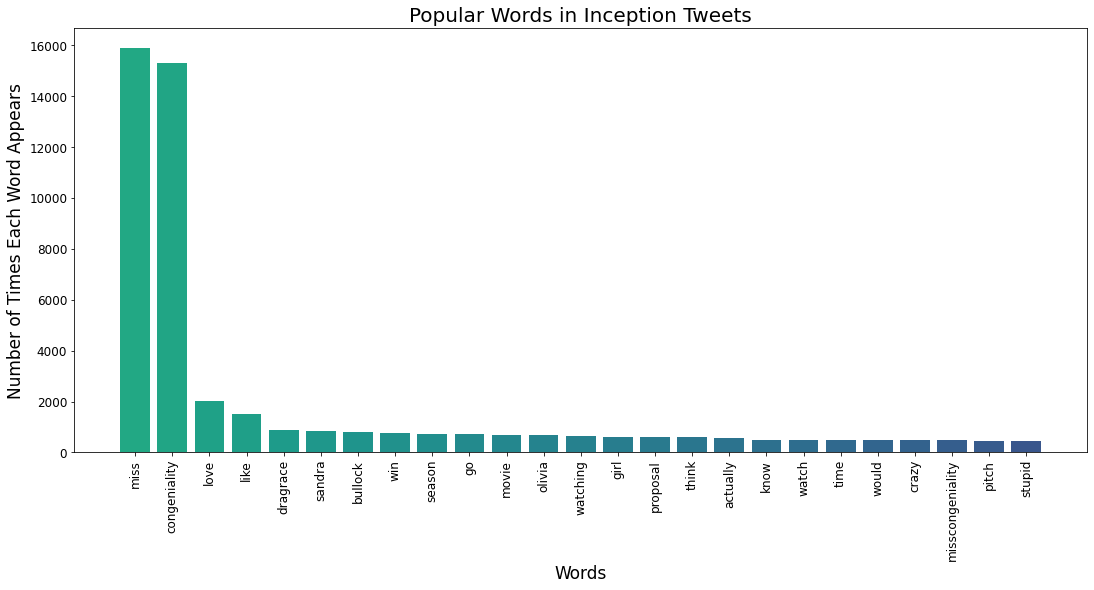

In [25]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

# matplotlib bar plot
ax.bar(inception_words, inception_counts, color=cm.viridis_r(np.linspace(.4,.8, 30)))
plt.xticks(rotation=90)
plt.xlabel('Words', fontsize = 17)
plt.ylabel('Number of Times Each Word Appears', fontsize = 17)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Popular Words in Inception Tweets', fontsize = 20)

plt.tight_layout(pad=0) #necessary - if not included extra text shows up